### Mfundo Monchwe
### 1645850
### Course code: COMS7056A
### Data Visualisation and Exploration
### MSc-Escience
### Faculty- Science


### Question 1

### 1.1 Describing and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import scipy.stats as stats
import matplotlib
import math
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### 1. Describe the dataset: number of entries, range/mean of the variables, number of unique regions, for example

In [2]:
data = pd.read_csv("C:/Users/didit/Downloads/DVE_Exam/datasets_2022/insurance.csv")

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges  premium
0   19  female  27.900         0    yes  southwest  16884.92400      350
1   18    male  33.770         1     no  southeast   1725.55230      200
2   28    male  33.000         3     no  southeast   4449.46200      100
3   33    male  22.705         0     no  northwest  21984.47061      200
4   32    male  28.880         0     no  northwest   3866.85520      350

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1353 non-null   int64  
 1   sex       1353 non-null   object 
 2   bmi       1353 non-null   float64
 3   children  1353 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1353 non-null   object 
 6   charges   1338 non-null   float64
 7   premium   1353 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 84.7+ KB


Given the above output, we discover that age and premium features are in terms of int64 data type
sex,smoker,region are object data type
lastly bmi and chargers are of float64 data type

In [5]:
data.nunique()

age           47
sex            2
bmi          563
children       6
smoker         2
region         4
charges     1337
premium        4
dtype: int64

the number of unique regions are 2

In [6]:
data.describe()

age          bmi     children       charges      premium
count  1353.000000  1353.000000  1353.000000   1338.000000  1353.000000
mean     39.157428    30.670080     1.118256  13270.422265   287.730968
std      14.021578     6.093331     1.229290  12110.011237   152.363854
min      18.000000    15.960000     0.000000   1121.873900   100.000000
25%      26.000000    26.290000     0.000000   4740.287150   100.000000
50%      39.000000    30.400000     1.000000   9382.033000   350.000000
75%      51.000000    34.700000     2.000000  16639.912515   500.000000
max      64.000000    53.130000     5.000000  63770.428010   500.000000

the median value for charges is 9382.03

In [7]:
data.describe(include=['object'])

sex smoker     region
count   1353   1338       1353
unique     2      2          4
top     male     no  southeast
freq     680   1064        369

In [8]:
data.shape

(1353, 8)

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'premium'],
      dtype='object')

#### 2 . Identify missing values and duplicates. Considering that charges is the target variable, decide if rows with this value missing should be imputed or dropped. Perform this cleaning on the dataset, and use this going forward

In [10]:
#data.isnull().sum()

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
premium     0
dtype: int64

In [12]:
duplicated = data.duplicated().sum()
if duplicated:
    print("number of duplicated rows in the dataset: {}".format(duplicated))
else:
    print("the dataset does not contain any duplicates rows")

the dataset does not contain any duplicates rows


In [13]:
data.dropna(inplace=True)
data

age     sex     bmi  children smoker     region      charges  premium
0      19  female  27.900         0    yes  southwest  16884.92400      350
1      18    male  33.770         1     no  southeast   1725.55230      200
2      28    male  33.000         3     no  southeast   4449.46200      100
3      33    male  22.705         0     no  northwest  21984.47061      200
4      32    male  28.880         0     no  northwest   3866.85520      350
...   ...     ...     ...       ...    ...        ...          ...      ...
1333   50    male  30.970         3     no  northwest  10600.54830      350
1334   18  female  31.920         0     no  northeast   2205.98080      500
1335   18  female  36.850         0     no  southeast   1629.83350      200
1336   21  female  25.800         0     no  southwest   2007.94500      100
1337   61  female  29.070         0    yes  northwest  29141.36030      100

[1338 rows x 8 columns]

#### 3 Convert variables to relevant datatypes: categorical/one-hot encoding, etc.


In [14]:
#data['smoker'] = data.smoker.replace({"yes":1, "no": 0})

In [15]:
#Age category
#data.loc[(data['age']>=18) & (data['age']<36), 'age_category']='youth'
#data.loc[(data['age']>=36) & (data['age']<=55), 'age_category']='Snr_youth'
#data.loc[data['age']>55, 'age_category']= 'adults'
#data['age_category'].value_counts()

In [16]:
#data.loc[data['children']>0, 'depedent'] = 'yes'
#data.loc[data['children']==0, 'dependent'] = 'no'
#data['dependent'].value_counts()

In [17]:
#setting the weight conditions
data.loc[data['bmi']<18.5, 'weight_condtion'] = 'underweight'
data.loc[(data['bmi']>=18.5) & (data['bmi']<25), 'weight_condition'] = 'normal'
data.loc[(data['bmi']>=25) & (data['bmi']<30), 'weight_condition'] = 'overweight'
data.loc[data['bmi']>30, 'weight_condition']='obese'
data['weight_condition'].value_counts()

obese         705
overweight    386
normal        225
Name: weight_condition, dtype: int64

In [18]:
cat_data = data.select_dtypes('object')
dummy_data = pd.get_dummies(cat_data, drop_first=False)

#select numerical features
num_data= data.select_dtypes(include=[np.number])
#encode the data
data_enc = pd.concat([dummy_data,num_data], axis=1)

In [19]:
data_enc

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0              1         0          0           1                 0   
1              0         1          1           0                 0   
2              0         1          1           0                 0   
3              0         1          1           0                 0   
4              0         1          1           0                 0   
...          ...       ...        ...         ...               ...   
1333           0         1          1           0                 0   
1334           1         0          1           0                 1   
1335           1         0          1           0                 0   
1336           1         0          1           0                 0   
1337           1         0          0           1                 0   

      region_northwest  region_southeast  region_southwest  \
0                    0                 0                 1   
1                    0                 1                 0   
2                    0                 1                 0   
3                    1                 0                 0   
4                    1                 0                 0   
...                ...               ...               ...   
1333                 1                 0                 0   
1334                 0                 0                 0   
1335                 0                 1                 0   
1336                 0                 0                 1   
1337                 1                 0                 0   

      weight_condtion_underweight  weight_condition_normal  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        1   
4                               0                        0   
...                           ...                      ...   
1333                            0                        0   
1334                            0                        0   
1335                            0                        0   
1336                            0                        0   
1337                            0                        0   

      weight_condition_obese  weight_condition_overweight  age     bmi  \
0                          0                            1   19  27.900   
1                          1                            0   18  33.770   
2                          1                            0   28  33.000   
3                          0                            0   33  22.705   
4                          0                            1   32  28.880   
...                      ...                          ...  ...     ...   
1333                       1                            0   50  30.970   
1334                       1                            0   18  31.920   
1335                       1                            0   18  36.850   
1336                       0                            1   21  25.800   
1337                       0                            1   61  29.070   

      children      charges  premium  
0            0  16884.92400      350  
1            1   1725.55230      200  
2            3   4449.46200      100  
3            0  21984.47061      200  
4            0   3866.85520      350  
...        ...          ...      ...  
1333         3  10600.54830      350  
1334         0   2205.98080      500  
1335         0   1629.83350      200  
1336         0   2007.94500      100  
1337         0  29141.36030      100  

[1338 rows x 17 columns]

### 1.2 Exploring the Data

#### 4 Plot the charges and comment on the distribution and any outliers you can identify

In [20]:
#data_enc.plot(kind='box', sharex ='charges', subplots=True, layout=(2,7),
 #        figsize=(15,10), color='deeppink');

<AxesSubplot:xlabel='charges'>

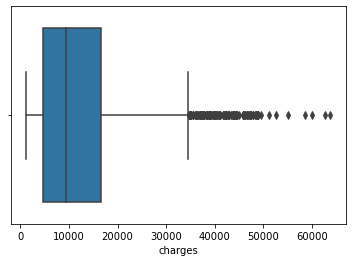

In [21]:
sns.boxplot(x='charges', data=data_enc)

There are alot of outliers towards the right from approximately 35000 to 650000

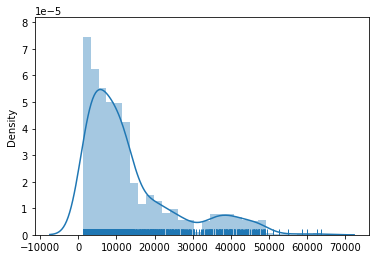

In [22]:
ax = sns.distplot(x=data_enc.charges, rug=True, hist= True)

As you can see the data is skewed to the left

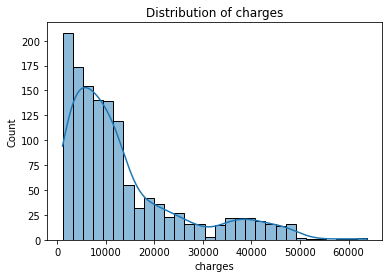

In [23]:
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of charges', fontsize=12)
plt.show()

given the above plots, we can see that most medical charges ranges betwen 1000 and 12 000, few medical charges cost more than 30k , and we can see say we have outliers

#### 5 Is there a correlation between charges and the other variables? Provide a correlation matrix to show this

<AxesSubplot:>

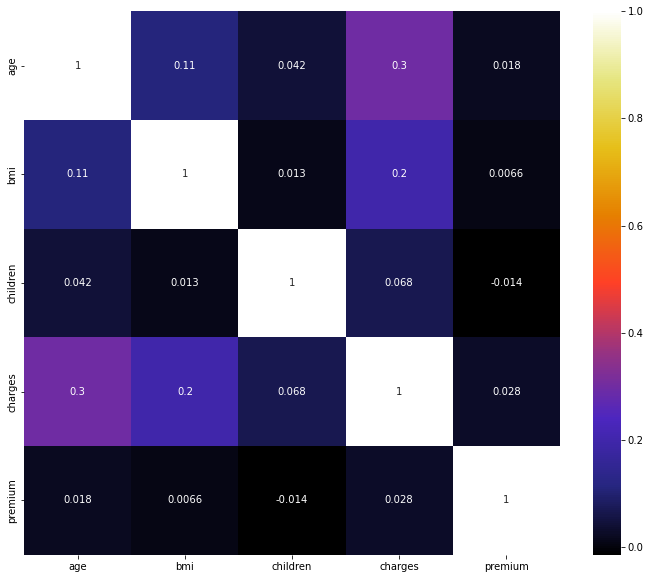

In [24]:
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot= True, cmap= 'CMRmap')

##### Observation
* from the correlation heatmap, conclusion can be that premium charges show a weeak positive correlation with age, bmi and strong towards smoking habit

In [25]:
data_corr_matrix = data_enc.corr()

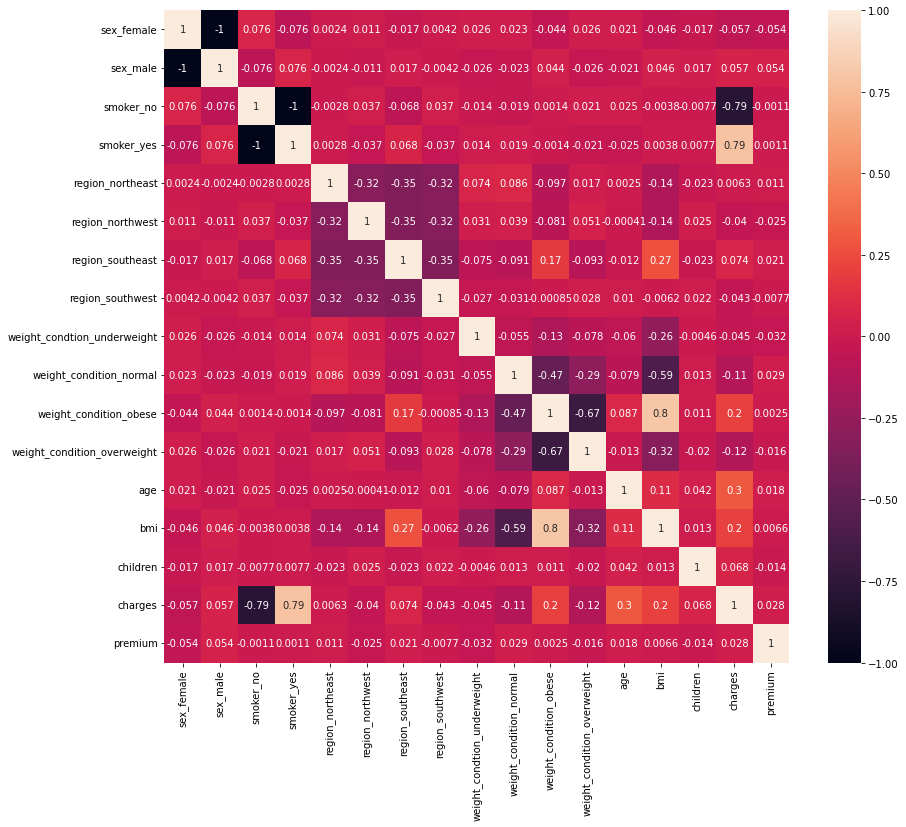

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr_matrix, annot=True)
plt.show()

theres correlation between charges and smokers which is the strongest, followed by bmi and age

####  6 Provide a graph showing the number of smokers and non-smokers. Then plot the charges by smoking status. There appear to be tails in the charges for non-smokers. What would explain this?

In [27]:
data['charges'].groupby(data['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [28]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

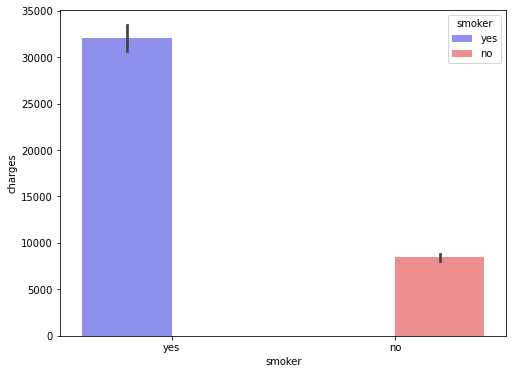

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(data.smoker, data.charges, hue= data.smoker, palette=['blue', 'red'], alpha = 0.5)
plt.show()

smokers have more charges compared to non smokers

Text(0.5, 1.0, 'no of smokers vs non smokers')

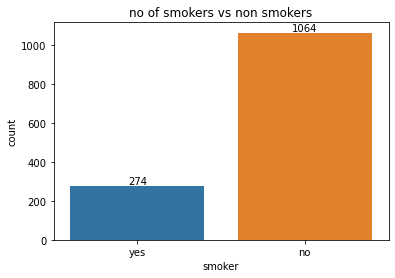

In [30]:
ax = sns.countplot(x='smoker', data = data)
ax.bar_label(ax.containers[0])
plt.title("no of smokers vs non smokers", fontsize=12)

there are 1064 non smokers and 274 smokers

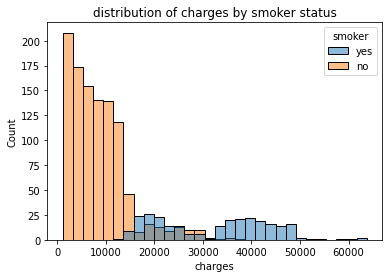

In [31]:
sns.histplot(data=data, x='charges', hue='smoker');
plt.title('distribution of charges by smoker status', fontsize=12)
plt.show()

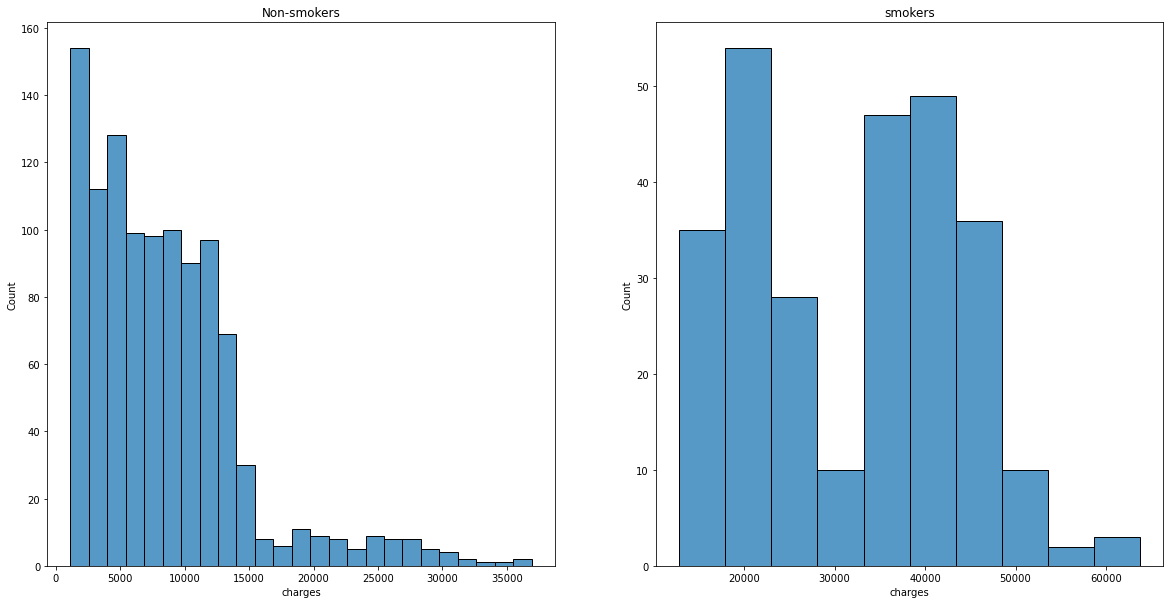

In [32]:
f,axes = plt.subplots(1,2, figsize=(20,10))
sns.histplot(data.loc[data['smoker']=='no', 'charges'], ax= axes[0]).set_title('Non-smokers', fontsize=12);
sns.histplot(data.loc[data['smoker']=='yes', 'charges'], ax= axes[1]).set_title('smokers', fontsize=12);
plt.show()

from the above we can conclude that, non smokers pay less compared to smokers

#### 7. How is the dataset divided by sex? Is there a difference in charges?

In [33]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [34]:
import plotly.express as px
fig = px.histogram(data,
                  x='charges', marginal='box', color='sex',
                  color_discrete_sequence= ['blue', 'red'],
                  title='difference in charges over sex')
fig.update_layout(bargap=0.1)
fig.show()

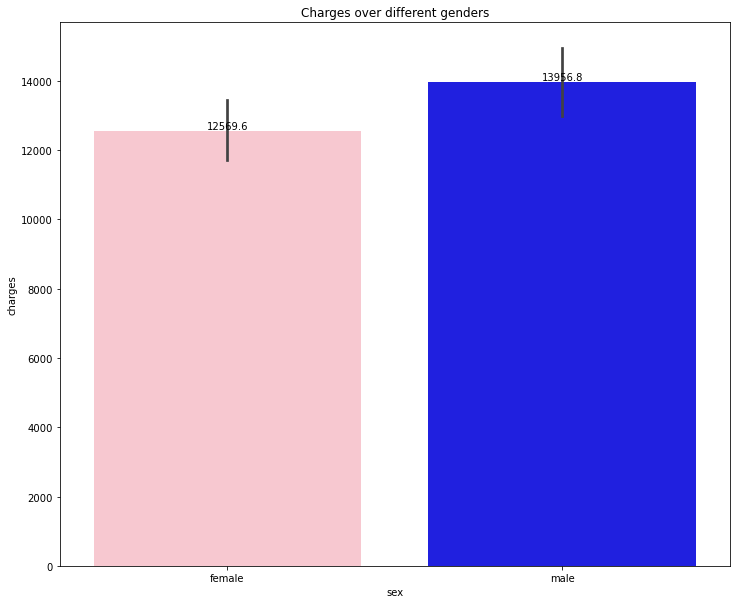

In [35]:
plt.figure(figsize=(12,10))
ax=sns.barplot(data.sex, data.charges, palette=['pink', 'blue'])
ax.bar_label(ax.containers[0])
plt.title('Charges over different genders')
plt.show()

given the above output, males are likely to pay more compared to females


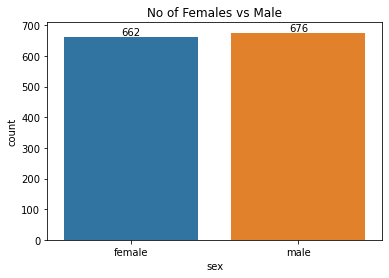

In [36]:
ax = sns.countplot(x='sex', data=data)
ax.bar_label(ax.containers[0])
plt.title('No of Females vs Male')
plt.show()

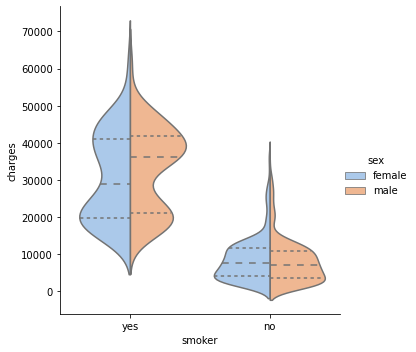

In [37]:
sns.catplot(x='smoker', y='charges', hue='sex',
           kind = 'violin', inner='quartiles', split=True,
           palette='pastel', data=data)

In [38]:
data.groupby(['smoker','sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

In [39]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges  premium  weight_condtion  \
smoker sex                                                                     
no     female  547  547       547     547      547      547                8   
       male    517  517       517     517      517      517                7   
yes    female  115  115       115     115      115      115                4   
       male    159  159       159     159      159      159                1   

               weight_condition  
smoker sex                       
no     female               539  
       male                 509  
yes    female               111  
       male                 157

Observation made is that out of the total 1338 insured, 274 (20.5%) are smokers, and the rest are non smokers
* among 274 smokers, proportion of males(159) are higher than of females(115)
* the average insurance premium for smokers are significantly higher than non-smokers

#### 8  Look at the relationship between children and charges and comment on the results.

<AxesSubplot:xlabel='children', ylabel='count'>

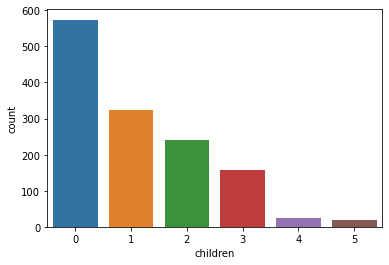

In [40]:
sns.countplot(x='children', data=data_enc)

In [41]:
fig = px.histogram(data,
                  x = 'charges', marginal = 'box', color = 'children',
                  color_discrete_sequence = ['yellow', 'green'],
                  title='different children over age')
fig.update_layout(bargap=0.2)
fig.show()

In [42]:
data.groupby(['children']).agg('count')['charges']

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

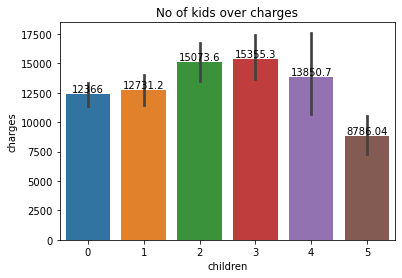

In [43]:
ax = sns.barplot(x='children', y='charges', data=data)
ax.bar_label(ax.containers[0])
plt.title('No of kids over charges', fontsize=12)
plt.show()

approximately 85% of the insured have less than 3 children
* children of 3 have more charges compared to 4 and 5
* those of children of 2 pay more

In [44]:
data_enc[['charges','children']].corr()

charges  children
charges   1.000000  0.067998
children  0.067998  1.000000

   the correlation value between `charges` and `children` is 0.068, this indication of weak positive relation

#### 9. Plot the relationship between children and age and comment on the results.


In [45]:
fig = px.histogram(data,
                  x = 'children', marginal = 'box', color = 'age',
                  color_discrete_sequence = ['yellow', 'green'],
                  title='different children over age')
fig.update_layout(bargap=0.2)
fig.show()

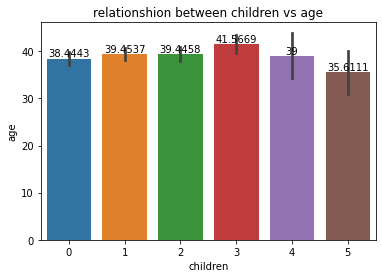

In [46]:
ax= sns.barplot(x='children', y='age', data=data)
ax.bar_label(ax.containers[0])
plt.title('relationshion between children vs age', fontsize=12)
plt.show()

In [47]:
data_enc[['children','age']].corr()

children       age
children  1.000000  0.042469
age       0.042469  1.000000

All the combinations of age and number of children are weakly correlated. the correlation  coefficient for age and children is 0.042

#### 10. Plot the age distribution. What do you find unusual about this distribution?

In [48]:
fig = px.histogram(data,
                  x = 'age', marginal = 'box', 
                  color_discrete_sequence = ['red'],
                  title='AGE difference')
fig.update_layout(bargap=0.2)
fig.show()

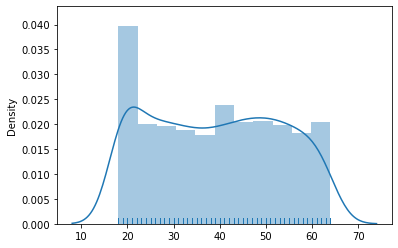

In [49]:
ax = sns.distplot(x=data.age, rug=True, hist= True)

its hard to tell, but from age 18-19 we have a total of 137 insured, the feature in non-uniform in distribution, the mean and median are far much apart

#### 11. How do insurance charges change by age? Apart from the expectation that older clients are less healthy and have larger claims, what other factors might influence this?

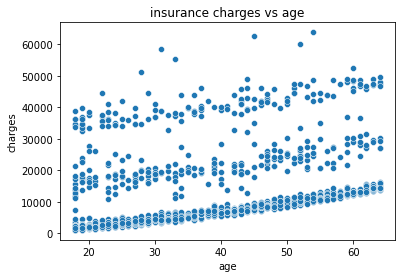

In [50]:
sns.scatterplot(data=data, x='age', y='charges')
plt.title('insurance charges vs age', fontsize=12)
plt.show()

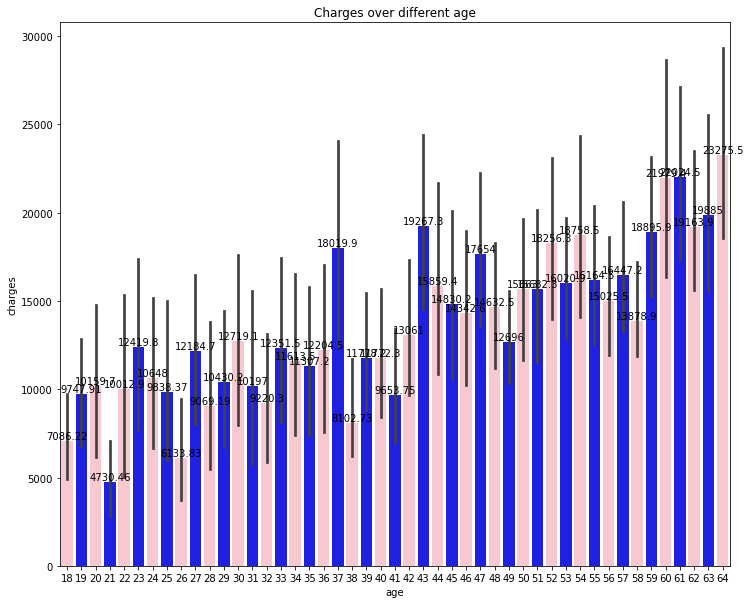

In [51]:
plt.figure(figsize=(12,10))
ax=sns.barplot(data.age, data.charges, palette=['pink', 'blue'])
ax.bar_label(ax.containers[0])
plt.title('Charges over different age')
plt.show()

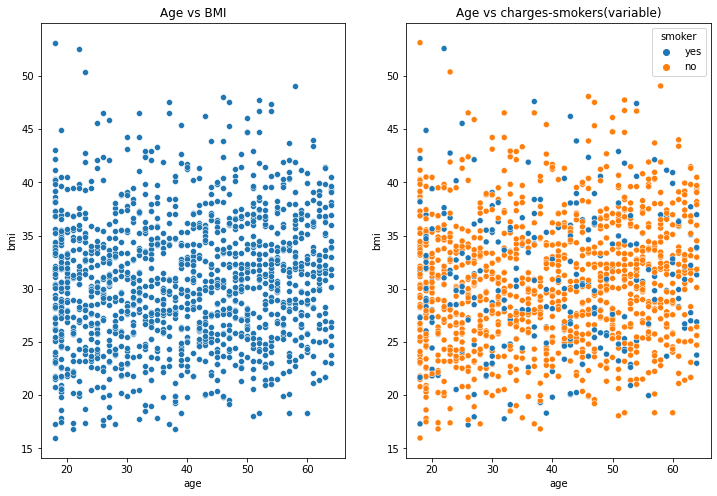

In [52]:
f, axes = plt.subplots(1,2, figsize=(12,8))
sns.scatterplot(data=data, x='age', y='bmi', ax=axes[0]).set_title('Age vs BMI', fontsize=12)
sns.scatterplot(data=data, x='age', y= 'bmi', hue='smoker', ax=axes[1]).set_title('Age vs charges-smokers(variable)', fontsize=12)
plt.show()

According to [insurancedekho](https://www.bing.com/ck/a?!&&p=d0cfb864187b5a733fd0ea5e7f205a4fb4e3be12b732a2abc3b90a92d942bc76JmltdHM9MTY1Njc3NzQzMSZpZ3VpZD01YjI5NDE0OS0yMTNmLTQxOTktYjY4Yi0zOGE3ZWFiMWE4NzQmaW5zaWQ9NTQwOQ&ptn=3&hsh=1&fclid=a1e582a7-fa1f-11ec-8116-9531fb8ce256&u=a1aHR0cHM6Ly93d3cuaW5zdXJhbmNlZGVraG8uY29tL2hlYWx0aC1pbnN1cmFuY2UvYXJ0aWNsZXMvaG93LWFnZS1hZmZlY3RzLXlvdXItaGVhbHRoLWluc3VyYW5jZS1wcmVtaXVtLWNvc3QtNDUyIzp-OnRleHQ9V2VsbCUyQyUyMGhlYWx0aCUyMGluc3VyYW5jZSUyMHByZW1pdW0lMjBpbmNyZWFzZXMlMjB3aXRoJTIwYWdlLiUyMFRoZSx0aGUlMjBjb3N0JTIwb2YlMjBoZWFsdGglMjBpbnN1cmFuY2UlMjBwcmVtaXVtJTIwaXMlMjBsb3cu&ntb=1) "Well, health insurance premium increases with age. The younger you are, the lower your premium will be. Likewise, the older you are, the higher your health insurance premium will be. Since at a young age, the chances of encountering health conditions and visiting the doctor is low, the cost of health insurance premium is low."

Other factors might influence change chargers over age
* region
* premium
* sex

#### 12. Is there relationship between smoking and age

In [53]:
fig = px.histogram(data,
                  x = 'age', marginal = 'box', color = 'smoker',
                  color_discrete_sequence = ['lightblue', 'red'],
                  title='different age over smoker')
fig.update_layout(bargap=0.2)
fig.show()

In [54]:
pearson_coef, p_value = stats.pearsonr(data_enc['smoker_yes'], data_enc['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0250187515362851  with a P-value of P = 0.36048529037855864


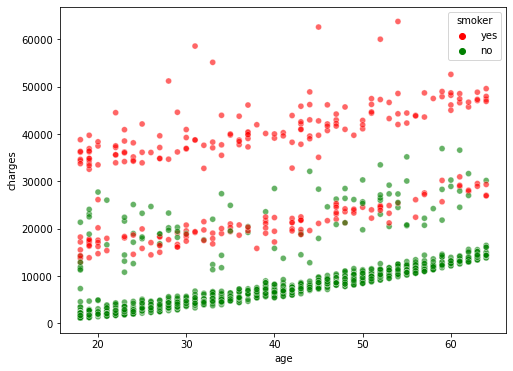

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges, hue=data.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

given Pearson correlation coefficient is negative value, tells us theres no correlation with a low p-value of 0.36
* there is weak negative relationship between `smoking` and `age` 

#### 13. Plot the BMI distribution. What can you deduce from this distribution? What is the difference in charges for clients that are deemed obese (and greater) vs non-obese (and lower)?

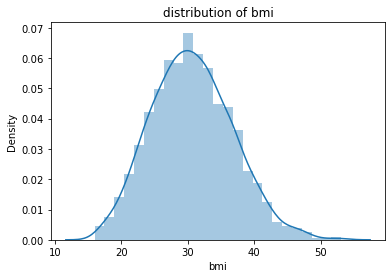

In [56]:
sns.distplot(data['bmi'])
plt.title('distribution of bmi',fontsize=12)
plt.show()

The plot is a uniform distribution of values in the ‘bmi’ feature. Thus, the feature is perfectly formatted with mean and median values close to each other.

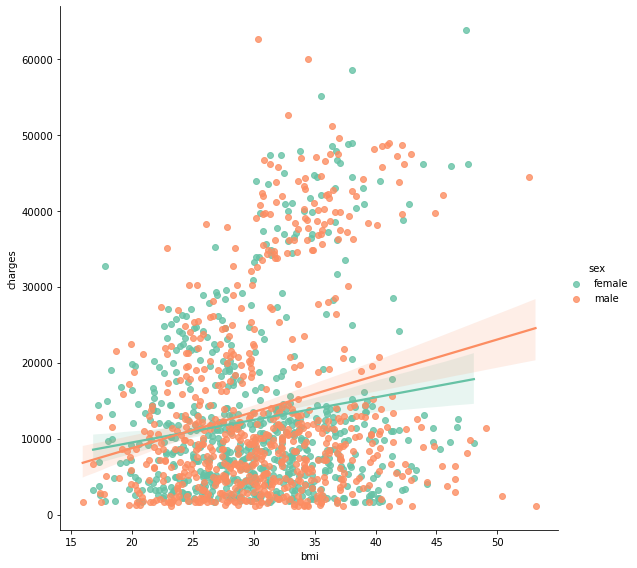

In [57]:
sns.lmplot(x="bmi", y="charges", data=data, height=(8), hue="sex", palette=sns.color_palette("Set2",10))

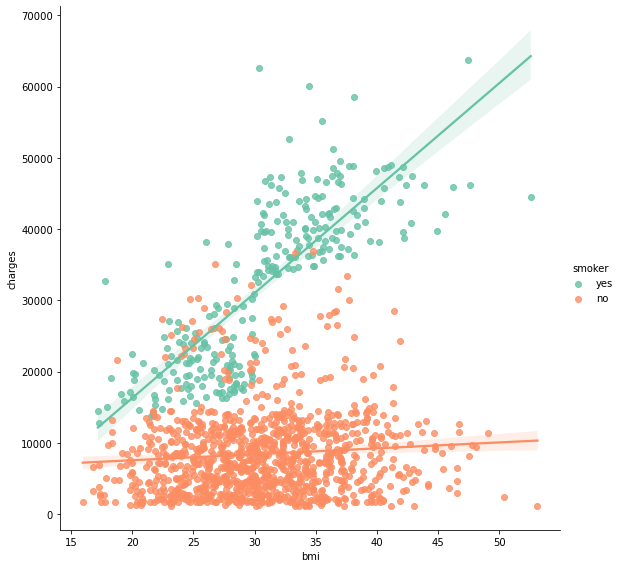

In [58]:
sns.lmplot(x="bmi", y="charges", data=data, height=(8), hue="smoker", palette=sns.color_palette("Set2",10))

In [59]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [60]:
data['bmi'].nunique()

548

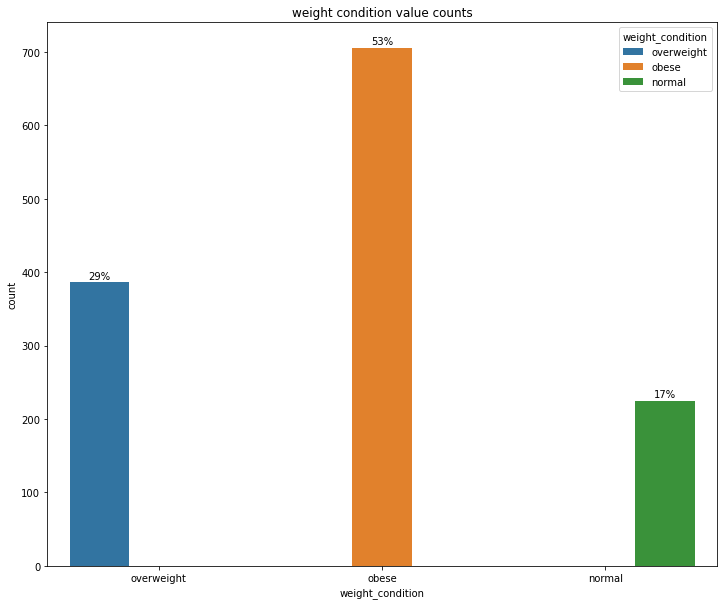

In [61]:
total = len(data)
plt.figure(figsize=(12,10))
plt.title('weight condition value counts')
ax=sns.countplot(x='weight_condition', hue='weight_condition',data=data)
for r in ax.patches:
    percentage = '{0:.0f}%'.format(r.get_height()/ total * 100)
    x = r.get_x() + r.get_width()/2
    y = r.get_height() + 5
    ax.annotate(percentage, (x,y), ha = 'center')
plt.show()

more than half of the population are considered obese

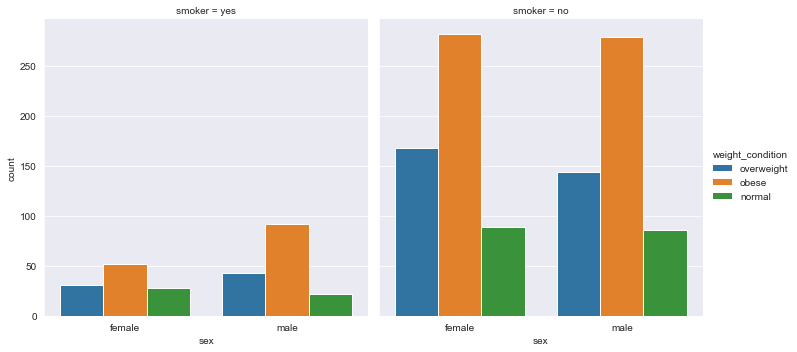

In [62]:
sns.set_style('darkgrid')
sns.catplot('sex', col='smoker', hue='weight_condition', data=data, kind='count')

In [63]:
data['weight_condition'].value_counts()

obese         705
overweight    386
normal        225
Name: weight_condition, dtype: int64

In [64]:
data.groupby(['weight_condition','charges']).mean()

age    bmi  children  premium
weight_condition charges                                    
normal           1121.87390   18.0  23.21       0.0    500.0
                 1241.56500   19.0  19.80       0.0    200.0
                 1242.26000   19.0  20.30       0.0    350.0
                 1242.81600   19.0  20.70       0.0    350.0
                 1515.34490   21.0  23.21       0.0    200.0
...                            ...    ...       ...      ...
overweight       32787.45859  42.0  28.31       3.0    350.0
                 35147.52848  24.0  28.50       0.0    100.0
                 35160.13457  55.0  26.80       1.0    500.0
                 37829.72420  43.0  27.80       0.0    200.0
                 38245.59327  42.0  26.07       1.0    350.0

[1315 rows x 4 columns]

In [65]:
data.groupby(['weight_condition','charges']).sum('count')

age    bmi  children  premium
weight_condition charges                                   
normal           1121.87390    18  23.21         0      500
                 1241.56500    19  19.80         0      200
                 1242.26000    19  20.30         0      350
                 1242.81600    19  20.70         0      350
                 1515.34490    21  23.21         0      200
...                           ...    ...       ...      ...
overweight       32787.45859   42  28.31         3      350
                 35147.52848   24  28.50         0      100
                 35160.13457   55  26.80         1      500
                 37829.72420   43  27.80         0      200
                 38245.59327   42  26.07         1      350

[1315 rows x 4 columns]

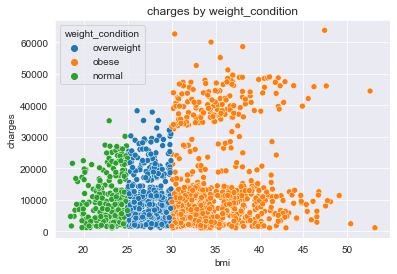

In [66]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='weight_condition')
plt.title('charges by weight_condition', fontsize=12)
plt.show()

#### 14. Is there a relationship between the region and age/charges/smoking? One region has higher charges than the others. Which region is this? What might impact this?

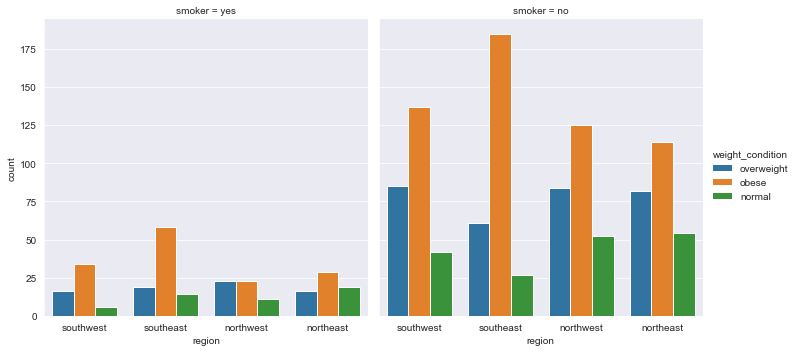

In [67]:
sns.set_style('darkgrid')
sns.catplot('region', col='smoker', hue='weight_condition', data=data, kind='count')

In [68]:
fig = px.histogram(data,
                  x = 'charges', marginal = 'box', color = 'region',
                  color_discrete_sequence = ['lightblue', 'red','yellow','green'],
                  title='different charges over regions')
fig.update_layout(bargap=0.2)
fig.show()

Given the above plot, southeast part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only

In [69]:
px.histogram(data, x='sex', y='charges', color='region')

the inference from every region our customer base which has males incurring more bills but females of northwest region are having more medical bills

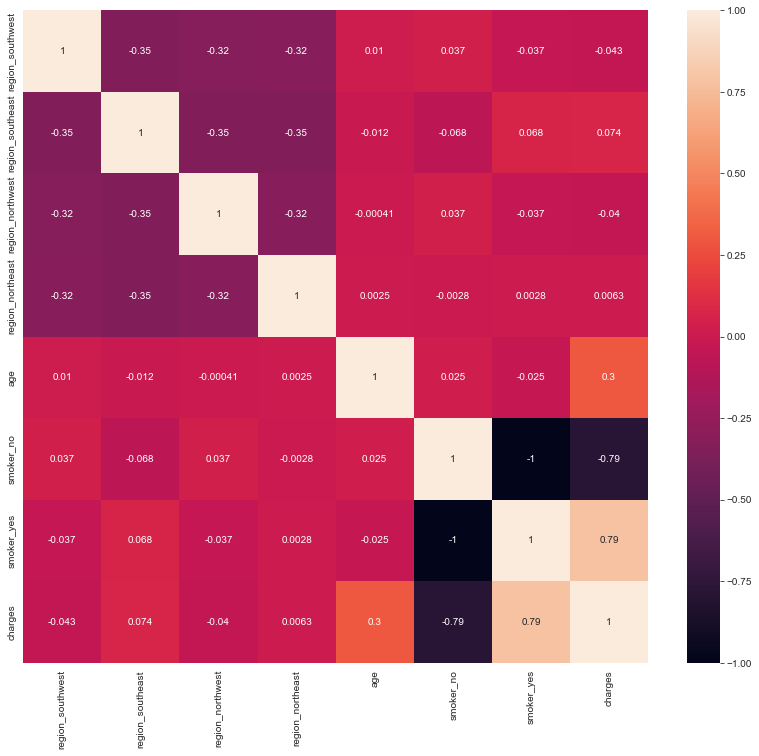

In [70]:
plt.figure(figsize=(14,12))
sns.heatmap(data_enc[['region_southwest','region_southeast',
                     'region_northwest','region_northeast',
                     'age', 'smoker_no','smoker_yes', 'charges']].corr(), annot=True)
plt.show()

In [71]:
pearson_coef, p_value = stats.pearsonr(data_enc['smoker_yes'], data_enc['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7872514304984773  with a P-value of P = 8.27143584217778e-283


In [72]:
pearson_coef, p_value = stats.pearsonr(data_enc['smoker_no'], data_enc['region_southwest'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.03694547401760742  with a P-value of P = 0.17681886419641932


In [73]:
pearson_coef, p_value = stats.pearsonr(data_enc['smoker_yes'], data_enc['region_northeast'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.002811134820450945  with a P-value of P = 0.9181759101730038


In [74]:
pearson_coef, p_value = stats.pearsonr(data_enc['region_southeast'], data_enc['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.07398155156575978  with a P-value of P = 0.006782698910660704


In [75]:
pearson_coef, p_value = stats.pearsonr(data_enc['region_southeast'], data_enc['age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.01164194061722916  with a P-value of P = 0.6704990026067668


In [76]:
pearson_coef, p_value = stats.pearsonr(data_enc['age'], data_enc['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29900819333064765  with a P-value of P = 4.8866933317203816e-29


##### which region is this?
* `South East`, among all the regions, `southeast` has strongest relationship with charges, with Pearson correlation coefficient 0.074
##### what might impact this?
* `age` and `smoking` is the most correlated with `charges`, unfortunately, `age` and `smoking` correlated to `southeast`

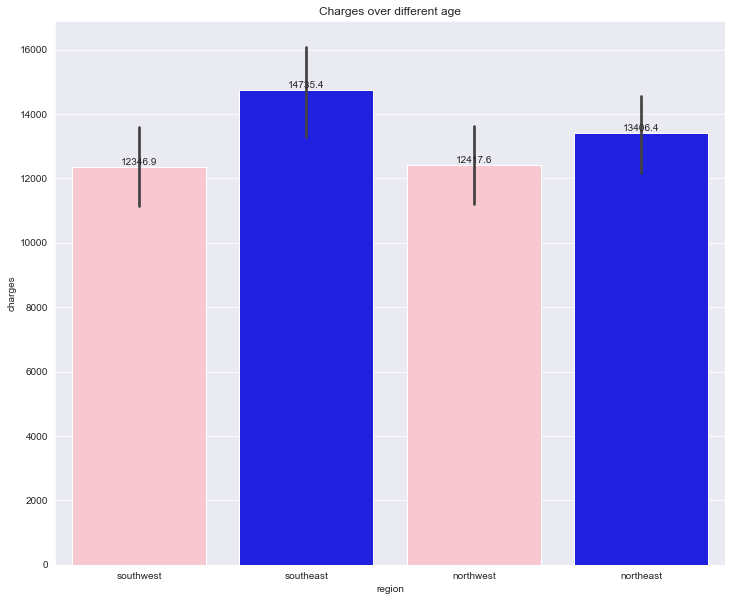

In [77]:
plt.figure(figsize=(12,10))
ax=sns.barplot(data['region'], data['charges'], palette=['pink', 'blue'])
ax.bar_label(ax.containers[0])
plt.title('Charges over different age')
plt.show()

given the above plot `Southeast` region has the highest average medical charge

### 1.3 Identifying the high risks

#### 15. The correlation matrix should indicate that smoker is strongly correlated with charges. Referring to the plots from earlier showing the charges for smokers, there should be a clear separation in higher and lower charges. What is causing this? What variable(s), when combined with smoker=True indicates a much higher claim amount? Provide plots to motivate your answer

In [78]:
data_smoker= data[data['smoker']=='yes']

#Encode
cat_smoker = data_smoker.select_dtypes('object')
cat_smoker = cat_smoker.loc[:, cat_smoker.columns != 'weight_condition']
dummy_smoker = pd.get_dummies(cat_smoker,drop_first=False)
#numeric features
num_smoker = data_smoker.select_dtypes(include=[np.number])

#encoded
smoker_enc = pd.concat([dummy_smoker, num_smoker], axis=1)

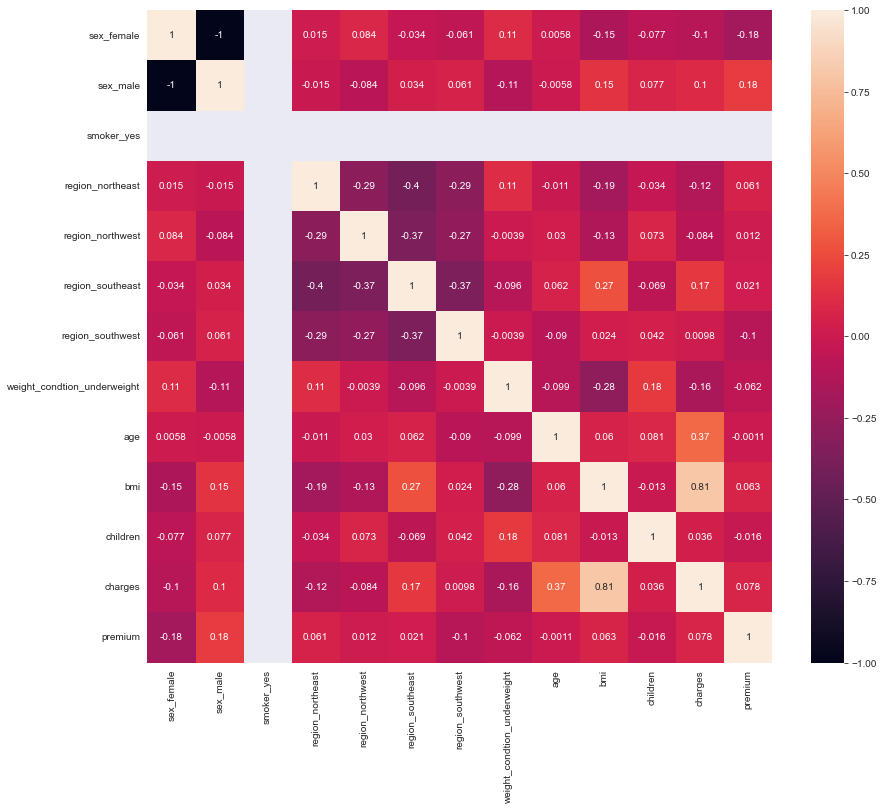

In [79]:
plt.figure(figsize=(14,12))
sns.heatmap(smoker_enc.corr(), annot= True)
plt.show()

In [80]:
smoker_enc.corr()

sex_female  sex_male  smoker_yes  \
sex_female                     1.000000 -1.000000         NaN   
sex_male                      -1.000000  1.000000         NaN   
smoker_yes                          NaN       NaN         NaN   
region_northeast               0.015134 -0.015134         NaN   
region_northwest               0.084307 -0.084307         NaN   
region_southeast              -0.034441  0.034441         NaN   
region_southwest              -0.060521  0.060521         NaN   
weight_condtion_underweight    0.105058 -0.105058         NaN   
age                            0.005758 -0.005758         NaN   
bmi                           -0.148350  0.148350         NaN   
children                      -0.076907  0.076907         NaN   
charges                       -0.101226  0.101226         NaN   
premium                       -0.180217  0.180217         NaN   

                             region_northeast  region_northwest  \
sex_female                           0.015134          0.084307   
sex_male                            -0.015134         -0.084307   
smoker_yes                                NaN               NaN   
region_northeast                     1.000000         -0.294808   
region_northwest                    -0.294808          1.000000   
region_southeast                    -0.401187         -0.365412   
region_southwest                    -0.294808         -0.268519   
weight_condtion_underweight          0.112757         -0.003898   
age                                 -0.011290          0.030313   
bmi                                 -0.193326         -0.128827   
children                            -0.033675          0.073008   
charges                             -0.117370         -0.083583   
premium                              0.060714          0.012495   

                             region_southeast  region_southwest  \
sex_female                          -0.034441         -0.060521   
sex_male                             0.034441          0.060521   
smoker_yes                                NaN               NaN   
region_northeast                    -0.401187         -0.294808   
region_northwest                    -0.365412         -0.268519   
region_southeast                     1.000000         -0.365412   
region_southwest                    -0.365412          1.000000   
weight_condtion_underweight         -0.096140         -0.003898   
age                                  0.061987         -0.089901   
bmi                                  0.267021          0.024379   
children                            -0.069078          0.042066   
charges                              0.171069          0.009843   
premium                              0.021382         -0.101027   

                             weight_condtion_underweight       age       bmi  \
sex_female                                      0.105058  0.005758 -0.148350   
sex_male                                       -0.105058 -0.005758  0.148350   
smoker_yes                                           NaN       NaN       NaN   
region_northeast                                0.112757 -0.011290 -0.193326   
region_northwest                               -0.003898  0.030313 -0.128827   
region_southeast                               -0.096140  0.061987  0.267021   
region_southwest                               -0.003898 -0.089901  0.024379   
weight_condtion_underweight                     1.000000 -0.099223 -0.281171   
age                                            -0.099223  1.000000  0.059674   
bmi                                            -0.281171  0.059674  1.000000   
children                                        0.175515  0.081183 -0.012619   
charges                                        -0.156690  0.368224  0.806481   
premium                                        -0.061793 -0.001100  0.063274   

                             children   charges   premium  
sex_female                  -0.076907 -0.101226 -0.180217  

In [81]:
pearson_coef, p_value = stats.pearsonr(smoker_enc['bmi'], smoker_enc['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8064806070155406  with a P-value of P = 5.019668631794899e-64


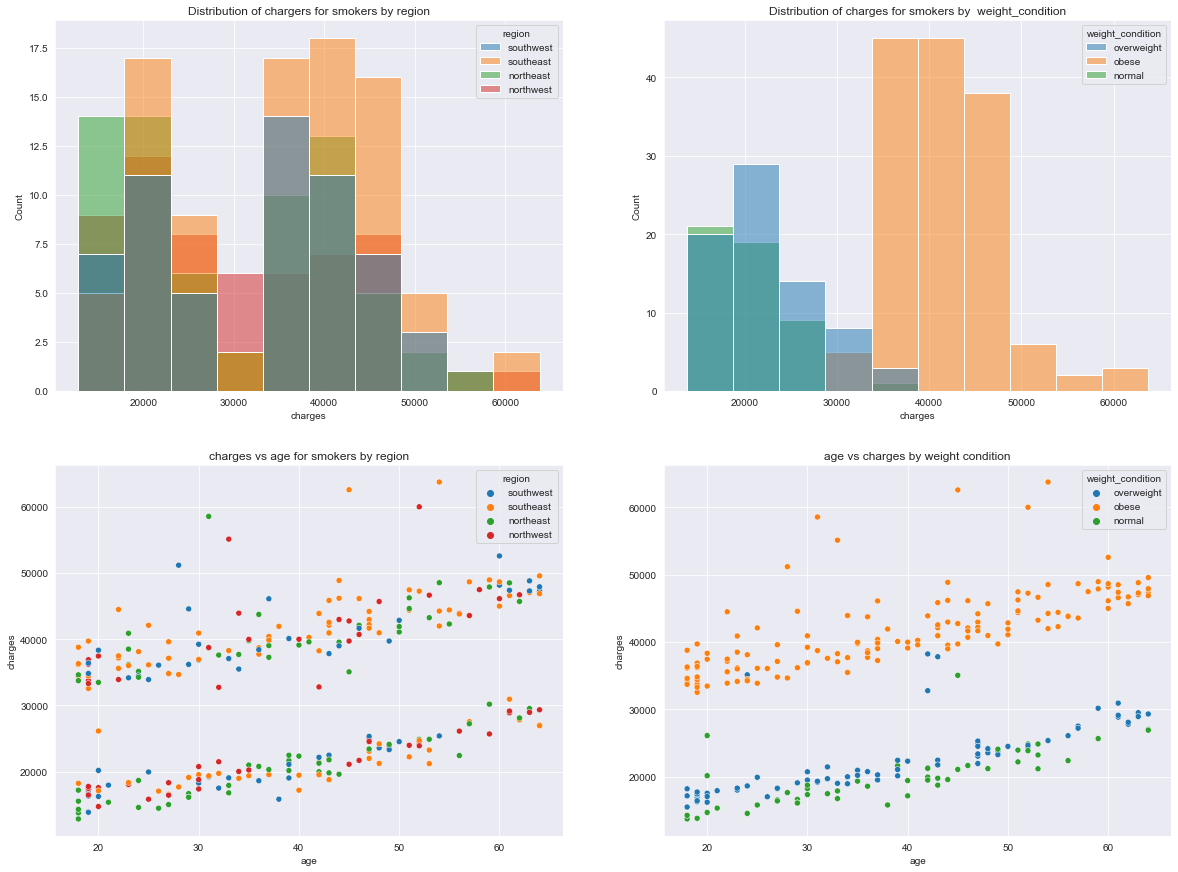

In [82]:
f, axes = plt.subplots(2,2, figsize=(20,15))
sns.histplot(data=data_smoker,
            x= data_smoker['charges'], hue='region',
            ax=axes[0,0]).set_title('Distribution of chargers for smokers by region',fontsize=12);
sns.histplot(data= data_smoker,
            x = data_smoker['charges'], hue='weight_condition',
             ax=axes[0,1]).set_title('Distribution of charges for smokers by  weight_condition',fontsize=12)
sns.scatterplot(data= data_smoker, x='age',
               y='charges', hue='region', ax=axes[1,0]).set_title('charges vs age for smokers by region', fontsize=12)   
sns.scatterplot(data=data_smoker,
               x='age', y='charges', hue='weight_condition', ax=axes[1,1]).set_title('age vs charges by weight condition',fontsize=12)
            
            
plt.show()

In [83]:
data_smoker.groupby(['weight_condition','region'])['charges'].mean().reset_index(name='average_charge').sort_values('average_charge',
                                                                                                                   ascending=False)

weight_condition     region  average_charge
5             obese  northwest    42425.281095
6             obese  southeast    42256.051773
4             obese  northeast    41275.186048
7             obese  southwest    40592.695041
8        overweight  northeast    23355.678233
9        overweight  northwest    22667.486339
10       overweight  southeast    22292.695598
11       overweight  southwest    21630.652138
2            normal  southeast    21177.320841
1            normal  northwest    20115.304300
0            normal  northeast    19745.474630
3            normal  southwest    17366.054172

from the given output, we can conclude that `northwest` region shows an indication for higher average charges for clients(obese and greater)

### Question 2

### 2.1 Exploration

#### 1. Describe the dataset: number of entries, range/mean of the variables.

In [84]:
#loading activity labels
activity = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/activity_labels.txt', sep=' ', header=None,
                        names=('ID','Activity'))

In [85]:
activity

ID            Activity
0   1             WALKING
1   2    WALKING_UPSTAIRS
2   3  WALKING_DOWNSTAIRS
3   4             SITTING
4   5            STANDING
5   6              LAYING

In [86]:
#loading the features
feat = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/features.txt', sep=' ', header=None,
                    names=('ID','Sensors'))
feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       561 non-null    int64 
 1   Sensors  561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [87]:
feat.shape

(561, 2)

In [88]:
feat.head()

ID            Sensors
0   1  tBodyAcc-mean()-X
1   2  tBodyAcc-mean()-Y
2   3  tBodyAcc-mean()-Z
3   4   tBodyAcc-std()-X
4   5   tBodyAcc-std()-Y

In [89]:
xtrain_df = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
#add volunteer column to the dataframe
subtrain = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/train/subject_train.txt', header=None, names=['SubjectID'])
ytrain_df = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/train/y_train.txt', sep=' ', header=None, names=['ActivityID'])
Har_train_sensor = feat['Sensors']
xtrain_df.columns = Har_train_sensor
dat_har = pd.concat([xtrain_df,subtrain], axis=1)
for x in activity['ID']:
    act = activity[activity['ID']== x] ['Activity']
    ytrain_df = ytrain_df.replace({x: act.iloc[0]})
ytrain_df.columns =['Activity']
dat_har = pd.concat([dat_har,ytrain_df], axis=1)
print('X-train shape', xtrain_df.shape)
print('ysubtrain shape',subtrain.shape,'ytrain shape', ytrain_df.shape)

X-train shape (7352, 561)
ysubtrain shape (7352, 1) ytrain shape (7352, 1)


In [90]:
dat_har.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
0             -0.841247              0.179941             -0.058627   
1             -0.844788              0.180289             -0.054317   
2             -0.848933              0.180637             -0.049118   
3             -0.848649              0.181935             -0.047663   
4             -0.847865              0.185151             -0.043892   

   SubjectID  Activity  
0          1  STANDING  
1          1  STANDING  
2          1  STANDING  
3          1  STANDING  
4          1  STANDING  

[5 rows x 563 columns]

In [91]:
dat_har.shape

(7352, 563)

In [92]:
# check duplicates
duplicated = dat_har.duplicated().sum()
if duplicated:
    print("number of duplicated rows in the dataset: {}".format(duplicated))
else:
    print("the dataset does not contain any duplicates rows")

the dataset does not contain any duplicates rows


In [93]:
dat_har.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.008943   
75%                       0.150865                              0.292861   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       7352.000000                           7352.000000   
mean                           0.008726                             -0.005981   
std                            0.608303                              0.477975   
min                           -1.000000                             -1.000000   
25%                           -0.482273                             -0.376341   
50%                            0.008735                             -0.000368   
75%                            0.506187                              0.359368   
max                            0.998702                     

#### 2. How many of each class? How many for each user? Provide basic visualisations for this

In [94]:
print('number of unique classes:',dat_har['Activity'].nunique())
print('unique classes:', dat_har['Activity'].unique())

number of unique classes: 6
unique classes: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


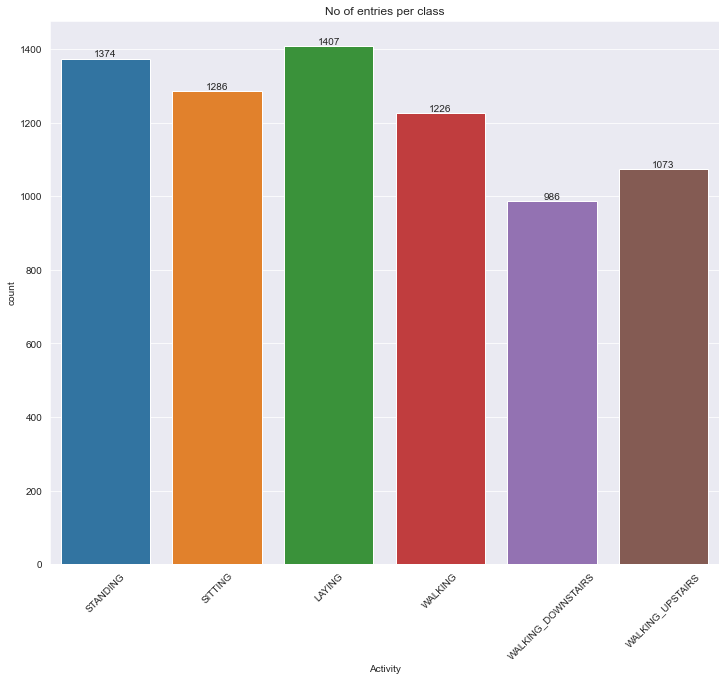

In [95]:
plt.figure(figsize=(12,10))
ax=sns.countplot(dat_har['Activity'], data=dat_har)
ax.bar_label(ax.containers[0])
plt.title('No of entries per class', fontsize=12)
plt.xticks(rotation=45);
plt.show()

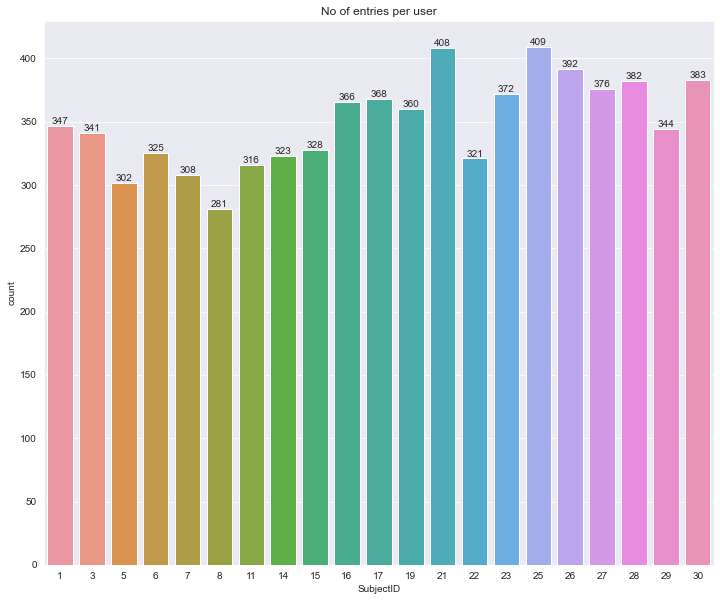

In [96]:
plt.figure(figsize=(12,10))
ax = sns.countplot(dat_har['SubjectID'], data=dat_har)
ax.bar_label(ax.containers[0])
plt.title('No of entries per user', fontsize=12)
plt.xticks(rotation=0);
plt.show()

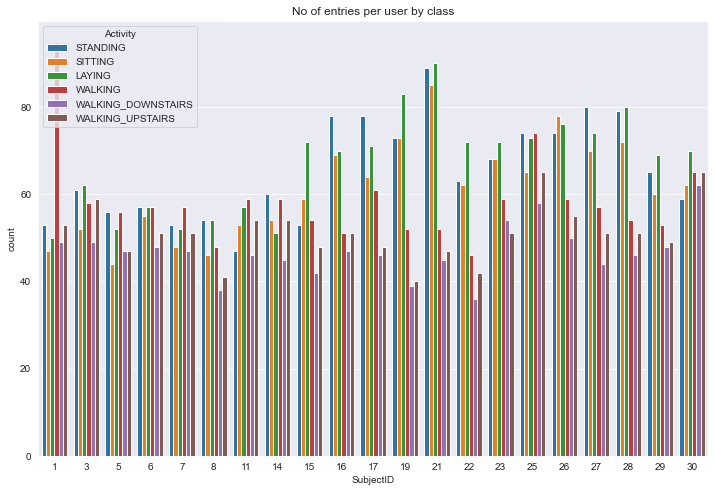

In [97]:
plt.figure(figsize=(12,8))
plt.title('No of entries per user by class', fontsize=12)
sns.countplot(x='SubjectID', hue='Activity', data= dat_har )
plt.show()


number of entries per user by class are almost balanced for all users excluding  Id 1, 19 and 20

C:\Users\didit\AppData\Local\Temp\ipykernel_28160\452251847.py:9: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\didit\AppData\Local\Temp\ipykernel_28160\452251847.py:9: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



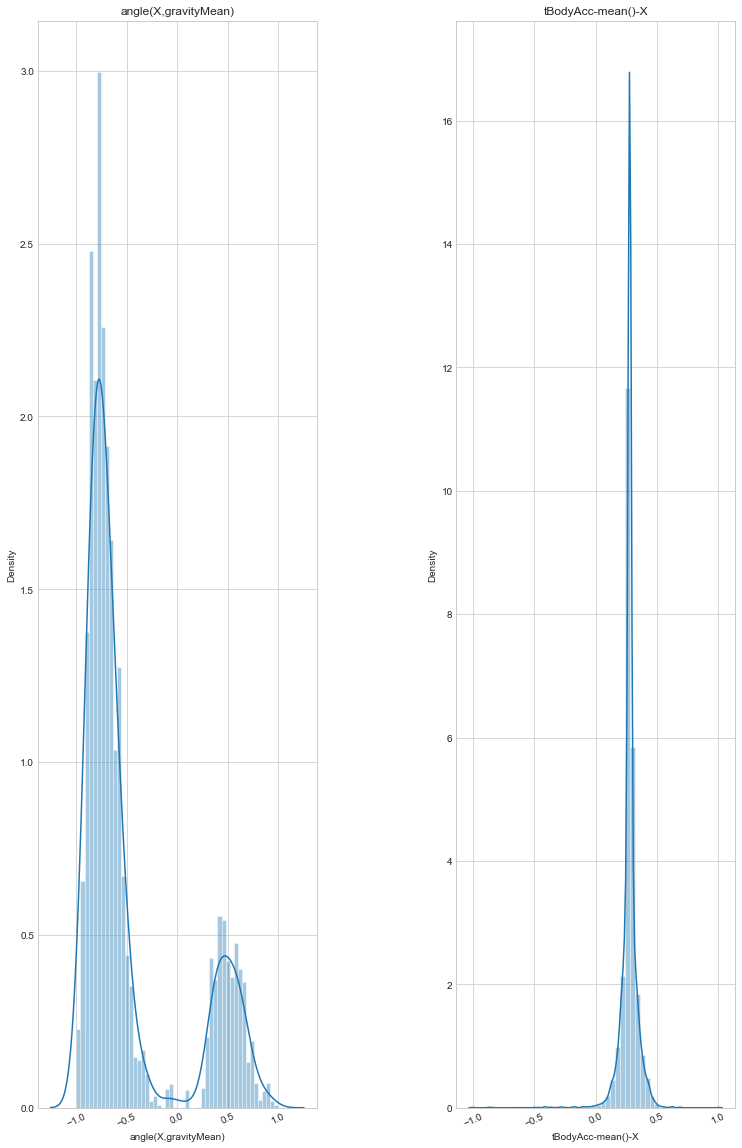

In [98]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

cols_to_plot = ['angle(X,gravityMean)','tBodyAcc-mean()-X']
plot_distribution(dat_har[cols_to_plot], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

#### 3. Identify and plot at least two features that show a clear static/dynamic separation. Your plots must convey this information clearly

In [99]:
dat_har.columns[:25]

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z'],
      dtype='object')

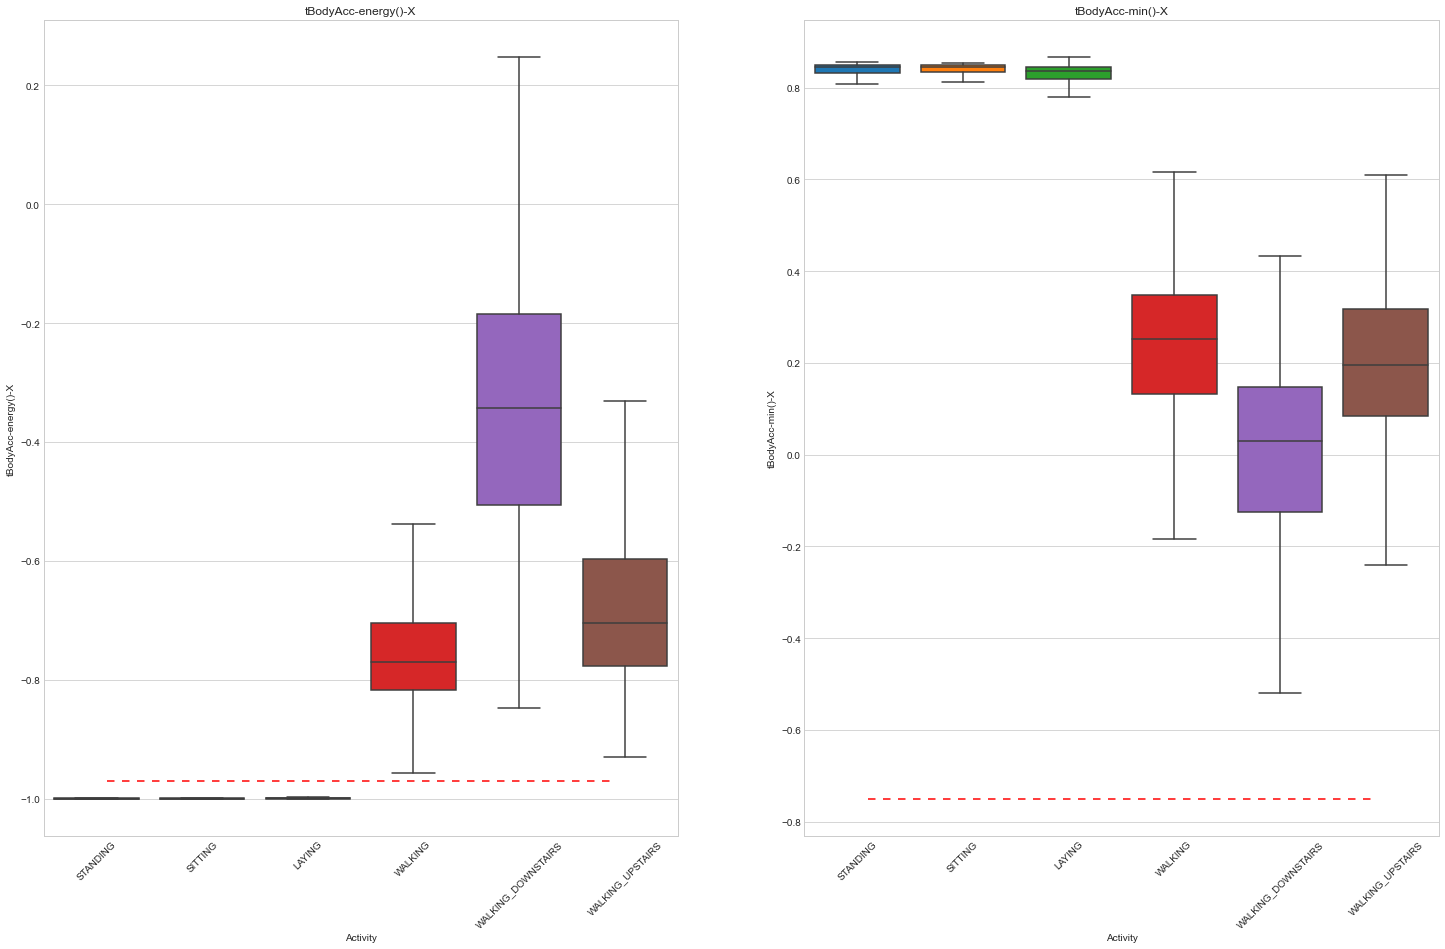

In [100]:
f, axes = plt.subplots(1,2, figsize=(25,15))
sns.boxplot(x='Activity', y='tBodyAcc-energy()-X', data= dat_har, showfliers=False,
           saturation=2, ax=axes[0]).set_title('tBodyAcc-energy()-X', fontsize=12);
axes[0].axhline(y=-0.97, xmin=0.1, xmax=0.9, dashes=(5,5), c='red')
axes[0].tick_params(axis='x', rotation=45)
sns.boxplot(x='Activity', y='tBodyAcc-min()-X', data= dat_har, showfliers= False,
           saturation =1, ax=axes[1]).set_title('tBodyAcc-min()-X', fontsize=12);
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=-0.75, xmin=0.1, xmax=0.9, dashes=(5,5), c='red')
plt.show()

* `tBodyAcc-energy()-X` shows dynamic activities that normally ranges from `-0.9 to 0.1`, that can be inferred that dynamic movements are within range
* `tBodyAcc-energy()-X` indicates static activities ranges approx between  `0.98 to -1`, inferred static movement are within range
* `tBodyAcc-min()-X` indicate dynamic activities ranging from `-0.7 to 0.62` inferred dynamic movement within range
* `tBodyAcc-min()-X` indicate static activity ranging from `0.7 to 1` inferred static movement within range

Text(0.5, 1.0, 'tBodyAcc-energy()-X-STANDING')

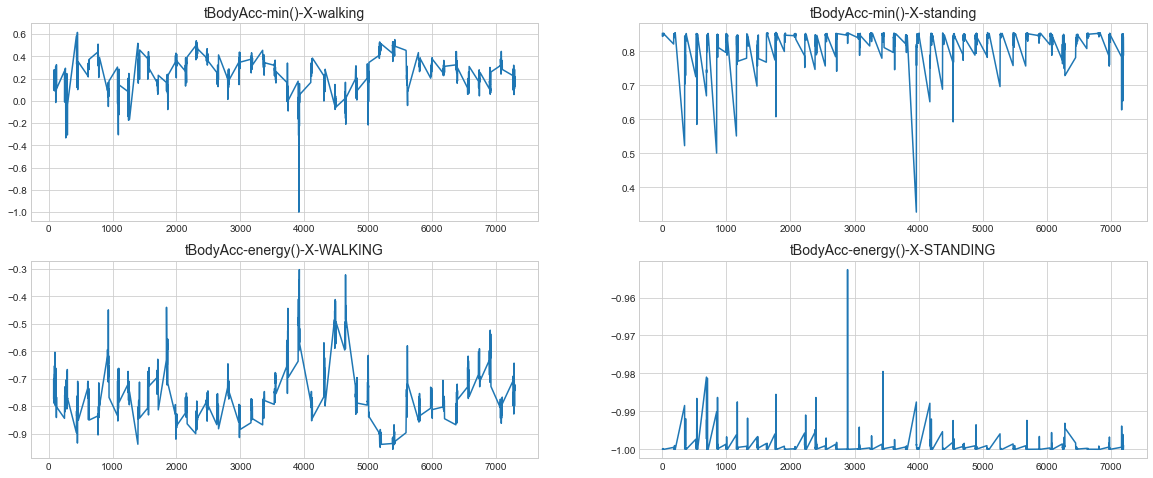

In [101]:
f,axes=plt.subplots(2,2, figsize=(20,8))
axes[0,0].plot(dat_har.loc[dat_har['Activity']=='WALKING', 'tBodyAcc-min()-X']);
axes[0,0].set_title('tBodyAcc-min()-X-walking', fontsize=14)
axes[0,1].plot(dat_har.loc[dat_har['Activity']=='STANDING', 'tBodyAcc-min()-X']);
axes[0,1].set_title('tBodyAcc-min()-X-standing', fontsize=14)
axes[1,0].plot(dat_har.loc[dat_har['Activity']=='WALKING', 'tBodyAcc-energy()-X']);
axes[1,0].set_title('tBodyAcc-energy()-X-WALKING', fontsize=14)
axes[1,1].plot(dat_har.loc[dat_har['Activity']=='STANDING', 'tBodyAcc-energy()-X']);
axes[1,1].set_title('tBodyAcc-energy()-X-STANDING', fontsize=14)

* given the above ouput, `tBodyAcc-energy()-X` shows walking normally within range of `[-0.9,-0.7]`, given the assumption that dynamic movements within range
* `tBodyAcc-energy()-X` indicate standing normally within range of `[-1,-0.98]`, given the assumption that static movemetns within range

#### 4. Identify a simple rule (if/else, basically) on this feature that can be used to separate dynamic from static movements.

if tbodyAcc-min()-x>=-1 || tbodyAcc-min()-x<= 0.62:

    '== dynamic movement'
    
else:

     '==static movement'
     
   
  return 0

#### 5. Using this rule only, what would the accuracy be if trying to predict static vs dynamic movement on the test dataset?

##### loading test dataset

In [102]:
xtest_df = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
#add volunteer column to the dataframe
sub_test = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/test/subject_test.txt', header=None, names=['SubjectID'])
ytest_df = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/test/y_test.txt', sep=' ', header=None, names=['ActivityID'])
Har_test_sensor = feat['Sensors']
xtest_df.columns = Har_test_sensor
test_har = pd.concat([xtest_df,sub_test], axis=1)
for x in activity['ID']:
    act = activity[activity['ID']== x] ['Activity']
    ytest_df = ytest_df.replace({x: act.iloc[0]})
ytest_df.columns =['Activity']
test_har = pd.concat([test_har,ytest_df], axis=1)

In [103]:
test_har.shape

(2947, 563)

In [104]:
#create a function to divide the motions to compare with simple classificatio
def motion_(m):
    if m == 'WALKING' or m == 'WALKING_DOWNSTAIRS' or m == 'WALKING_UPSTAIRS':
        return 'dynamic'
    else:
        return 'static'

#create a function for if/else rule

def motion_class(m):
    if m>=-1 and m<=0.62:
        return 'dynamic'
    else:
        return 'static'
    
    

In [105]:
#label
test_har['motion_type'] = test_har['Activity'].apply(motion_)

In [106]:
#predict motion type
test_har['motion_class'] = test_har['tBodyAcc-min()-X'].apply(motion_class)

In [107]:
#Accuracy
print('simple rule accuracy based on test data:', accuracy_score(test_har['motion_type'], test_har['motion_class']))

simple rule accuracy based on test data: 0.99321343739396


An accuract of `99.3%` was achieved on the test data

#### 6. Identify and plot a feature that exploits this, showing class separation.

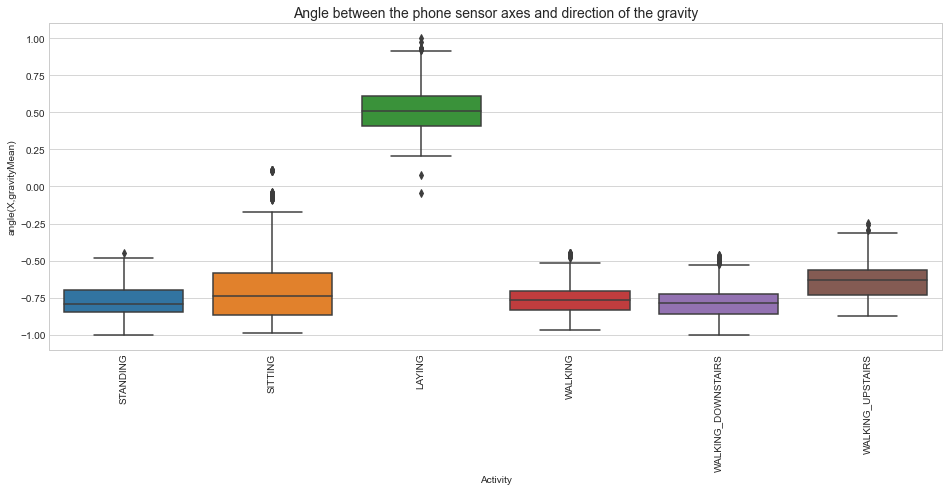

In [108]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=dat_har)
plt.title('Angle between the phone sensor axes and direction of the gravity', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### 7. Give a simple rule that effectively separates LAYING from all other classes.

if angle(X,gravityMean) >0 || angle(X,gravityMean) <=1:

    return `laying`
    
else:

    return 0


#### 8. Using this rule only, what would the accuracy be if trying to identify LAYING on the test dataset

In [109]:
#create a function to separate laying and other activities
def laying(l):
    if l == 'LAYING':
        return 'laying'
    else:
        return 'not_laying'
    
def lay_class(l):
    if l>0 and l<=1:
        return 'laying'
    else:
        return 'not_laying'

In [110]:
test_har['laying'] = test_har['Activity'].apply(laying)

In [111]:
test_har['lay_class'] = test_har['angle(X,gravityMean)'].apply(lay_class)

   #### Predicting LAYING based on `angle(X,gravityMean)` test set

In [112]:
print('simple rule accuracy on test set:', accuracy_score(test_har['laying'], test_har['lay_class']))

simple rule accuracy on test set: 1.0


   an Accuracy score of `100%` achieved in predicting LAYING  on test dataset

#### 9. Perform PCA on this dataset. What is the explained variance when performing PCA with the following number of components: 2, 5, 10

In [113]:
#first you want to filter out some features
dat_harX = dat_har.loc[:, ~dat_har.columns.isin(['SubjectID','Activity'])]

#create a column
harX_columns = dat_harX.columns

#normalize
dat_harX = StandardScaler().fit_transform(dat_harX)

In [114]:
dat_harX.shape

(7352, 561)

In [115]:
#create function for PCA
def pcratio(pca_model):
    plt.bar(range(1,len(pca_model.explained_variance_ratio_)+1),pca_model.explained_variance_ratio_)
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Components')
    plt.plot(range(1,len(pca_model.explained_variance_ratio_)+1),
            np.cumsum(pca_model.explained_variance_ratio_),
            c='green',
            label ='Cumulative explained variance ratio')
    plt.legend(loc='upper left')
    plt.show()

No of components 2
total σ captured by principle components: 57.36185255809914%
explained σ variation per principal component: [0.50781172 0.0658068 ] 



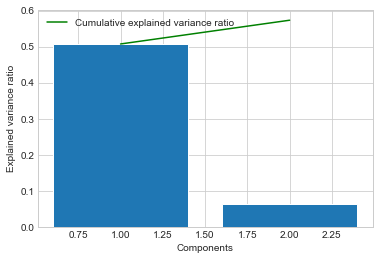

No of components 5
total σ captured by principle components: 64.56052704623683%
explained σ variation per principal component: [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285] 



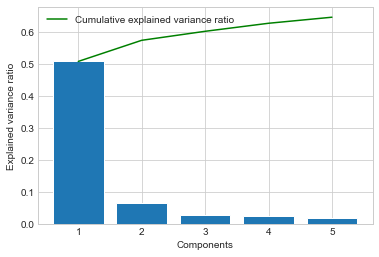

No of components 10
total σ captured by principle components: 70.81549328711412%
explained σ variation per principal component: [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371009 0.01199071 0.00995811 0.00965069] 



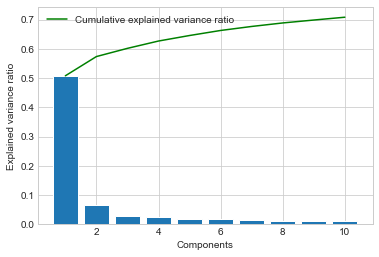

In [116]:
for x in [2,5,10]:
    pcamodel = PCA(n_components=x)
    pca = pcamodel.fit_transform(dat_harX)
    print('No of components', x)
    print('total σ captured by principle components: {0}%'.format(pcamodel.explained_variance_ratio_.sum()*100.))
    print('explained σ variation per principal component: {0} \n'.format(pcamodel.explained_variance_ratio_))
    pcratio(pcamodel)

* large variance is locked when the number of components increases
* given the above plot we can see that 10 components captured most variance, where `70.82%` of the variance is captured, and `29.18%` is lost information.
* for 5 components, `64.56%` variance is captured, and  `35.44%` lost data
* for 2 components,  `57.36%` variance is gathere, and `42.64%` lost data

#### 10. Which variables contribute the most to the first two principal components? What do you notice about the types of variables?

In [117]:
for i in [2,5,10]:
    pcamodel = PCA(n_components=i)
    pca = pcamodel.fit_transform(dat_harX)
    n_pc = pcamodel.components_.shape[0]
    most_vital = [np.abs(pcamodel.components_[j]).argmax() for j in range(n_pc)]
    most_vital_names = [harX_columns[most_vital[j]] for j in range(n_pc)]
    
    dic = {'PC{}'.format(j): most_vital_names[j] for j in range(n_pc)}
    print('No of components', i)
    print('Most contributed variables for first two Principal components:', {r:dic[r] for r in list(dic)[:2]}, '\n')

No of components 2
Most contributed variables for first two Principal components: {'PC0': 'fBodyAcc-sma()', 'PC1': 'fBodyAcc-meanFreq()-Z'} 

No of components 5
Most contributed variables for first two Principal components: {'PC0': 'fBodyAcc-sma()', 'PC1': 'fBodyAcc-meanFreq()-Z'} 

No of components 10
Most contributed variables for first two Principal components: {'PC0': 'fBodyAcc-sma()', 'PC1': 'fBodyAcc-meanFreq()-Z'} 



 * both variables fall under `Body Acceleration`. given that acceleration is change in speed, in different directions.
 * both variables `sma` and `meanFreq()` indicates signal magnitude area and weighted average of frequency components to obtain mean frequency.
 * `BodyAcc-sma()` and `fBodyAcc-meanFreq()-Z` are the variables that contribute most to the first two pc

#### 11. Now, perform the above PCA separately on static and dynamic movements. Does the number of components explain as much of the variance for each? Which variables contribute the most to the first two principal components?

In [118]:
dat_har['motion_type'] = dat_har['Activity'].apply(motion_)
#s&d df for PCA
dat_harS = dat_har[dat_har['motion_type']=='static']
dat_harD = dat_har[dat_har['motion_type']=='dynamic']

##### PCA for static motion

In [119]:
harS = dat_harS.loc[:, ~dat_harS.columns.isin(['SubjectID','Activity','motion_type'])]
#create cvariable for later use
harS_col = dat_harS.columns
#normalizing
harS = StandardScaler().fit_transform(harS)
harS.shape

(4067, 561)

No of components 2
Total σ captured by principle components: 45.15758345405455%
explained variation per principal component: [0.38192761 0.06964822]
No of components 2
Most contributed variables for first two Principal components: {'PC0': 'fBodyGyro-sma()', 'PC1': 'tBodyAccMag-arCoeff()1'} 



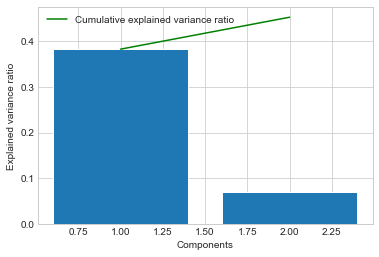

No of components 5
Total σ captured by principle components: 57.34998720755993%
explained variation per principal component: [0.38192761 0.06964822 0.05658216 0.03462    0.03072188]
No of components 5
Most contributed variables for first two Principal components: {'PC0': 'fBodyGyro-sma()', 'PC1': 'tBodyAccMag-arCoeff()1'} 



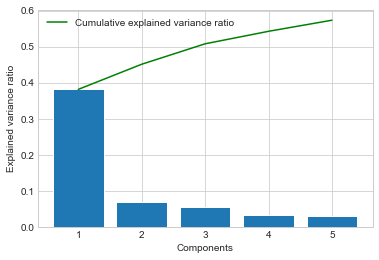

No of components 10
Total σ captured by principle components: 66.10527960957421%
explained variation per principal component: [0.38192761 0.06964822 0.05658216 0.03462    0.03072188 0.02396646
 0.01902063 0.01651085 0.01548788 0.01256709]
No of components 10
Most contributed variables for first two Principal components: {'PC0': 'fBodyGyro-sma()', 'PC1': 'tBodyAccMag-arCoeff()1'} 



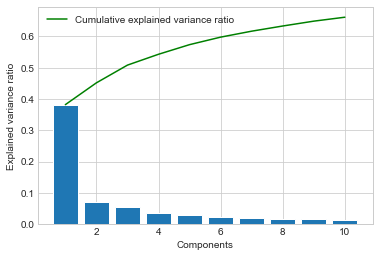

In [120]:
for i in [2,5,10]:
    pcamodel = PCA(n_components=i)
    pca = pcamodel.fit_transform(harS)
    print('No of components', i)
    print('Total σ captured by principle components: {0}%'.format(pcamodel.explained_variance_ratio_.sum()*100.))
    print('explained variation per principal component: {0}'.format(pcamodel.explained_variance_ratio_))
    n_pc = pcamodel.components_.shape[0]
    most_vital = [np.abs(pcamodel.components_[j]).argmax() for j in range(n_pc)]
    most_vital_names = [harX_columns[most_vital[j]] for j in range(n_pc)]
    
    dic = {'PC{}'.format(j): most_vital_names[j] for j in range(n_pc)}
    print('No of components', i)
    print('Most contributed variables for first two Principal components:', {r:dic[r] for r in list(dic)[:2]}, '\n')
    pcratio(pcamodel)

* for 2 components: `45.16%`  variance captured, while `54.85%` information lost
* for 5 components:  `57.35%`  variance captured, while `42.65%` data lost
* for 10 components:  `66.10%` variance captured, while `33.9%` data lost
* `fBodyGyro-sma()` and `tBodyAccMag-arCoeff()1` are the most variables contributing to the first two components 

#### PCA for dynamic motion

In [121]:
harD = dat_harD.loc[:, ~dat_harD.columns.isin(['SubjectID','Activity','motion_type'])]
#create for later usage
harD_cols = dat_harD.columns
#normalize
harD = StandardScaler().fit_transform(harD)
harD.shape

(3285, 561)

No of components 2
Total σ captured by principle components: 38.29250225887445%
explained variation per principal component: [0.30451822 0.0784068 ]
No of components 2
Most contributed variables for first two Principal components: {'PC0': 'fBodyAccJerk-sma()', 'PC1': 'fBodyAcc-bandsEnergy()-1,8'} 



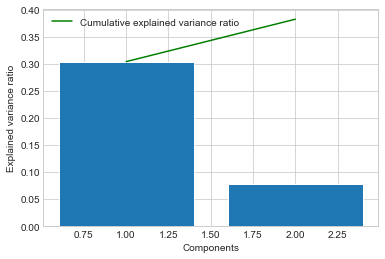

No of components 5
Total σ captured by principle components: 52.01165012760109%
explained variation per principal component: [0.30451822 0.0784068  0.0651551  0.03863028 0.0334061 ]
No of components 5
Most contributed variables for first two Principal components: {'PC0': 'fBodyAccJerk-sma()', 'PC1': 'fBodyAcc-bandsEnergy()-1,8'} 



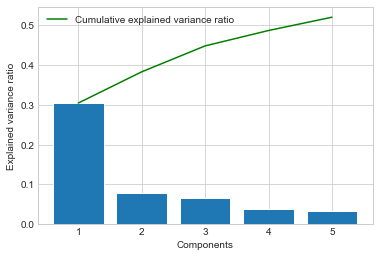

No of components 10
Total σ captured by principle components: 60.94242196700477%
explained variation per principal component: [0.30451822 0.0784068  0.0651551  0.03863028 0.0334061  0.02185603
 0.01937376 0.01824917 0.01603146 0.01379729]
No of components 10
Most contributed variables for first two Principal components: {'PC0': 'fBodyAccJerk-sma()', 'PC1': 'fBodyAcc-bandsEnergy()-1,8'} 



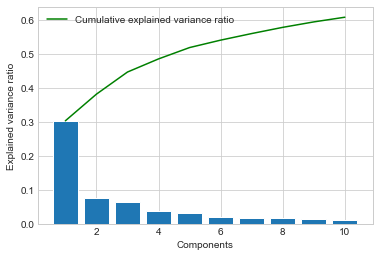

In [122]:
for i in [2,5,10]:
    pcamodel = PCA(n_components=i)
    pca = pcamodel.fit_transform(harD)
    print('No of components', i)
    print('Total σ captured by principle components: {0}%'.format(pcamodel.explained_variance_ratio_.sum()*100.))
    print('explained variation per principal component: {0}'.format(pcamodel.explained_variance_ratio_))
    n_pc = pcamodel.components_.shape[0]
    most_vital = [np.abs(pcamodel.components_[j]).argmax() for j in range(n_pc)]
    most_vital_names = [harX_columns[most_vital[j]] for j in range(n_pc)]
    
    dic = {'PC{}'.format(j): most_vital_names[j] for j in range(n_pc)}
    print('No of components', i)
    print('Most contributed variables for first two Principal components:', {r:dic[r] for r in list(dic)[:2]}, '\n')
    pcratio(pcamodel)

* for 2 components: `38.29%`  variance captured, while `66.71%` information lost
* for 5 components:  `52.01%`  variance captured, while `47.99%` data lost
* for 10 components:  `60.94%` variance captured, while `39.6%` data lost
* `fBodyAccJerk-sma()` and `fBodyAcc-bandsEnergy()-1` are the most variables contributing to the first two components 

### 2.2 Baseline models

#### 1. Use the three baseline models with all 561 features to predict the activity type. Record the F1 score and the time taken to train the model.

In [123]:
#train set
y_train = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/train/y_train.txt', sep=' ', header=None, names=['ActivityID'])
y_train['ActivityID'].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [124]:
y_train['ActivityID'] = y_train['ActivityID']-1
y_train['ActivityID'].unique()

array([4, 3, 5, 0, 2, 1], dtype=int64)

In [125]:
trainX = dat_har.loc[:, ~dat_har.columns.isin(['SubjectID','Activity','motion_type'])]
trainX_cols = trainX.columns
#trainX = StandardScaler().fit_transform(trainX)
trainX.shape

(7352, 561)

In [126]:
#test set
ytest = pd.read_table('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/UCI HAR Dataset/test/y_test.txt', sep=' ', header=None, names=['ActivityID'])
ytest['ActivityID']= ytest['ActivityID']-1

In [127]:
testY = test_har.loc[:, ~test_har.columns.isin(['SubjectID','Activity',
                                              'motion_type','motion_class','laying','lay_class'])]
testY_cols = testY.columns
#testY = StandardScaler().fit_transform(testY)
testY.shape

(2947, 561)

#### Random forest

In [128]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [129]:
rfc_model = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_model.fit(trainX, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_model_pred = rfc_model.predict(testY)
print('f1 score:', f1_score(rfc_model_pred,ytest['ActivityID'], average='micro'))

training time: 42.90950274467468s
f1 score: 0.9219545300305395


#### Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_model.fit(trainX, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_model_pred = lr_model.predict(testY)
print('f1_score', f1_score(lr_model_pred, ytest['ActivityID'], average='micro'))

training time: 2.524336099624634s
f1_score 0.9606379368849678


C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* `Logistic regression` model is the best performing model with f1 score of ` 0.9606379368849678`  and took lesser time to train `1.6802246570587158s`
* `Random forest Classifier` took `42.36856412887573s` to train and reach f1score of  ` 0.9219545300305395`

#### 2. Use the two baseline models with all 561 features to predict if the activity is static or dynamic. Record the F1 score and the time taken to train the model. How does this compare with your simple decision rule identified earlier?

In [131]:
#1-hot encode
Ytrain_motion = pd.get_dummies(dat_har['motion_type'], drop_first=True)
Ytest_motion = pd.get_dummies(test_har['motion_type'], drop_first=True)

In [132]:
Ytrain_motion['static'].unique()

array([1, 0], dtype=uint8)

In [133]:
Ytest_motion['static'].unique()

array([1, 0], dtype=uint8)

In [134]:
trainX.shape

(7352, 561)

In [135]:
y_train.shape

(7352, 1)

In [136]:
testY.shape

(2947, 561)

#### Random Forest Classifier

In [137]:
rfc_model1 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_model1.fit(trainX, Ytrain_motion['static'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_model1_pred = rfc_model1.predict(testY)
print('f1 score:', f1_score(rfc_model1_pred,Ytest_motion['static'], average='micro'))
print('comparsion wih simple rule acc:', accuracy_score(rfc_model1_pred, Ytest_motion['static']))

training time: 10.669781923294067s
f1 score: 1.0
comparsion wih simple rule acc: 1.0


#### Logistic Regression

In [138]:
lr_model1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_model1.fit(trainX, Ytrain_motion['static'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_model1_pred = lr_model1.predict(testY)
print('f1_score', f1_score(lr_model1_pred, Ytest_motion['static'], average='micro'))
print('comparison with simple rule -Acc:', accuracy_score(lr_model1_pred, Ytest_motion['static']))

training time: 0.7527234554290771s
f1_score 1.0
comparison with simple rule -Acc: 1.0


* `Random forest Classifier` took `10.854385375976562s` to train and achieved f1_score of `100%` which is too good, even with simple rule accuracy `100%`
* `Logistic Regression` took `0.4283888339996338s` to train and achieved f1_score of `100%` which is too good, even with simple rule accuracy `100%`
* we can conlude that both baseline models have high accuracies with simple decision rule accuracies, `same`
* Observation : `LR` and `RFC` took way lesser time compared to before, `deduction of classes`
* Since the acc performance is too good, from the HAR dataset, we can conclude it has large number of features, which can lead to model complexity, which leads to overfitting.
* Sol'n may be to apply lasso regression, perform EDA again, cross-validation, feature selection and more

### 2.3  Feature Selection
The dataset has 561 features, which likely have some correlations, and not all will be
useful (maybe even harmful). Having a large number of features is going to affect the
training time of the model too.

#### 1. Perform mutual information feature selection (mutual info selection in sklearn) to select the top 5, 10, 50, 100 features for identifying activity type. Using the baseline models, investigate how the reduction in features affects the training time and the F1 score (you need to run each model for all feature sets). Comment on your results

In [139]:
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.feature_selection import SelectFromModel, SelectKBest

In [140]:
trainX.shape, y_train['ActivityID'].unique(), testY.shape

((7352, 561), array([4, 3, 5, 0, 2, 1], dtype=int64), (2947, 561))

In [141]:
def select_feat(X_train, Y_train, X_test, num_feat):
    fs = SelectKBest(score_func=mutual_info_classif, k=num_feat)
    fs.fit(X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs,fs

#### top 5 features

Feature tGravityAccMag-max(): 0.904677
Feature tGravityAcc-max()-Y: 0.928346
Feature tBodyAccJerk-max()-X: 0.937872
Feature tGravityAcc-min()-Y: 0.944219
Feature tBodyAcc-max()-X: 1.006915


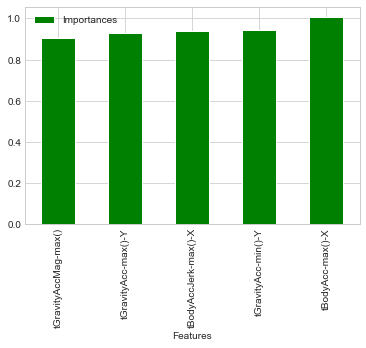

In [142]:
_,_,fs = select_feat(trainX, y_train['ActivityID'],testY,5)
top5_feat = pd.DataFrame({'Features': pd.DataFrame(trainX).columns,
                         'Importances': fs.scores_, 'Included': fs.get_support()})
top5_feat.set_index('Importances')
top5_feat = top5_feat[top5_feat.Included== True].sort_values('Importances')
top5_feat.plot.bar(color='green', x='Features')
top5_features = top5_feat['Features']
for _,row in top5_feat.iterrows():
    print('Feature %s: %f' %(row['Features'], row['Importances']))

#### top 10 features

Feature fBodyAcc-bandsEnergy()-1,8: 0.885893
Feature fBodyAcc-std()-X: 0.890948
Feature fBodyAcc-bandsEnergy()-1,16: 0.891113
Feature tBodyAccJerk-max()-Y: 0.892777
Feature tGravityAccMag-max(): 0.904643
Feature tBodyAccMag-max(): 0.904660
Feature tGravityAcc-max()-Y: 0.928346
Feature tBodyAccJerk-max()-X: 0.937839
Feature tGravityAcc-min()-Y: 0.944264
Feature tBodyAcc-max()-X: 1.006953


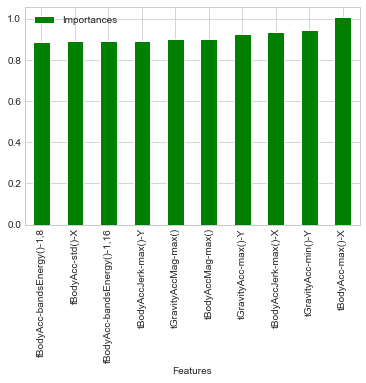

In [143]:
_,_,fs = select_feat(trainX, y_train['ActivityID'],testY,10)
top10_feat = pd.DataFrame({'Features': pd.DataFrame(trainX).columns,
                         'Importances': fs.scores_, 'Included': fs.get_support()})
top10_feat.set_index('Importances')
top10_feat = top10_feat[top10_feat.Included== True].sort_values('Importances')
top10_feat.plot.bar(color='green', x='Features')
top10_features = top10_feat['Features']
for _,row in top10_feat.iterrows():
    print('Feature %s: %f' %(row['Features'], row['Importances']))

#### Top 50
for the purpose of computation power and space will only display the features

In [144]:
_,_,fs = select_feat(trainX, y_train['ActivityID'],testY,50)
top50_feat = pd.DataFrame({'Features': pd.DataFrame(trainX).columns,
                         'Importances': fs.scores_, 'Included': fs.get_support()})
top50_feat.set_index('Importances')
top50_feat = top50_feat[top50_feat.Included== True].sort_values('Importances')
#top5_feat.plot.bar(color='green', x='Features')
top50_features = top50_feat['Features']
for _,row in top50_feat.iterrows():
    print('Feature %s: %f' %(row['Features'], row['Importances']))

Feature tBodyAcc-iqr()-X: 0.816650
Feature fBodyAccMag-std(): 0.817199
Feature fBodyAccJerk-energy()-X: 0.817214
Feature tBodyAccJerk-std()-X: 0.818746
Feature fBodyAccJerk-bandsEnergy()-1,24: 0.819007
Feature tGravityAcc-min()-X: 0.822995
Feature tBodyGyro-min()-Z: 0.823059
Feature tGravityAccMag-std(): 0.826991
Feature tBodyAccMag-std(): 0.827008
Feature fBodyAccMag-energy(): 0.827798
Feature fBodyAcc-entropy()-X: 0.830128
Feature tBodyAcc-min()-Y: 0.833864
Feature tBodyGyroJerk-max()-Y: 0.834015
Feature tBodyGyroJerk-min()-Y: 0.835646
Feature tBodyAccJerkMag-min(): 0.839723
Feature fBodyAccMag-mad(): 0.839825
Feature fBodyAcc-mean()-X: 0.846719
Feature tBodyGyroJerk-min()-X: 0.847176
Feature tBodyGyroJerkMag-min(): 0.847758
Feature tBodyGyroJerkMag-max(): 0.847906
Feature tBodyAccJerk-min()-Z: 0.850874
Feature fBodyAccJerk-bandsEnergy()-1,16: 0.850986
Feature tBodyGyroJerk-min()-Z: 0.854553
Feature tBodyAccJerk-min()-Y: 0.854934
Feature angle(Y,gravityMean): 0.855138
Feature tBodyGy

#### Top 100
again same reason, exclude visualisation

In [145]:
_,_,fs = select_feat(trainX, y_train['ActivityID'],testY,100)
top100_feat = pd.DataFrame({'Features': pd.DataFrame(trainX).columns,
                         'Importances': fs.scores_, 'Included': fs.get_support()})
top100_feat.set_index('Importances')
top100_feat = top100_feat[top100_feat.Included== True].sort_values('Importances')
#top5_feat.plot.bar(color='green', x='Features')
top100_features = top100_feat['Features']
for _,row in top100_feat.iterrows():
    print('Feature %s: %f' %(row['Features'], row['Importances']))

Feature tBodyAccJerk-sma(): 0.771960
Feature fBodyAccJerk-bandsEnergy()-9,16: 0.773568
Feature fBodyAccJerk-bandsEnergy()-1,24: 0.774892
Feature fBodyAccJerk-sma(): 0.775252
Feature tBodyAccJerkMag-mean(): 0.776063
Feature tBodyAccJerkMag-sma(): 0.776107
Feature tBodyGyroJerk-mad()-Z: 0.776579
Feature tBodyGyroJerk-mad()-X: 0.777740
Feature fBodyBodyAccJerkMag-sma(): 0.777851
Feature fBodyBodyAccJerkMag-mean(): 0.777855
Feature fBodyBodyAccJerkMag-max(): 0.777883
Feature fBodyBodyAccJerkMag-std(): 0.781477
Feature fBodyBodyAccJerkMag-mad(): 0.781628
Feature tGravityAccMag-mean(): 0.781861
Feature tBodyAccMag-sma(): 0.781870
Feature tGravityAccMag-sma(): 0.781903
Feature tBodyAccMag-mean(): 0.781932
Feature fBodyAccMag-iqr(): 0.782223
Feature tBodyGyro-max()-X: 0.782920
Feature fBodyAccJerk-max()-X: 0.783520
Feature tBodyAccJerkMag-energy(): 0.786899
Feature tBodyAcc-max()-Y: 0.787319
Feature fBodyAcc-sma(): 0.787825
Feature tBodyAcc-max()-Z: 0.792522
Feature fBodyBodyAccJerkMag-energy(

#### Logistic Regression

In [146]:
print('Top 5 features for Logistic Regression')
lr_model5 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_model5.fit(trainX[top5_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_model5_pred = lr_model5.predict(testY[top5_features])
print('f1_score', f1_score(lr_model5_pred, ytest['ActivityID'], average='micro'), '\n')

print('Top 10 features for Logistic Regression')
lr_model10 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_model10.fit(trainX[top10_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_model10_pred = lr_model10.predict(testY[top10_features])
print('f1_score', f1_score(lr_model10_pred, ytest['ActivityID'], average='micro'), '\n')

print('Top 50 features for Logistic Regression')
lr_model50 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_model50.fit(trainX[top50_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_model50_pred = lr_model50.predict(testY[top50_features])
print('f1_score', f1_score(lr_model50_pred, ytest['ActivityID'], average='micro'), '\n')

print('Top 100 features for Logistic Regression')
lr_model100 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_model100.fit(trainX[top100_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_model100_pred = lr_model100.predict(testY[top100_features])
print('f1_score', f1_score(lr_model100_pred, ytest['ActivityID'], average='micro'), '\n')

Top 5 features for Logistic Regression
training time: 0.40118837356567383s
f1_score 0.7787580590430947 

Top 10 features for Logistic Regression


C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



training time: 0.926814079284668s
f1_score 0.8021717000339329 

Top 50 features for Logistic Regression


C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



training time: 1.3153836727142334s
f1_score 0.8839497794367153 

Top 100 features for Logistic Regression
training time: 1.3785159587860107s
f1_score 0.8982015609093994 



C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* more features added, more training time and higher f1_score

In [147]:
print('Top 5 features for Random Forest Classifier')
rfc_model5 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_model5.fit(trainX[top5_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_model5_pred = rfc_model5.predict(testY[top5_features])
print('f1 score:', f1_score(rfc_model5_pred,ytest['ActivityID'], average='micro'), '\n')

print('Top 10 features for Random Forest Classifier')
rfc_model10 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_model10.fit(trainX[top10_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_model10_pred = rfc_model10.predict(testY[top10_features])
print('f1 score:', f1_score(rfc_model10_pred,ytest['ActivityID'], average='micro') , '\n')

print('Top 50 features for Random Forest Classifier')
rfc_model50 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_model50.fit(trainX[top50_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_model50_pred = rfc_model50.predict(testY[top50_features])
print('f1 score:', f1_score(rfc_model50_pred,ytest['ActivityID'], average='micro'), '\n')

print('Top 100 features for Random Forest Classifier')
rfc_model100 = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_model100.fit(trainX[top100_features], y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_model100_pred = rfc_model100.predict(testY[top100_features])
print('f1 score:', f1_score(rfc_model100_pred,ytest['ActivityID'], average='micro'),'\n')

Top 5 features for Random Forest Classifier
training time: 4.840120553970337s
f1 score: 0.7434679334916865 

Top 10 features for Random Forest Classifier
training time: 6.579188346862793s
f1 score: 0.7909738717339667 

Top 50 features for Random Forest Classifier
training time: 13.422794818878174s
f1 score: 0.8635900916185952 

Top 100 features for Random Forest Classifier
training time: 19.262972831726074s
f1 score: 0.8758059043094673 



* more features added, increases training time and f1_score

### 2.4  Feature Extraction

* PCA
* ISOMAP
* UMAP

#### 1. Show a 2D plot of the embeddings/principal components, and comment on the results.

#### PCA

Total σ captured by principle components: 77.37130030497703%
Total variation per principal component: [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.00995859 0.00965086 0.00860046 0.00800279
 0.00763981 0.00645083 0.00632222 0.00598703 0.00585877 0.00574803
 0.00567769 0.0052697 ] 



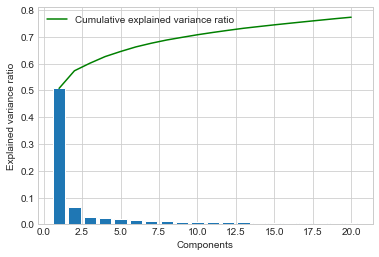

In [148]:
pca_modelf = PCA(n_components=20)
pcaf = pca_modelf.fit_transform(dat_harX)
print('Total σ captured by principle components: {0}%'.format(pca_modelf.explained_variance_ratio_.sum()*100))
print('Total variation per principal component: {0} \n'.format(pca_modelf.explained_variance_ratio_))
pcratio(pca_modelf)

* Given 20 components, `77.37%` data captured, `22.63%` data lost


#### ISOMAP

In [149]:
from sklearn import manifold

In [150]:
isomap_model = manifold.Isomap(n_neighbors=10, n_components=4)
isomapf = isomap_model.fit_transform(trainX)
manifold_2D = pd.DataFrame(isomapf, columns=['Component 1','Component 2','Component 3', 'Component 4'])

In [151]:
def mapIsoData(points, X, y, title):
    fig=plt.figure(2,(35,6))
    ax= fig.add_subplot(1,2,1)
    ax = sns.scatterplot(x=points[:,0], y=points[:,1], 
                         hue=y, s=70, palette='CMRmap_r')
    plt.title(title)
    plt.show()

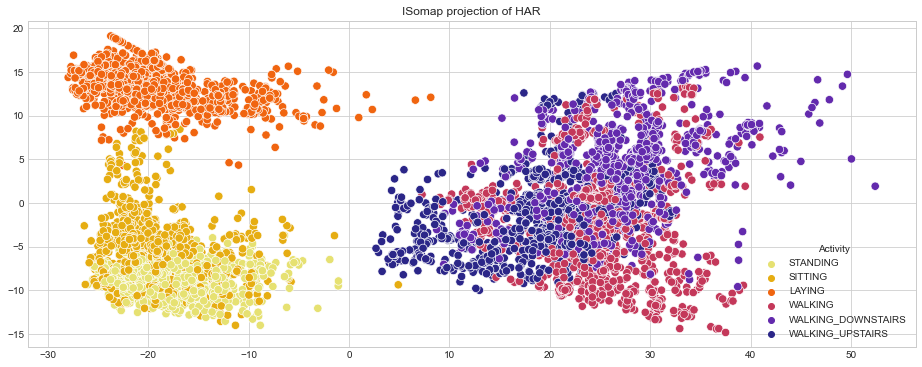

In [152]:
mapIsoData(isomapf,trainX, dat_har['Activity'],'ISomap projection of HAR')

* 4 components used
* there's clear division between static and dynamic where static motions are based on the left and the dynamic motions based on the right

#### UMAP

In [153]:
import umap.umap_ as umap

In [154]:
from  numba.core.errors import NumbaPerformanceWarning
warnings.simplefilter('ignore', category=NumbaPerformanceWarning)

In [155]:
umap_model = umap.UMAP(n_neighbors=10, n_components=2)
umapf = umap_model.fit_transform(dat_harX)


In [156]:
def Umap(points, X,y, title):
    fig=plt.figure(2,(35,6))
    ax=fig.add_subplot(1,2,1)
    ax = sns.scatterplot(x=points[:,0], y=points[:,1], hue=y, s=70, palette='CMRmap_r')
    plt.title(title)
    plt.show()

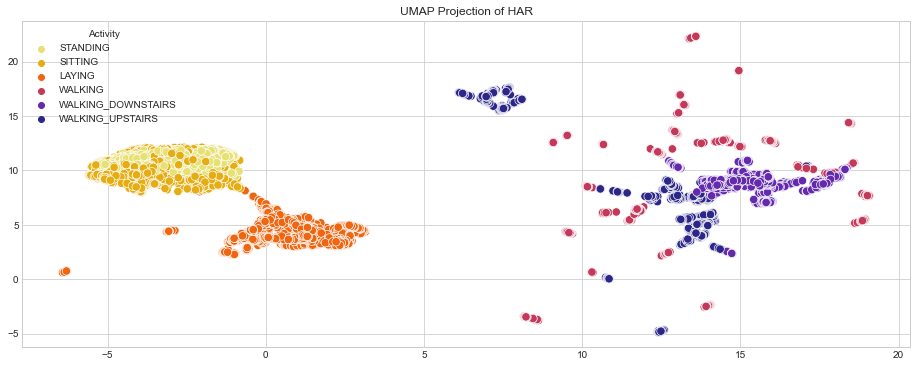

In [157]:
Umap(umapf,dat_harX, dat_har['Activity'],'UMAP Projection of HAR')

* 2 components used
* clear division between static and dynamic motion, static on the left, dynamic on the right

###  2. Train the baseline models on these embeddings (your features are the output from PCA/ISOMAP/UMAP). Record the training time and the F1 score

#### Baseline models on `PCA` output

In [158]:
#pca for train and test set

Pca_train = pca_modelf.fit_transform(trainX)
pca_test = pca_modelf.fit_transform(testY)

In [159]:
print('RFC based on on PCA ouput')
rfc_modelp = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_modelp.fit(Pca_train, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_modelp_pred = rfc_modelp.predict(pca_test)
print('f1 score:', f1_score(rfc_modelp_pred,ytest['ActivityID'], average='micro'))

RFC based on on PCA ouput
training time: 9.250937223434448s
f1 score: 0.5269765863590091


In [160]:
print('Lr model based on PCA output')
lr_modelp = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_modelp.fit(Pca_train, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_modelp_pred = lr_modelp.predict(pca_test)
print('f1_score', f1_score(lr_modelp_pred, ytest['ActivityID'], average='micro'))

Lr model based on PCA output
training time: 1.0289480686187744s
f1_score 0.5439429928741093


C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* `Logistic regression` is best performing model based on PCA output

#### Baseline models on ISOMAP output

In [161]:
#ISOMAP for tain and testset
isomap_train = isomap_model.fit_transform(trainX)
isomap_test = isomap_model.fit_transform(testY)

In [162]:
print('RFC based on on ISOMAP ouput')
rfc_modeli = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_modeli.fit(isomap_train, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_modeli_pred = rfc_modeli.predict(isomap_test)
print('f1 score:', f1_score(rfc_modeli_pred,ytest['ActivityID'], average='micro'))

RFC based on on ISOMAP ouput
training time: 4.589724540710449s
f1 score: 0.5062775704105871


In [163]:
print('Lr model based on ISOMAP output')
lr_modeli = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_modeli.fit(isomap_train, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_modeli_pred = lr_modeli.predict(isomap_test)
print('f1_score', f1_score(lr_modeli_pred, ytest['ActivityID'], average='micro'))

Lr model based on ISOMAP output
training time: 0.5931100845336914s
f1_score 0.504920257889379


C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* both models seemed to be equal, in this case by rounding off to `50.63%` rfc is recommended compared to `Logistic regression` with  `50.46%`

#### Baseline models based on UMAP output

In [164]:
umap_train = umap_model.fit_transform(trainX)
umap_test = StandardScaler().fit_transform(testY)
umap_test = umap_model.fit_transform(umap_test)

In [165]:
print('Lr model based on UMAP output')
lr_modelu = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=250, random_state=42)
start = time.time()
lr_modelu.fit(umap_train, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop - start}s')
lr_modelu_pred = lr_modelu.predict(umap_test)
print('f1_score', f1_score(lr_modelu_pred, ytest['ActivityID'], average='micro'))

Lr model based on UMAP output
training time: 0.5792462825775146s
f1_score 0.2660332541567696


C:\Users\didit\anaconda3\envs\dve_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [166]:
print('RFC based on on ISOMAP ouput')
rfc_modelu = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=42)
start = time.time()
rfc_modelu.fit(umap_train, y_train['ActivityID'])
stop = time.time()
print(f'training time: {stop- start}s')
rfc_modelu_pred = rfc_modelu.predict(umap_test)
print('f1 score:', f1_score(rfc_modelu_pred,ytest['ActivityID'], average='micro'))

RFC based on on ISOMAP ouput
training time: 2.4863007068634033s
f1 score: 0.3128605361384459


both models  are weak

### 3. Discuss your findings on the trade-off between training time, performance, and interpretability. Compare the baseline models with no feature reduction, when using feature selection, and using the feature extraction methods here.

#### No feature reduction
* maximum model training time  is `15s`by `RFC` 
* minimum model training time is `1.6s` by `Lr`
* maximum f1_score is `0.96..` by `Lr`
* minimum f1_score is `0.92..` by `RFC`

#### Feature Selection
* maximum model training time  is `6.5s`by `RFC` based on Top 100 features
* minimum model training time is `0.13s` by `logistic regression(Lr)` based on Top 5 features
* maximum f1_score is `89.68%` by `Lr` based on Top 100
* minimum f1_score is `74.35%` by `RFC` based on Top 5 features

#### Feature Extraction
* maximum model training time  is `3s`by `RFC` based on PCA output 
* minimum model training time is `0.29s` by `RFC` based on ISOMAP output
* maximum f1_score is `0.54..` by `Lr` based on PCA output
* minimum f1_score is `0.14..` by `LR` based on UMAP output

#### Tradeoff
 the two based models have good performance with no feature reduction, even though they take time to train.
 the  worst baselines model performances were loaded by feature extraction via PCA,ISOMAP,UMAP.
 Given feature selection and extraction are considered to provide form of intepretability for certain features
 #### Baseline models comparisons
 * for all categories, feature selection, non-reduction, and extraction, Logistic regression has performed better compared to random forest classifier

### Question 3 Indian Premier League

In [167]:
match = pd.read_csv('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/all_matches.csv')
match

match_id       city  match_date          umpire1          umpire2  \
0      392217  Kimberley  2009-05-09       GAV Baxter  HDPK Dharmasena   
1     1254112    Sharjah  2021-10-02     AK Chaudhary         MA Gough   
2      829817     Mumbai  2015-05-19  HDPK Dharmasena   RK Illingworth   
3      336022      Delhi  2008-05-17   AV Jayaprakash      RE Koertzen   
4      501258     Indore  2011-05-15       PR Reiffel        RJ Tucker   
..        ...        ...         ...              ...              ...   
945    419122     Mumbai  2010-03-22        SS Hazare       SJA Taufel   
946   1216525        NaN  2020-10-10     AK Chaudhary       PR Reiffel   
947   1178396     Jaipur  2019-04-07     AK Chaudhary      CB Gaffaney   
948    598012    Chennai  2013-04-13        Asad Rauf     AK Chaudhary   
949   1136596  Hyderabad  2018-05-05     BNJ Oxenford        CK Nandan   

      season                        team1                        team2  \
0       2009          Chennai Super Kings             Rajasthan Royals   
1       2021               Mumbai Indians               Delhi Capitals   
2       2015          Chennai Super Kings               Mumbai Indians   
3    2007/08             Delhi Daredevils              Kings XI Punjab   
4       2011         Kochi Tuskers Kerala             Rajasthan Royals   
..       ...                          ...                          ...   
945  2009/10               Mumbai Indians        Kolkata Knight Riders   
946  2020/21  Royal Challengers Bangalore          Chennai Super Kings   
947     2019             Rajasthan Royals        Kolkata Knight Riders   
948     2013          Chennai Super Kings  Royal Challengers Bangalore   
949     2018             Delhi Daredevils          Sunrisers Hyderabad   

                     toss_winner toss_decision  \
0               Rajasthan Royals           bat   
1                 Delhi Capitals         field   
2                 Mumbai Indians           bat   
3               Delhi Daredevils           bat   
4           Kochi Tuskers Kerala         field   
..                           ...           ...   
945        Kolkata Knight Riders           bat   
946  Royal Challengers Bangalore           bat   
947        Kolkata Knight Riders         field   
948          Chennai Super Kings         field   
949             Delhi Daredevils           bat   

                                   venue                       winner  \
0                  De Beers Diamond Oval          Chennai Super Kings   
1                Sharjah Cricket Stadium               Delhi Capitals   
2                       Wankhede Stadium               Mumbai Indians   
3                       Feroz Shah Kotla              Kings XI Punjab   
4                 Holkar Cricket Stadium         Kochi Tuskers Kerala   
..                                   ...                          ...   
945                    Brabourne Stadium               Mumbai Indians   
946  Dubai International Cricket Stadium  Royal Challengers Bangalore   
947               Sawai Mansingh Stadium        Kolkata Knight Riders   
948      MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
949   Rajiv Gandhi International Stadium          Sunrisers Hyderabad   

                  mom     inning1_bat                  inning2_bat  
0         S Badrinath  Mumbai Indians             Rajasthan Royals  
1            AR Patel  Mumbai Indians               Delhi Capitals  
2          KA Pollard  Mumbai Indians               Mumbai Indians  
3    DPMD Jayawardene  Mumbai Indians             Delhi Daredevils  
4            BJ Hodge  Mumbai Indians         Kochi Tuskers Kerala  
..                ...             ...                          ...  
945      SR Tendulkar  Mumbai Indians        Kolkata Knight Riders  
946           V Kohli  Mumbai Indians  Royal Challengers Bangalore  
947         HF Gurney  Mumbai Indians        Kolkata Knight Riders  
948         RA Jadeja  Mumbai Indians          Chennai Supe

### 1. How many unique teams are there? (Note, not all teams played every season). You might have to clean up the names of the teams to get the correct answer.

In [168]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       950 non-null    int64 
 1   city           899 non-null    object
 2   match_date     950 non-null    object
 3   umpire1        950 non-null    object
 4   umpire2        950 non-null    object
 5   season         950 non-null    object
 6   team1          950 non-null    object
 7   team2          950 non-null    object
 8   toss_winner    950 non-null    object
 9   toss_decision  950 non-null    object
 10  venue          950 non-null    object
 11  winner         950 non-null    object
 12  mom            946 non-null    object
 13  inning1_bat    950 non-null    object
 14  inning2_bat    950 non-null    object
dtypes: int64(1), object(14)
memory usage: 111.5+ KB


In [169]:
match.describe()

match_id
count  9.500000e+02
mean   8.304852e+05
std    3.375678e+05
min    3.359820e+05
25%    5.012612e+05
50%    8.297380e+05
75%    1.175372e+06
max    1.312200e+06

In [170]:
match.describe(include=['object'])

city  match_date       umpire1 umpire2 season  \
count      899         950           950     950    950   
unique      33         706            58      60     15   
top     Mumbai  2009-05-09  AK Chaudhary  S Ravi   2013   
freq       159           2            95      83     76   

                              team1           team2     toss_winner  \
count                           950             950             950   
unique                           18              18              18   
top     Royal Challengers Bangalore  Mumbai Indians  Mumbai Indians   
freq                            126             119             123   

       toss_decision         venue          winner             mom  \
count            950           950             950             946   
unique             2            49              20             262   
top            field  Eden Gardens  Mumbai Indians  AB de Villiers   
freq             599            77             129              25   

           inning1_bat     inning2_bat  
count              950             950  
unique               2              18  
top     Mumbai Indians  Mumbai Indians  
freq               941             123

In [171]:
print('length of this dataset',len(match))

length of this dataset 950


In [172]:
match.shape

(950, 15)

In [173]:
print(match['team1'].unique())

['Chennai Super Kings' 'Mumbai Indians' 'Delhi Daredevils'
 'Kochi Tuskers Kerala' 'Delhi Capitals' 'Sunrisers Hyderabad'
 'Kings XI Punjab' 'Punjab Kings' 'Rajasthan Royals'
 'Kolkata Knight Riders' 'Deccan Chargers' 'Royal Challengers Bangalore'
 'Pune Warriors' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Lucknow Super Giants' 'Gujarat Titans']


In [174]:
print(match['team2'].unique())

['Rajasthan Royals' 'Delhi Capitals' 'Mumbai Indians' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Gujarat Titans' 'Rising Pune Supergiants'
 'Chennai Super Kings' 'Kolkata Knight Riders' 'Delhi Daredevils'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Deccan Chargers'
 'Lucknow Super Giants' 'Punjab Kings' 'Sunrisers Hyderabad'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [175]:
team_names = pd.concat([match['team1'], match['team2']]).unique()
pd.concat([match['team1'], match['team2']]).unique()

array(['Chennai Super Kings', 'Mumbai Indians', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Punjab Kings', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Pune Warriors', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Rising Pune Supergiants',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [176]:
match['team1'].value_counts()

Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Gujarat Titans                   7
Name: team1, dtype: int64

In [177]:
match['team2'].value_counts()

Mumbai Indians                 119
Kolkata Knight Riders          118
Rajasthan Royals               103
Royal Challengers Bangalore    100
Kings XI Punjab                 98
Chennai Super Kings             97
Sunrisers Hyderabad             83
Delhi Daredevils                76
Deccan Chargers                 36
Delhi Capitals                  34
Pune Warriors                   23
Gujarat Lions                   14
Punjab Kings                    10
Gujarat Titans                   9
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Lucknow Super Giants             7
Name: team2, dtype: int64

given both outputs above, we can see theres repetition with occurence of `s` so we will fix that to avoid duplicates
* and also some teams were renamed

In [178]:
match['team1'] = match['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant',
                                        'Kings XI Punjab':'Punjab Kings',
                                        'Delhi Daredevils':'Delhi Capitals'})
match['team2'] = match['team2'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant',
                                        'Kings XI Punjab': 'Punjab Kings',
                                        'Delhi Daredevils': 'Delhi Capitals'})

In [179]:
match['winner'] = match['winner'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant',
                                                     'Kings XI Punjab': 'Punjab Kings',
                                                      'Delhi Daredevils': 'Delhi Capitals'})
match['toss_winner'] = match['toss_winner'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant',
                                                     'Kings XI Punjab': 'Punjab Kings',
                                                      'Delhi Daredevils': 'Delhi Capitals'})

In [180]:


unique_teams = pd.concat([match['team1'], match['team2']]).nunique()
print('Total No. of teams:', unique_teams)

Total No. of teams: 15


### 2 . Produce a plot showing the win percentage for all teams(barplot)

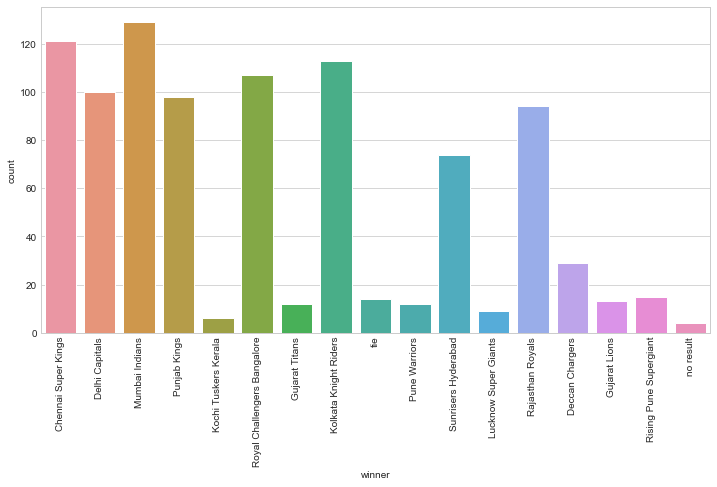

In [181]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match)
plt.xticks(rotation=90)
plt.show()

In [209]:
match_p = pd.concat([match['team1'], match['team2']])
match_p = match_p.value_counts().rename_axis('teams').reset_index(name='match_played')
team_w = match['winner'].value_counts().rename_axis('teams').reset_index(name='wins')
team_w = team_w[team_w['teams'].isin(list(team_names))]
team_wp = pd.merge(match_p, team_w, on='teams')

team_wp['win_percent'] = (team_wp['wins']/team_wp['match_played'])*100
team_wp = team_wp.sort_values('win_percent', ascending=False)
team_wp

teams  match_played  wins  win_percent
12               Gujarat Titans            16    12    75.000000
13         Lucknow Super Giants            15     9    60.000000
5           Chennai Super Kings           208   121    58.173077
0                Mumbai Indians           231   129    55.844156
3         Kolkata Knight Riders           223   113    50.672646
11       Rising Pune Supergiant            30    15    50.000000
6              Rajasthan Royals           192    94    48.958333
7           Sunrisers Hyderabad           152    74    48.684211
1   Royal Challengers Bangalore           226   107    47.345133
4                  Punjab Kings           218    98    44.954128
2                Delhi Capitals           224   100    44.642857
10                Gujarat Lions            30    13    43.333333
14         Kochi Tuskers Kerala            14     6    42.857143
8               Deccan Chargers            75    29    38.666667
9                 Pune Warriors            46    12    26.086957

* `Gujarat Titans` has highest win, by `75%`
* followed by `Luck super giants` with `60%`
* last is `Pune warriors` with `26%`

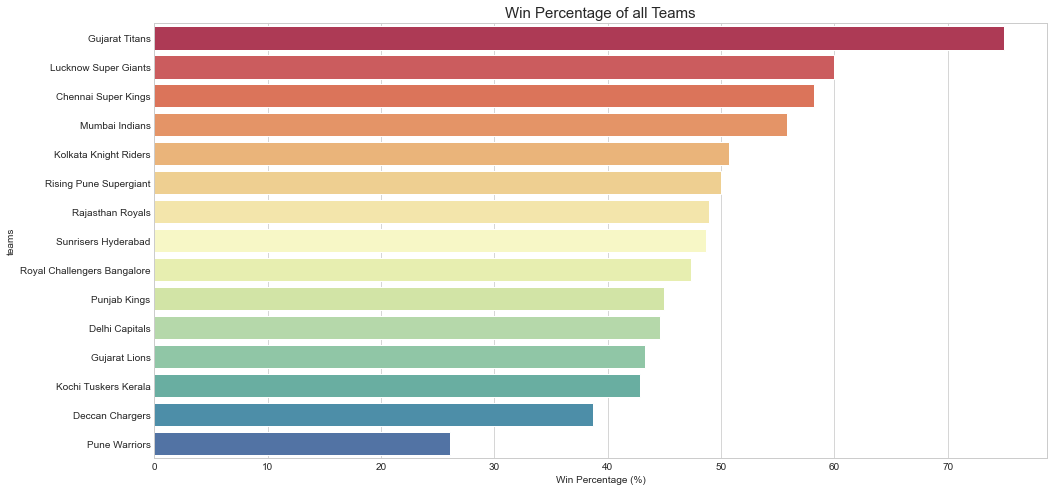

In [210]:
plt.figure(figsize=(16,8))
sns.barplot(data=team_wp, y = 'teams', x = 'win_percent', orient='h', palette='Spectral')
plt.xlabel("Win Percentage (%)")
plt.title("Win Percentage of all Teams",fontsize=15)

plt.xticks(rotation=0);
plt.show()

### 3.  Plot the win percentage over time (ie, how it changes per season) for each team. Comment on these results and if teams are staying the same, improving, or getting worse.

In [211]:
#no. of matches played per season for team1
match_ps1 = match.groupby('season')['team1'].value_counts().reset_index(name='match_ps')
match_ps1.rename(columns = {'team1':'teams'}, inplace = True)
# no. of matches played per season for team2
match_ps2 = match.groupby('season')['team2'].value_counts().reset_index(name='matches_ps')
match_ps2.rename(columns = {'team2':'teams'}, inplace = True)

In [212]:
# Number of matches played per season for team 1 and 2
total_matchps = pd.concat([match_ps1, match_ps2])
# Number of matches per season for each unique team
total_matchps = total_matchps.groupby(['season', 'teams'])['matches_ps'].sum().reset_index(name='matches')

In [213]:
# Team wins per season
team_wps = match.groupby('season')['winner'].value_counts().reset_index(name='wins')
team_wps.rename(columns = {'winner':'teams'}, inplace = True)
team_wps = team_wps[team_wps['teams'].isin(list(team_names))]

In [214]:
team_win_percent_ps = pd.merge(total_matchps, team_wps, on=['season', 'teams'])
# Calculating win percent
team_win_percent_ps['win_percent'] = (team_win_percent_ps['wins']/team_win_percent_ps['matches'])*100
team_win_percent_ps = team_win_percent_ps.sort_values('win_percent', ascending=False)
team_win_percent_ps.head()

season                        teams  matches  wins  win_percent
15    2009  Royal Challengers Bangalore      0.0     9          inf
8     2009          Chennai Super Kings      3.0     8   266.666667
123   2022             Rajasthan Royals      4.0    10   250.000000
108   2021          Chennai Super Kings      6.0    11   183.333333
95    2019               Mumbai Indians      6.0    10   166.666667

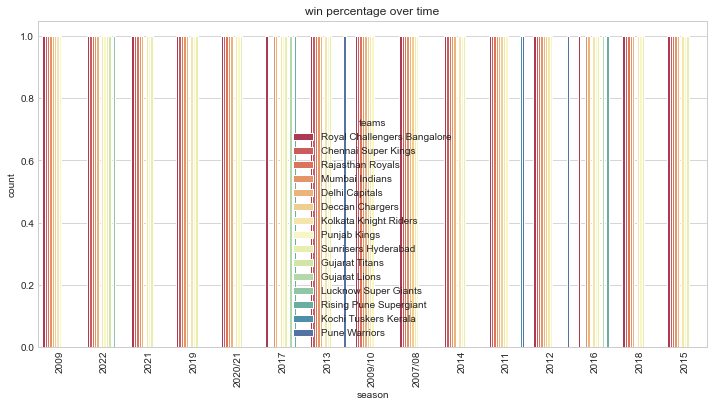

In [188]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='teams', data=team_win_percent_ps, palette='Spectral')
plt.xticks(rotation=90)
plt.title('win percentage over time')
plt.legend(title='teams')
plt.show()

Given the outp as for `Rising Pune Supergiant` team has been winning `2014` ever since it should result
* Mumbair Indians has a high winning streak ever since 2018,, then it went down, basically fluctuates
* Rajasthan royals team has the gihest winnig streak for season = 2015

ValueError: min() arg is an empty sequence

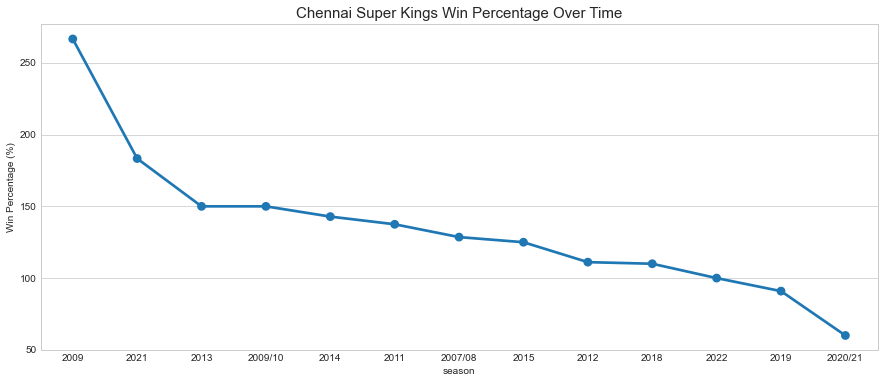

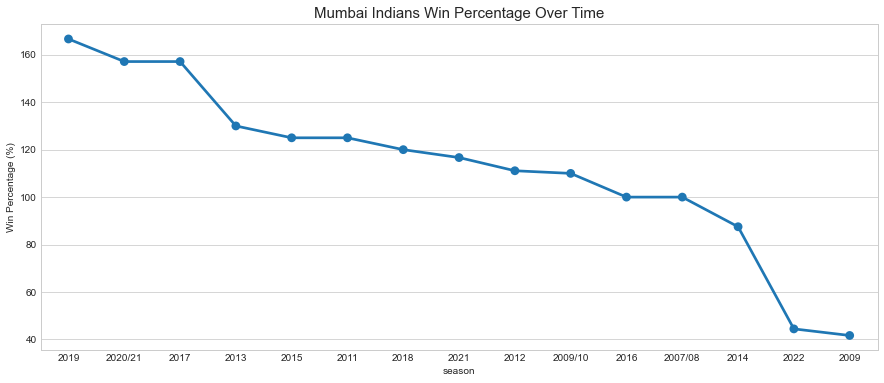

<Figure size 1080x432 with 0 Axes>

In [219]:
for team in team_names:
    plt.figure(figsize=(15,6))
    sns.pointplot(data = team_win_percent_ps[team_win_percent_ps['teams']== team], 
             y = 'win_percent', x = 'season');
    plt.title(team + " Win Percentage Over Time", fontsize=15)
    plt.ylabel("Win Percentage (%)")

#### 4. Identify the winner of each tournament. You can come up with your own method, and check it against what you find online, but you must explain how you got to this answer.

In [189]:
print('seasons in the dataset', match['season'].unique())

seasons in the dataset ['2009' '2021' '2015' '2007/08' '2011' '2012' '2019' '2022' '2016' '2014'
 '2017' '2013' '2020/21' '2018' '2009/10']


In [190]:
match['match_date']= pd.to_datetime(match['match_date'], format='%Y-%m-%d')

In [191]:
season_winners = match[['winner','season']][match.groupby('season').match_date.transform('max')==match.match_date]
season_winners

winner   season
50          Gujarat Titans     2022
158         Mumbai Indians     2019
266  Kolkata Knight Riders     2012
313         Mumbai Indians  2020/21
390         Mumbai Indians     2017
525    Chennai Super Kings     2018
593  Kolkata Knight Riders     2014
595    Chennai Super Kings     2021
635    Chennai Super Kings  2009/10
644    Chennai Super Kings     2011
718    Sunrisers Hyderabad     2016
727        Deccan Chargers     2009
792         Mumbai Indians     2015
862         Mumbai Indians     2013
869       Rajasthan Royals  2007/08

In [192]:
max_winners= match.groupby('season')['winner'].value_counts()
max_winners

season   winner               
2007/08  Rajasthan Royals         13
         Punjab Kings             10
         Chennai Super Kings       9
         Delhi Capitals            7
         Mumbai Indians            7
                                  ..
2022     Punjab Kings              7
         Kolkata Knight Riders     6
         Sunrisers Hyderabad       6
         Chennai Super Kings       4
         Mumbai Indians            4
Name: winner, Length: 138, dtype: int64

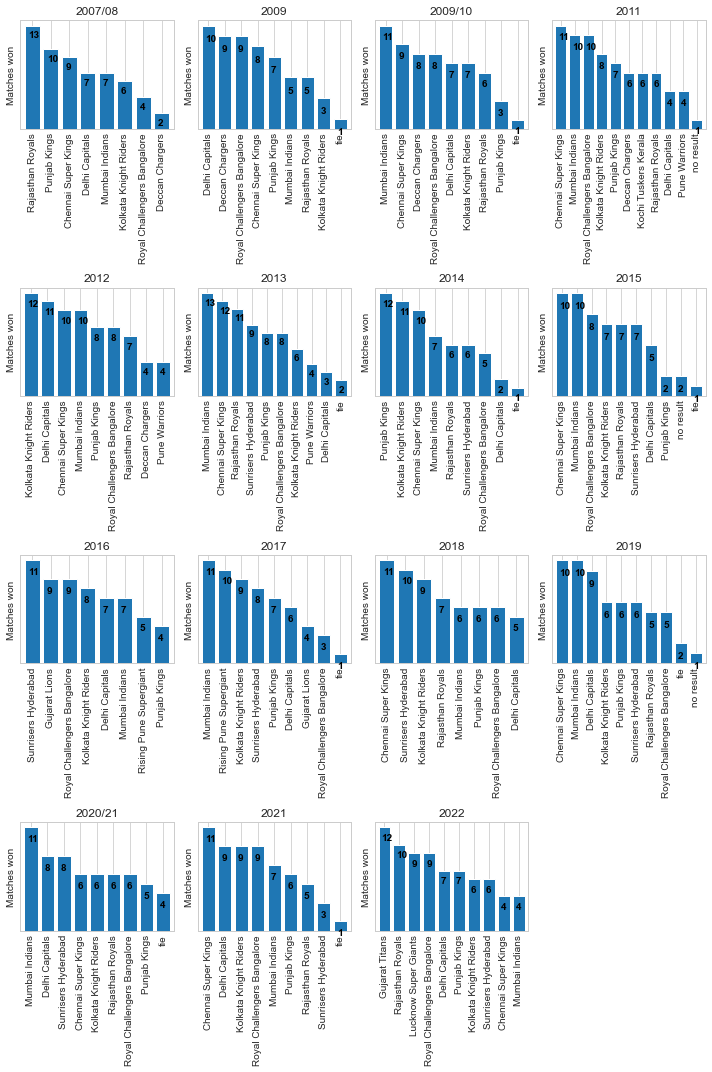

In [193]:
groups = max_winners.groupby('season')
fig = plt.figure()
count = 1
for year, group in groups:
    ax= fig.add_subplot(4,4,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize=(10,15), width=0.8)
    count +=1;
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches won')
    
    total_matches = []
    for i in ax.patches:
        total_matches.append(i.get_height())
        total = sum(total_matches)
        
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5, s=i.get_height(), color='black',
               fontweight='bold')
        
plt.tight_layout()
plt.show()

#### 5. What is the most frequent decision taken for the winner of the toss? Batting or bowling?

In [194]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

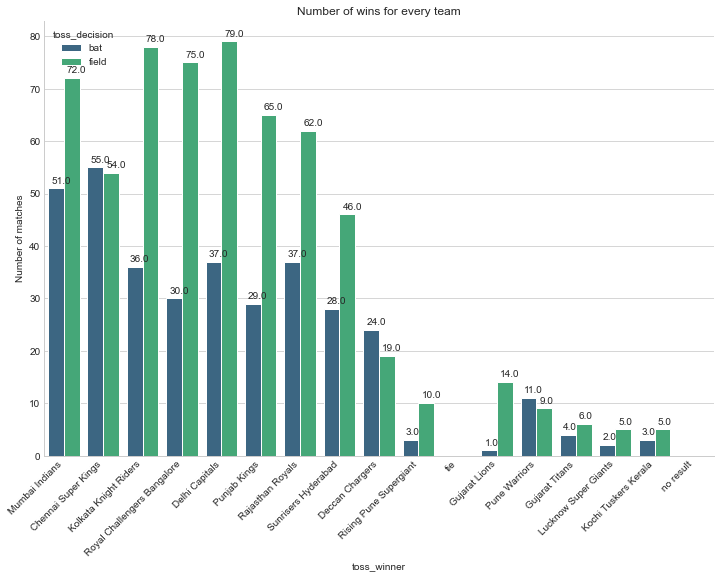

In [195]:
plt.figure(figsize=(12,8))
ax=sns.countplot('toss_winner', data=match, hue='toss_decision', order=match['winner'].value_counts().index,
                 palette='viridis'
                )
plt.title('Number of wins for every team',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of matches')
annot_plot(ax,0.08,1)
plt.show()

Text(0, 0.5, 'Count')

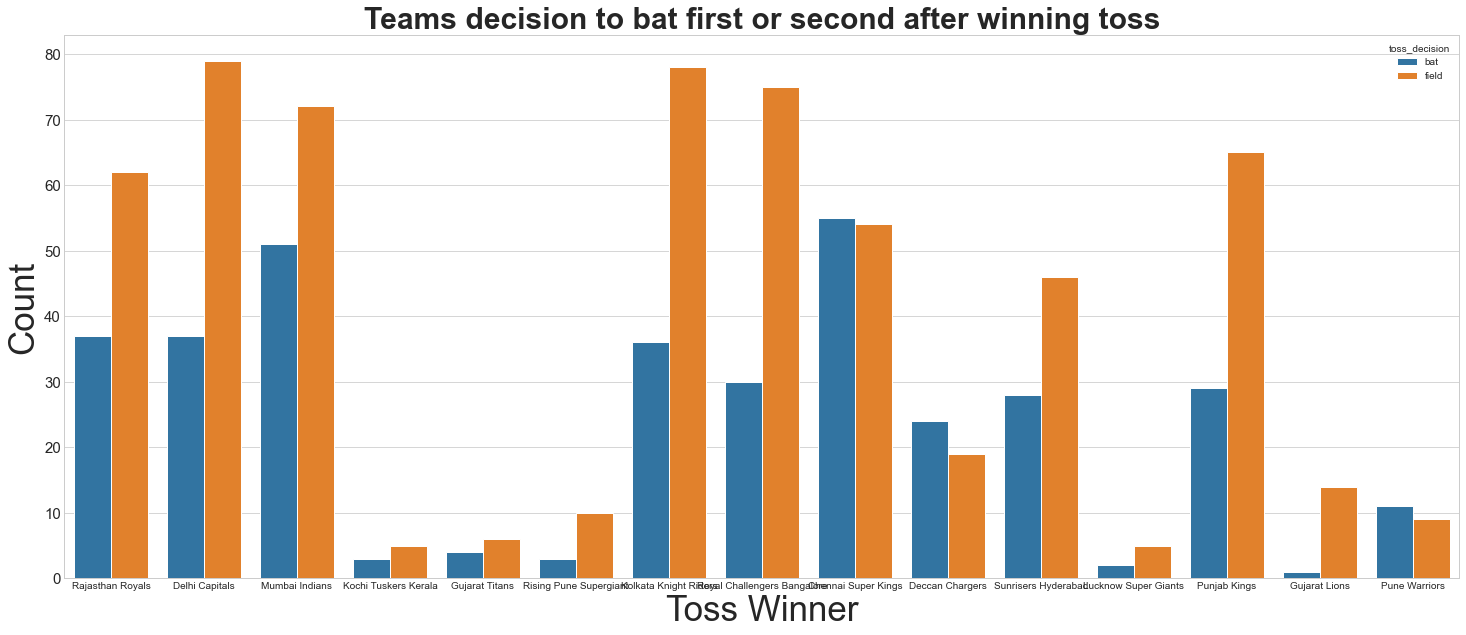

In [196]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = match, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

In [220]:
match['toss_decision'].value_counts()

field    599
bat      351
Name: toss_decision, dtype: int64

`Bowling` is the frequent decision taken for the winner of the toss

#### 6. How many times did the winner of toss also win the game?

In [197]:
match.groupby(['toss_winner', 'toss_decision']).mean()

match_id
toss_winner                 toss_decision              
Chennai Super Kings         bat            6.818123e+05
                            field          9.556468e+05
Deccan Chargers             bat            4.476157e+05
                            field          4.167432e+05
Delhi Capitals              bat            7.571689e+05
                            field          8.990568e+05
Gujarat Lions               bat            1.082625e+06
                            field          1.024528e+06
Gujarat Titans              bat            1.304098e+06
                            field          1.305428e+06
Kochi Tuskers Kerala        bat            5.012180e+05
                            field          5.012300e+05
Kolkata Knight Riders       bat            6.137537e+05
                            field          9.341361e+05
Lucknow Super Giants        bat            1.304102e+06
                            field          1.305691e+06
Mumbai Indians              bat            7.357251e+05
                            field          9.035446e+05
Pune Warriors               bat            5.623607e+05
                            field          5.547190e+05
Punjab Kings                bat            6.471643e+05
                            field          8.381737e+05
Rajasthan Royals            bat            6.915660e+05
                            field          8.410480e+05
Rising Pune Supergiant      bat            9.809397e+05
                            field          1.041955e+06
Royal Challengers Bangalore bat            8.575425e+05
                            field          8.579894e+05
Sunrisers Hyderabad         bat            9.309069e+05
                            field          1.115972e+06

In [198]:
pd.crosstab(match.toss_winner, match.toss_decision)

toss_decision                bat  field
toss_winner                            
Chennai Super Kings           55     54
Deccan Chargers               24     19
Delhi Capitals                37     79
Gujarat Lions                  1     14
Gujarat Titans                 4      6
Kochi Tuskers Kerala           3      5
Kolkata Knight Riders         36     78
Lucknow Super Giants           2      5
Mumbai Indians                51     72
Pune Warriors                 11      9
Punjab Kings                  29     65
Rajasthan Royals              37     62
Rising Pune Supergiant         3     10
Royal Challengers Bangalore   30     75
Sunrisers Hyderabad           28     46

In [199]:
np.sum(match['toss_winner']==match['winner'])

483

In [200]:
458/950

0.48210526315789476

#### 7. How likely are you to win the game if you win the toss? Show a plot indicating how this changes for all venues.

In [201]:
probability_win = match['toss_winner']==match['winner']
probability_win.groupby(probability_win).size()

False    467
True     483
dtype: int64

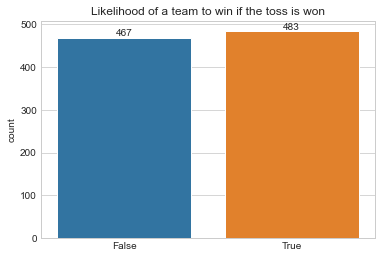

In [223]:
ax= sns.countplot(probability_win)
ax.bar_label(ax.containers[0])
plt.title('Likelihood of a team to win if the toss is won')
plt.show()

In [224]:
458/950

0.48210526315789476

In [225]:
match['toss_game_win'] = match['toss_winner']==match['winner']

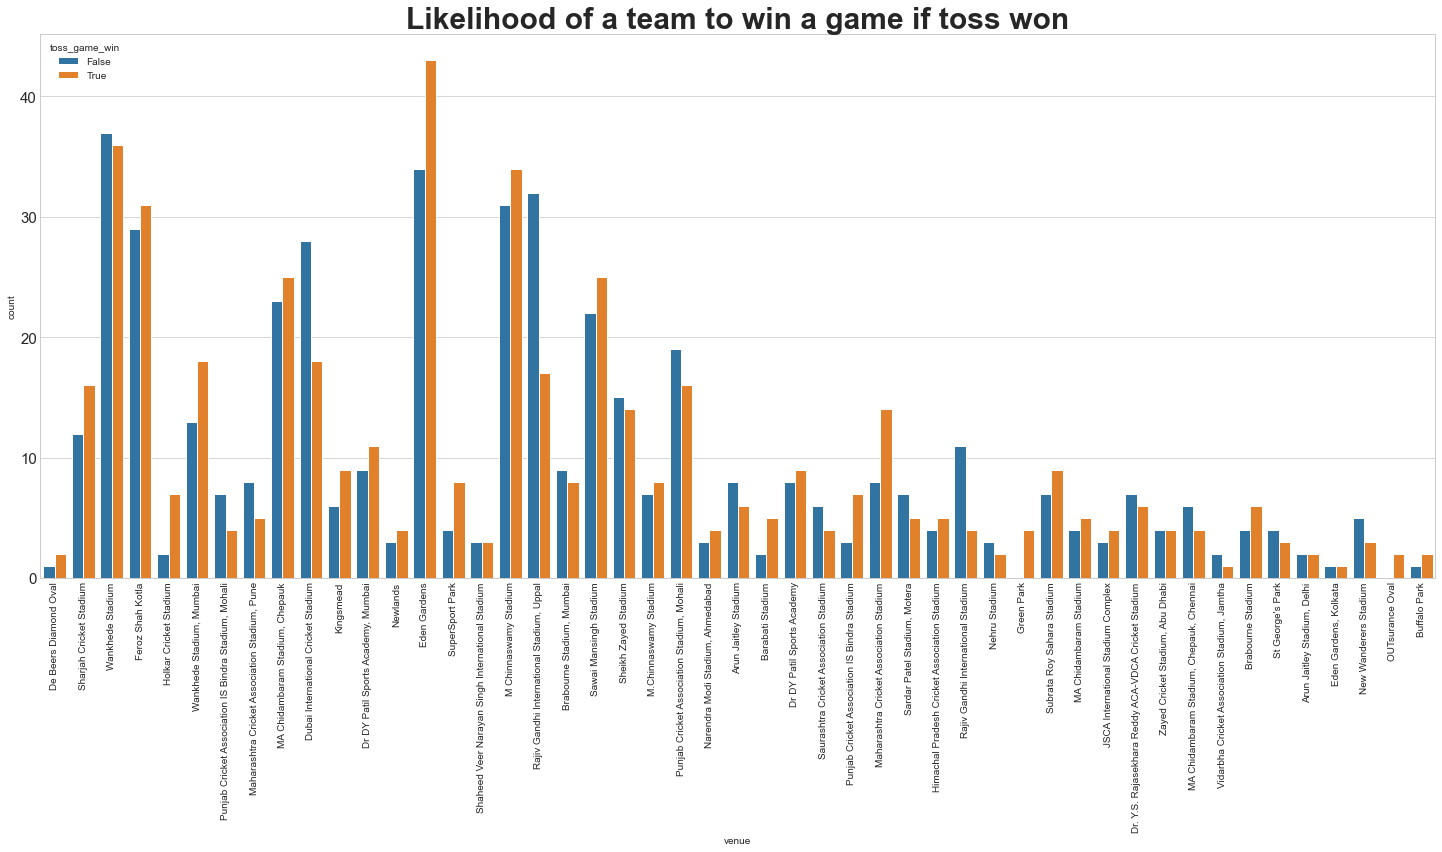

In [229]:
plt.figure(figsize = (25,10))
sns.countplot('venue', data = match, hue = 'toss_game_win')
plt.title("Likelihood of a team to win a game if toss won", size = 30, fontweight = 'bold')
plt.xticks(rotation='vertical')
plt.yticks(size = 15)
plt.show()

* `Eden Garden` shows higher likelihood of winning a game if toss= won, followed by `M Chinnaswany stadium`, and ` Maharashtra cricket association stadium`
* ` Rajiv gandhi IS` and ` Rajivi handi IS, Uppal` show less likelihood of winning given toss = won

### 3.7 Team scores

#### 1. Calculate and plot the total number of runs scored per match

In [203]:
delivery = pd.read_csv('C:/Users/didit/Downloads/DVE_Exam/datasets_2022/all_deliveries.csv')
delivery.head()

match_id  over  ball_num  inning  is_pp  runs_total  runs_extras  \
0    392217     0         0       1  False           1            0   
1    392217     0         1       1   True           0            0   
2    392217     0         2       1  False           0            0   
3    392217     0         3       1  False           0            0   
4    392217     0         4       1  False           4            0   

   extras_bowler  extras_team  runs_batter      striker non_striker  \
0              0            0            1     GC Smith     NV Ojha   
1              0            0            0      NV Ojha    GC Smith   
2              0            0            0      NV Ojha    GC Smith   
3              0            0            0  SA Asnodkar    GC Smith   
4              0            0            4  SA Asnodkar    GC Smith   

      bowler how_out player_dismissed  
0  JA Morkel     NaN              NaN  
1  JA Morkel     NaN              NaN  
2  JA Morkel  bowled          NV Ojha  
3  JA Morkel     NaN              NaN  
4  JA Morkel     NaN              NaN

In [204]:
ipl = pd.merge(match,delivery, on='match_id')
ipl.head()

match_id       city match_date     umpire1          umpire2 season  \
0    392217  Kimberley 2009-05-09  GAV Baxter  HDPK Dharmasena   2009   
1    392217  Kimberley 2009-05-09  GAV Baxter  HDPK Dharmasena   2009   
2    392217  Kimberley 2009-05-09  GAV Baxter  HDPK Dharmasena   2009   
3    392217  Kimberley 2009-05-09  GAV Baxter  HDPK Dharmasena   2009   
4    392217  Kimberley 2009-05-09  GAV Baxter  HDPK Dharmasena   2009   

                 team1             team2       toss_winner toss_decision  ...  \
0  Chennai Super Kings  Rajasthan Royals  Rajasthan Royals           bat  ...   
1  Chennai Super Kings  Rajasthan Royals  Rajasthan Royals           bat  ...   
2  Chennai Super Kings  Rajasthan Royals  Rajasthan Royals           bat  ...   
3  Chennai Super Kings  Rajasthan Royals  Rajasthan Royals           bat  ...   
4  Chennai Super Kings  Rajasthan Royals  Rajasthan Royals           bat  ...   

  runs_total runs_extras extras_bowler extras_team runs_batter      striker  \
0          1           0             0           0           1     GC Smith   
1          0           0             0           0           0      NV Ojha   
2          0           0             0           0           0      NV Ojha   
3          0           0             0           0           0  SA Asnodkar   
4          4           0             0           0           4  SA Asnodkar   

   non_striker     bowler  how_out  player_dismissed  
0      NV Ojha  JA Morkel      NaN               NaN  
1     GC Smith  JA Morkel      NaN               NaN  
2     GC Smith  JA Morkel   bowled           NV Ojha  
3     GC Smith  JA Morkel      NaN               NaN  
4     GC Smith  JA Morkel      NaN               NaN  

[5 rows x 29 columns]

In [205]:
ipl.shape

(225954, 29)

In [234]:
team_runner = ipl.groupby('runs_total')['winner'].value_counts()
team_runner

runs_total  winner                     
0           Mumbai Indians                 11091
            Chennai Super Kings            10162
            Kolkata Knight Riders           9495
            Royal Challengers Bangalore     8808
            Delhi Capitals                  8087
                                           ...  
7           Lucknow Super Giants               2
            Sunrisers Hyderabad                2
            Kochi Tuskers Kerala               1
            Rising Pune Supergiant             1
            tie                                1
Name: winner, Length: 130, dtype: int64

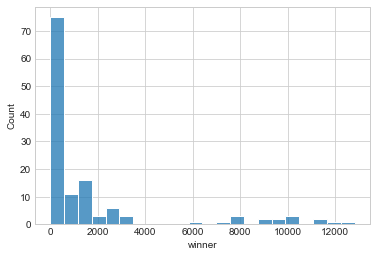

In [208]:
sns.histplot(team_runner)
plt.show()

tot_runs_eachteam = []
for i in teams:
    temp = delivery.loc[deliver['']]

In [230]:
runs_per_match = ipl.groupby(['match_id'])['runs_total'].sum().reset_index(name='runs_total')
runs_per_match

match_id  runs_total
0      335982         304
1      335983         447
2      335984         261
3      335985         331
4      335986         222
..        ...         ...
945   1304116         317
946   1312197         379
947   1312198         400
948   1312199         318
949   1312200         263

[950 rows x 2 columns]

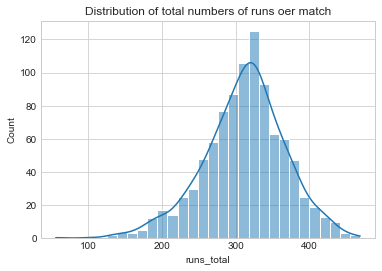

In [239]:
sns.histplot(runs_per_match['runs_total'], kde=True)
plt.title('Distribution of total numbers of runs oer match')
plt.show()

* given the above plot, the total runs is uniform distribution
* matches have total  of 240 to 360 runs

#### 2. Next, plot the average number of runs scored per match in each season. Is there any noticeable trend?

In [240]:
runs_per_match_ps = \
ipl.groupby(['match_id','season'])['runs_total'].value_counts().reset_index(name='runs_pm_ps')
# Average Number of runs per match per season
runs_per_match_ps = runs_per_match_ps.groupby(['season'])['runs_pm_ps'].mean().reset_index(name='runs_average')
print("Average Number of Runs Per Match in each Season")
runs_per_match_ps

Average Number of Runs Per Match in each Season


season  runs_average
0   2007/08     37.678771
1      2009     38.653409
2   2009/10     39.289973
3      2011     38.842466
4      2012     40.563927
5      2013     40.037445
6      2014     39.393939
7      2015     38.784091
8      2016     39.155556
9      2017     40.770588
10     2018     41.771930
11     2019     40.315493
12  2020/21     40.441667
13     2021     41.570605
14     2022     40.161435

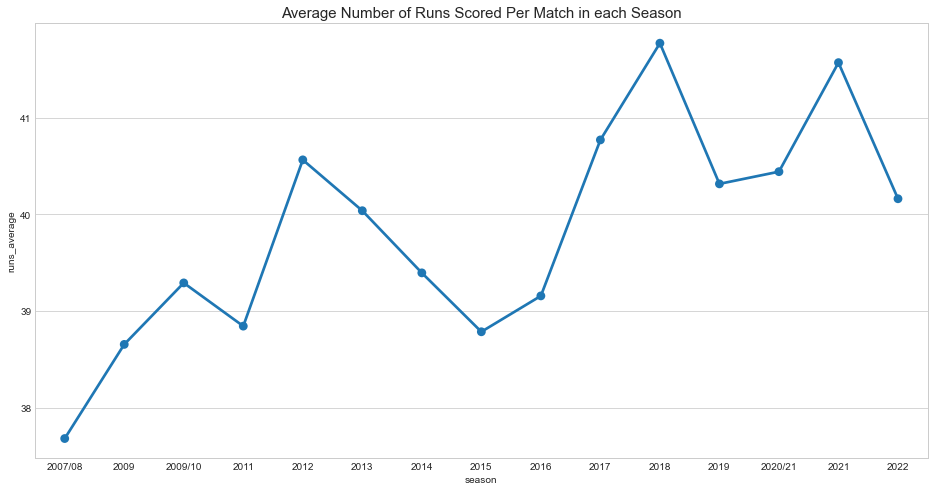

In [241]:
plt.figure(figsize=(16,8))
sns.pointplot(x="season", y="runs_average", data=runs_per_match_ps)
plt.title("Average Number of Runs Scored Per Match in each Season", fontsize=15)
plt.show()

* average mumber of runs does increase for new seasons, then heavily decreases from to 2013 to 2015 and increases again, then fluctuates

#### 3. The higher the score in the 1st innings, the more likely this team is to win. Look at how frequently (ie what percentage of games are won) a game is won when the 1st innings total is above 190

In [242]:
first_inn = ipl[ipl['inning']==1]

In [245]:
first_inning_score = first_inn.groupby(['match_id'])['runs_total'].sum().reset_index(name='runs_total_1st_in')
# Win/lose column based 1st innings total score (190 and above)
first_inning_score['1st_in_game'] = np.where((first_inning_score['runs_total_1st_in'] > 190 ),'win','lose')
first_inning_score

match_id  runs_total_1st_in 1st_in_game
0      335982                222         win
1      335983                240         win
2      335984                129        lose
3      335985                165        lose
4      335986                110        lose
..        ...                ...         ...
945   1304116                157        lose
946   1312197                188        lose
947   1312198                207         win
948   1312199                157        lose
949   1312200                130        lose

[950 rows x 3 columns]

In [246]:
first_inning_score_pct = \
first_inning_score['1st_in_game'].value_counts().rename_axis('1st_inning_game_status').reset_index(name='games_won')
# Percentage of games won in 1st inning
first_inning_score_pct['win_percentage'] = \
(first_inning_score_pct['games_won']/first_inning_score_pct['games_won'].sum())*100
first_inning_score_pct

1st_inning_game_status  games_won  win_percentage
0                   lose        792       83.368421
1                    win        158       16.631579

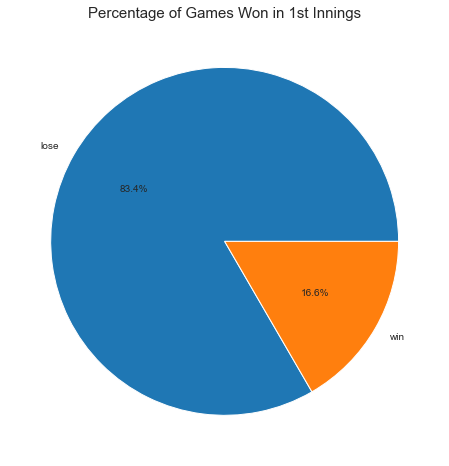

In [247]:
plt.figure(figsize=(16,8))
plt.pie(first_inning_score_pct['win_percentage'], labels=first_inning_score_pct['1st_inning_game_status'],
        autopct='%1.1f%%')
plt.title("Percentage of Games Won in 1st Innings", fontsize=15)
plt.show()

* we can conclude that about 16.6% of the games won in the first inninhs according to the set status bar of 190

#### 4. How many 6s were hit in each season, in total?

In [250]:
sixes = ipl[ipl['runs_batter'] == 6]
sixes_ps = sixes.groupby('season')['runs_batter'].value_counts().reset_index(name='number of 6s')
print("Number of 6s in each season, in total")
sixes_ps

Number of 6s in each season, in total


season  runs_batter  number of 6s
0   2007/08            6           623
1      2009            6           508
2   2009/10            6           587
3      2011            6           639
4      2012            6           733
5      2013            6           681
6      2014            6           715
7      2015            6           692
8      2016            6           639
9      2017            6           706
10     2018            6           872
11     2019            6           786
12  2020/21            6           736
13     2021            6           687
14     2022            6          1062

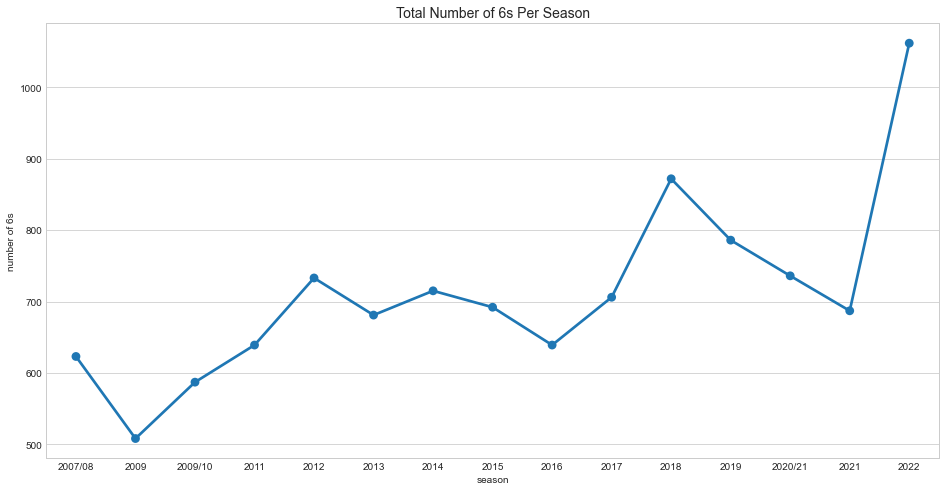

In [251]:
plt.figure(figsize=(16,8))
sns.pointplot(x="season", y="number of 6s", data=sixes_ps)
plt.title("Total Number of 6s Per Season", fontsize=14)
plt.show()

* highest totals of 6s hit in 2022  season was  1062

In [255]:
sixes_ps['number of 6s'].sum()

10666

#### 5. How many 6s were hit on average per game for each season? Are there more 6s being hit in the later seasons? 

In [256]:
sixes_avg = \
sixes.groupby(['match_id','season'])['runs_batter'].value_counts().reset_index(name='number_of_6s_game')
sixes_avg

match_id   season  runs_batter  number_of_6s_game
0      335982  2007/08            6                 17
1      335983  2007/08            6                 25
2      335984  2007/08            6                  4
3      335985  2007/08            6                 11
4      335986  2007/08            6                 10
..        ...      ...          ...                ...
945   1304116     2022            6                 15
946   1312197     2022            6                 13
947   1312198     2022            6                 23
948   1312199     2022            6                 17
949   1312200     2022            6                  8

[950 rows x 4 columns]

In [258]:
sixes_avg_stats = sixes_avg.groupby(['season'])['number_of_6s_game'].mean().reset_index(name='Avg_number_of_6s')
print("Average Number of 6s Per Game for Each Season")
six_stats = pd.merge(sixes_ps,sixes_avg_stats)
six_stats['number_of_matches_w/6s'] = round(six_stats['number of 6s']/six_stats['Avg_number_of_6s'],0)
six_stats

Average Number of 6s Per Game for Each Season


season  runs_batter  number of 6s  Avg_number_of_6s  \
0   2007/08            6           623         10.741379   
1      2009            6           508          8.912281   
2   2009/10            6           587          9.783333   
3      2011            6           639          8.753425   
4      2012            6           733          9.905405   
5      2013            6           681          8.960526   
6      2014            6           715         11.916667   
7      2015            6           692         11.728814   
8      2016            6           639         10.650000   
9      2017            6           706         11.966102   
10     2018            6           872         14.533333   
11     2019            6           786         13.100000   
12  2020/21            6           736         12.266667   
13     2021            6           687         11.450000   
14     2022            6          1062         14.351351   

    number_of_matches_w/6s  
0                     58.0  
1                     57.0  
2                     60.0  
3                     73.0  
4                     74.0  
5                     76.0  
6                     60.0  
7                     59.0  
8                     60.0  
9                     59.0  
10                    60.0  
11                    60.0  
12                    60.0  
13                    60.0  
14                    74.0

#### check for more 6s hit in the later seasons

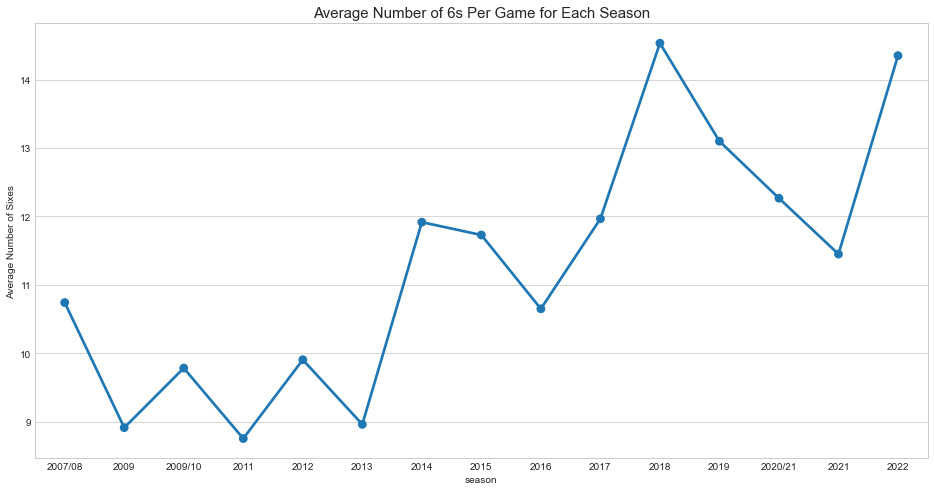

In [259]:
plt.figure(figsize=(16,8))
sns.pointplot(x="season", y="Avg_number_of_6s", data=sixes_avg_stats)
plt.ylabel("Average Number of Sixes")
plt.title("Average Number of 6s Per Game for Each Season", fontsize=15)
plt.show()

* given the above plot, the answer is  **yes**

#### 6. Look at the average number of 6s per game at each venue. Are there specific venues that see more 6s being hit on average? Give some plausible explanations.

In [260]:
sixes_pg_pv_avg = \
sixes.groupby(['match_id','venue'])['runs_batter'].value_counts().reset_index(name='number_of_6s_pg_pv')
# Average Number of Sixes per game per venue
sixes_avg_venue = sixes_pg_pv_avg.groupby(['venue'])['number_of_6s_pg_pv'].mean().reset_index(name='Avg_number_of_6s')
sixes_avg_venue = sixes_avg_venue.sort_values('Avg_number_of_6s', ascending=False)
print("Average Number of 6s Per Game at each Venue")
sixes_avg_venue

Average Number of 6s Per Game at each Venue


venue  Avg_number_of_6s
12                              Eden Gardens, Kolkata         18.000000
16                             Holkar Cricket Stadium         17.222222
20                              M.Chinnaswamy Stadium         17.066667
1                         Arun Jaitley Stadium, Delhi         17.000000
25      Maharashtra Cricket Association Stadium, Pune         15.384615
47                           Wankhede Stadium, Mumbai         14.290323
8                  Dr DY Patil Sports Academy, Mumbai         14.250000
0                                Arun Jaitley Stadium         14.142857
40                            Sharjah Cricket Stadium         14.071429
4                           Brabourne Stadium, Mumbai         13.411765
19                              M Chinnaswamy Stadium         13.246154
31       Punjab Cricket Association IS Bindra Stadium         13.200000
26                   Narendra Modi Stadium, Ahmedabad         12.857143
46                                   Wankhede Stadium         12.328767
15       Himachal Pradesh Cricket Association Stadium         12.000000
24            Maharashtra Cricket Association Stadium         12.000000
9   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         11.846154
21                             MA Chidambaram Stadium         11.333333
6                               De Beers Diamond Oval         11.333333
34                 Rajiv Gandhi International Stadium         11.200000
11                                       Eden Gardens         11.181818
17                 JSCA International Stadium Complex         10.857143
36                       Sardar Patel Stadium, Motera         10.833333
10                Dubai International Cricket Stadium         10.760870
13                                   Feroz Shah Kotla         10.600000
22                    MA Chidambaram Stadium, Chepauk         10.562500
3                                   Brabourne Stadium         10.500000
37             Saurashtra Cricket Association Stadium         10.400000
7                          Dr DY Patil Sports Academy         10.176471
23           MA Chidambaram Stadium, Chepauk, Chennai         10.100000
35          Rajiv Gandhi International Stadium, Uppal         10.040816
44                                    SuperSport Park         10.000000
2                                    Barabati Stadium          9.714286
48                   Zayed Cricket Stadium, Abu Dhabi          9.125000
5                                        Buffalo Park          9.000000
14                                         Green Park          9.000000
29                                           Newlands          9.000000
42                                   St George's Park          8.857143
41                               Sheikh Zayed Stadium          8.793103
33         Punjab Cricket Association Stadium, Mohali          8.771429
45       Vidarbha Cricket Association Stadium, Jamtha          8.666667
18                                          Kingsmead          8.666667
43                         Subrata Roy Sahara Stadium          8.625000
28                              New Wanderers Stadium          8.000000
32  Punjab Cricket Association IS Bindra Stadium, ...          7.909091
27                                      Nehru Stadium          7.800000
38                             Sawai Mansingh Stadium          7.723404
39   Shaheed Veer Narayan Singh International Stadium          7.333333
30                                    OUTsurance Oval          4.000000

#### Plausible explainations as to why
* conditions in variet of cities, we can infer to weather, altitude contributing to ball bounces, air resistances etc..
* venues, where its raining, weather conditions affect the match for bowlers and batters

### 3.8. Batting

#### 1.  For each player, calculate the following for each match where they batted (ie, aggregate over the match level):

* total number of runs in each game
* total number of sixes and 4s in each game
* total number of deliveries faced

##### Total number of runs in each game

In [262]:
total_game_runs = \
ipl.groupby(['match_id','season','striker'])['runs_batter'].sum().reset_index(name="totalgame_run")
total_game_runs

match_id   season       striker  totalgame_run
0        335982  2007/08     AA Noffke              9
1        335982  2007/08       B Akhil              0
2        335982  2007/08   BB McCullum            158
3        335982  2007/08      CL White              6
4        335982  2007/08     DJ Hussey             12
...         ...      ...           ...            ...
14224   1312200     2022     SV Samson             14
14225   1312200     2022  Shubman Gill             45
14226   1312200     2022      TA Boult             11
14227   1312200     2022       WP Saha              5
14228   1312200     2022   YBK Jaiswal             22

[14229 rows x 4 columns]

##### Total number of sixes and fours in each game

In [263]:
total_game_4s = \
ipl.groupby(['match_id','season',
                'striker'])['runs_batter'].agg(lambda x: (x==4).sum()).reset_index(name="total_number_of_4s")

total_game_6s = \
ipl.groupby(['match_id','season',
                'striker'])['runs_batter'].agg(lambda x: (x==6).sum()).reset_index(name="total_number_of_6s")

total_game_6s_and_4s = pd.merge(total_game_4s,total_game_6s)
total_game_6s_and_4s['total_game_6s_and_4s'] = \
total_game_6s_and_4s['total_number_of_4s'] + total_game_6s_and_4s['total_number_of_6s']
total_game_6s_and_4s

match_id   season       striker  total_number_of_4s  \
0        335982  2007/08     AA Noffke                   1   
1        335982  2007/08       B Akhil                   0   
2        335982  2007/08   BB McCullum                  10   
3        335982  2007/08      CL White                   0   
4        335982  2007/08     DJ Hussey                   1   
...         ...      ...           ...                 ...   
14224   1312200     2022     SV Samson                   2   
14225   1312200     2022  Shubman Gill                   3   
14226   1312200     2022      TA Boult                   0   
14227   1312200     2022       WP Saha                   1   
14228   1312200     2022   YBK Jaiswal                   1   

       total_number_of_6s  total_game_6s_and_4s  
0                       0                     1  
1                       0                     0  
2                      13                    23  
3                       0                     0  
4                       0                     1  
...                   ...                   ...  
14224                   0                     2  
14225                   1                     4  
14226                   1                     1  
14227                   0                     1  
14228                   2                     3  

[14229 rows x 6 columns]

##### Total number of deliveries faced

In [265]:
total_game_deliveries = \
ipl.groupby(['match_id','season','striker'])['runs_batter'].count().reset_index(name='total_deliveries_faced')
total_game_deliveries

match_id   season       striker  total_deliveries_faced
0        335982  2007/08     AA Noffke                      12
1        335982  2007/08       B Akhil                       2
2        335982  2007/08   BB McCullum                      77
3        335982  2007/08      CL White                      10
4        335982  2007/08     DJ Hussey                      12
...         ...      ...           ...                     ...
14224   1312200     2022     SV Samson                      11
14225   1312200     2022  Shubman Gill                      43
14226   1312200     2022      TA Boult                       7
14227   1312200     2022       WP Saha                       7
14228   1312200     2022   YBK Jaiswal                      16

[14229 rows x 4 columns]

In [267]:
batsman = pd.merge(total_game_runs,total_game_6s_and_4s)
batsman.head()

match_id   season      striker  totalgame_run  total_number_of_4s  \
0    335982  2007/08    AA Noffke              9                   1   
1    335982  2007/08      B Akhil              0                   0   
2    335982  2007/08  BB McCullum            158                  10   
3    335982  2007/08     CL White              6                   0   
4    335982  2007/08    DJ Hussey             12                   1   

   total_number_of_6s  total_game_6s_and_4s  
0                   0                     1  
1                   0                     0  
2                  13                    23  
3                   0                     0  
4                   0                     1

In [268]:
batsman = pd.merge(batsman, total_game_deliveries)
batsman

match_id   season       striker  totalgame_run  total_number_of_4s  \
0        335982  2007/08     AA Noffke              9                   1   
1        335982  2007/08       B Akhil              0                   0   
2        335982  2007/08   BB McCullum            158                  10   
3        335982  2007/08      CL White              6                   0   
4        335982  2007/08     DJ Hussey             12                   1   
...         ...      ...           ...            ...                 ...   
14224   1312200     2022     SV Samson             14                   2   
14225   1312200     2022  Shubman Gill             45                   3   
14226   1312200     2022      TA Boult             11                   0   
14227   1312200     2022       WP Saha              5                   1   
14228   1312200     2022   YBK Jaiswal             22                   1   

       total_number_of_6s  total_game_6s_and_4s  total_deliveries_faced  
0                       0                     1                      12  
1                       0                     0                       2  
2                      13                    23                      77  
3                       0                     0                      10  
4                       0                     1                      12  
...                   ...                   ...                     ...  
14224                   0                     2                      11  
14225                   1                     4                      43  
14226                   1                     1                       7  
14227                   0                     1                       7  
14228                   2                     3                      16  

[14229 rows x 8 columns]

#### 2. From this, create another dataset which contains the following for each player (ie aggregate over all matches):
* total runs
* total deliveries faced
* total number of 4s and 6s
* total number of times dismissed
* strike rate
* average

##### total number of dismissed

In [270]:
total_number_dismissed = \
ipl.groupby(['match_id','season','striker'])['player_dismissed'].count().reset_index(name='player_dismissed')
total_number_dismissed

match_id   season       striker  player_dismissed
0        335982  2007/08     AA Noffke                 1
1        335982  2007/08       B Akhil                 1
2        335982  2007/08   BB McCullum                 0
3        335982  2007/08      CL White                 1
4        335982  2007/08     DJ Hussey                 1
...         ...      ...           ...               ...
14224   1312200     2022     SV Samson                 1
14225   1312200     2022  Shubman Gill                 0
14226   1312200     2022      TA Boult                 1
14227   1312200     2022       WP Saha                 1
14228   1312200     2022   YBK Jaiswal                 1

[14229 rows x 4 columns]

#### formula for the product of the strike rate for the batter

* To calculate batting strike rate in cricket: Divide the number of runs scored by balls faced by the batter. Multiply the resultant by 100 .
* reference [click here](https://www.google.com/search?q=strike+rate+formula&rlz=1C1CHBF_enZA1011ZA1011&oq=strike+rate+for&aqs=chrome.1.69i57j0i512l6j0i22i30l3.7833j0j7&sourceid=chrome&ie=UTF-8)
* in this case:


 **strike rate = (batsman['total_game_run']/batsman['total_deliveries_faced'])*100**

In [277]:
batsman['strike_rate'] = round((batsman['totalgame_run']/batsman['total_deliveries_faced'])* 100 , 2)
batsman

match_id   season       striker  totalgame_run  total_number_of_4s  \
0        335982  2007/08     AA Noffke              9                   1   
1        335982  2007/08       B Akhil              0                   0   
2        335982  2007/08   BB McCullum            158                  10   
3        335982  2007/08      CL White              6                   0   
4        335982  2007/08     DJ Hussey             12                   1   
...         ...      ...           ...            ...                 ...   
14224   1312200     2022     SV Samson             14                   2   
14225   1312200     2022  Shubman Gill             45                   3   
14226   1312200     2022      TA Boult             11                   0   
14227   1312200     2022       WP Saha              5                   1   
14228   1312200     2022   YBK Jaiswal             22                   1   

       total_number_of_6s  total_game_6s_and_4s  total_deliveries_faced  \
0                       0                     1                      12   
1                       0                     0                       2   
2                      13                    23                      77   
3                       0                     0                      10   
4                       0                     1                      12   
...                   ...                   ...                     ...   
14224                   0                     2                      11   
14225                   1                     4                      43   
14226                   1                     1                       7   
14227                   0                     1                       7   
14228                   2                     3                      16   

       strike_rate  player_dismissed  batting_avg  
0            75.00                 1          9.0  
1             0.00                 1          0.0  
2           205.19                 0          inf  
3            60.00                 1          6.0  
4           100.00                 1         12.0  
...            ...               ...          ...  
14224       127.27                 1         14.0  
14225       104.65                 0          inf  
14226       157.14                 1         11.0  
14227        71.43                 1          5.0  
14228       137.50                 1         22.0  

[14229 rows x 11 columns]

In [275]:
batsman = pd.merge(batsman,total_number_dismissed)

#### Average

* formula


batsman['average'] = batsman['totalgame_run']/batsman['player_dismissed']

In [278]:
batsman['batting_avg'] = round(batsman['totalgame_run']/batsman['player_dismissed'], 2)
batsman

match_id   season       striker  totalgame_run  total_number_of_4s  \
0        335982  2007/08     AA Noffke              9                   1   
1        335982  2007/08       B Akhil              0                   0   
2        335982  2007/08   BB McCullum            158                  10   
3        335982  2007/08      CL White              6                   0   
4        335982  2007/08     DJ Hussey             12                   1   
...         ...      ...           ...            ...                 ...   
14224   1312200     2022     SV Samson             14                   2   
14225   1312200     2022  Shubman Gill             45                   3   
14226   1312200     2022      TA Boult             11                   0   
14227   1312200     2022       WP Saha              5                   1   
14228   1312200     2022   YBK Jaiswal             22                   1   

       total_number_of_6s  total_game_6s_and_4s  total_deliveries_faced  \
0                       0                     1                      12   
1                       0                     0                       2   
2                      13                    23                      77   
3                       0                     0                      10   
4                       0                     1                      12   
...                   ...                   ...                     ...   
14224                   0                     2                      11   
14225                   1                     4                      43   
14226                   1                     1                       7   
14227                   0                     1                       7   
14228                   2                     3                      16   

       strike_rate  player_dismissed  batting_avg  
0            75.00                 1          9.0  
1             0.00                 1          0.0  
2           205.19                 0          inf  
3            60.00                 1          6.0  
4           100.00                 1         12.0  
...            ...               ...          ...  
14224       127.27                 1         14.0  
14225       104.65                 0          inf  
14226       157.14                 1         11.0  
14227        71.43                 1          5.0  
14228       137.50                 1         22.0  

[14229 rows x 11 columns]

#### 3. Compute the total number of runs for all players over all time. Take the top 5 and show a bar plot with their names on the x-axis and the total runs on the y-axis. 

In [280]:
top5_batsman_runs = \
batsman_df.groupby(['striker'])['totalgame_run'].sum().reset_index(name='total_game_run_ps').nlargest(5,
                                                                                                      'total_game_run_ps')
top5_batsman_runs

striker  total_game_run_ps
569    V Kohli               6634
462   S Dhawan               6244
130  DA Warner               5883
430  RG Sharma               5881
493   SK Raina               5536

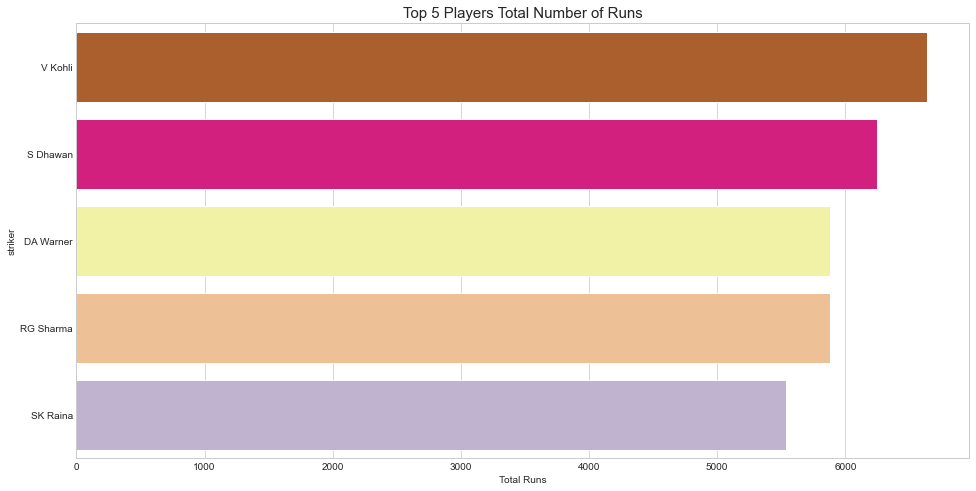

In [283]:
plt.figure(figsize=(16,8))
sns.barplot(data=top5_batsman_runs, y = 'striker', x = 'total_game_run_ps', orient='h', palette='Accent_r')
plt.xlabel("Total Runs")
plt.title("Top 5 Players Total Number of Runs",fontsize=15)
plt.xticks(rotation=0);
plt.show()

#### 4. For the top run-scorer, plot all of their individual scores over time - have they improved, remained steady, or deteriorated?

In [284]:
top5_batsman = top5_batsman_runs['striker'].values
top5_batsman

array(['V Kohli', 'S Dhawan', 'DA Warner', 'RG Sharma', 'SK Raina'],
      dtype=object)

In [285]:
top5_batsman_ot = batsman_df.loc[batsman_df['striker'].isin(top5_batsman)]

In [287]:
top5_batsman_ot = \
top5_batsman_ot.groupby(['season', 'striker'])['totalgame_run'].sum().reset_index(name='totalgame_run')

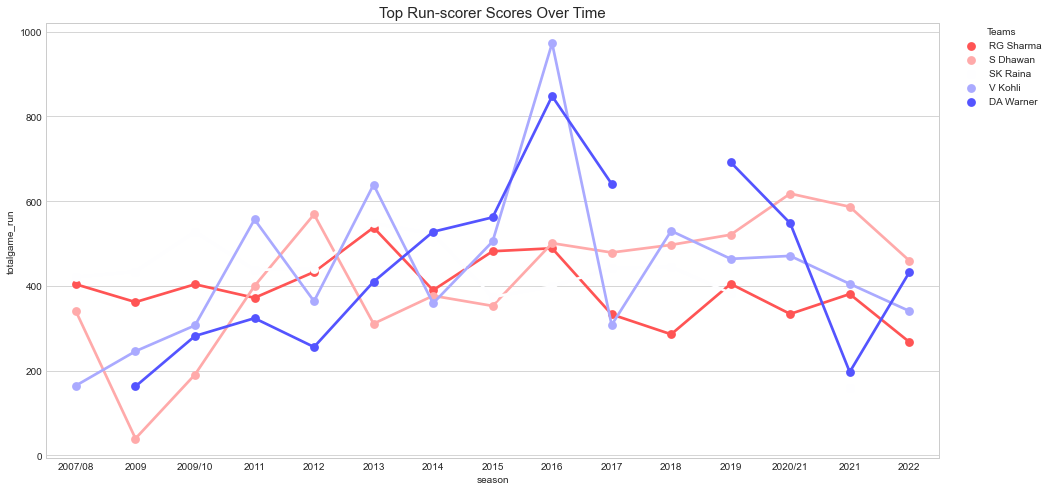

In [289]:
plt.figure(figsize=(16,8))
sns.pointplot(x="season", y="totalgame_run", hue='striker', data=top5_batsman_ot, palette='bwr_r')
plt.title("Top Run-scorer Scores Over Time", fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Teams')
plt.show()

* run score overtime, is unsteady for other plays
* but there are improvements and deterioted

##### Individual scores

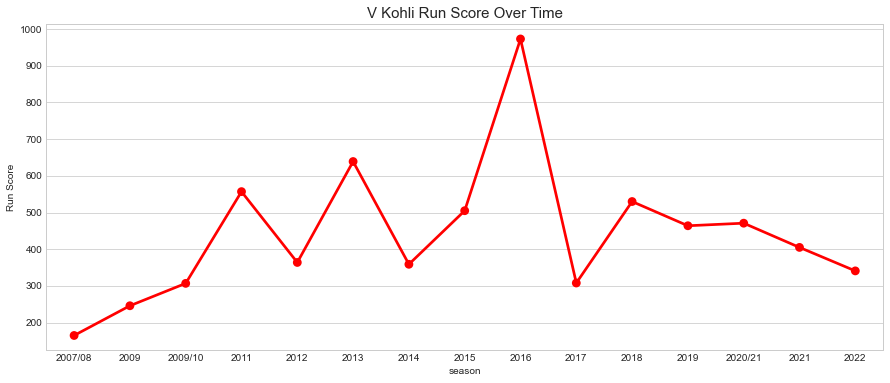

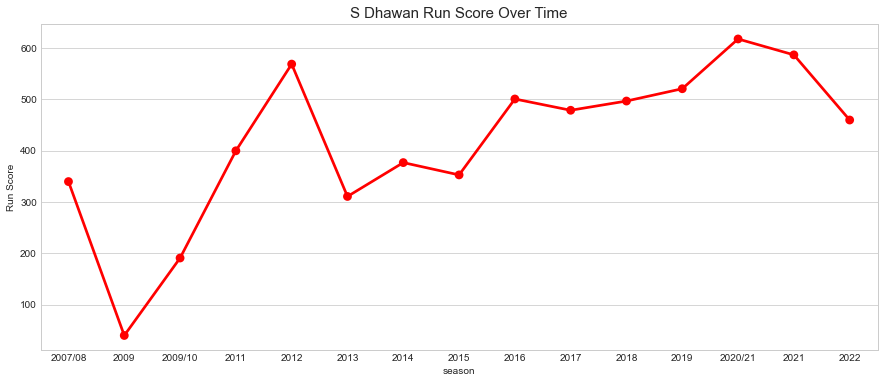

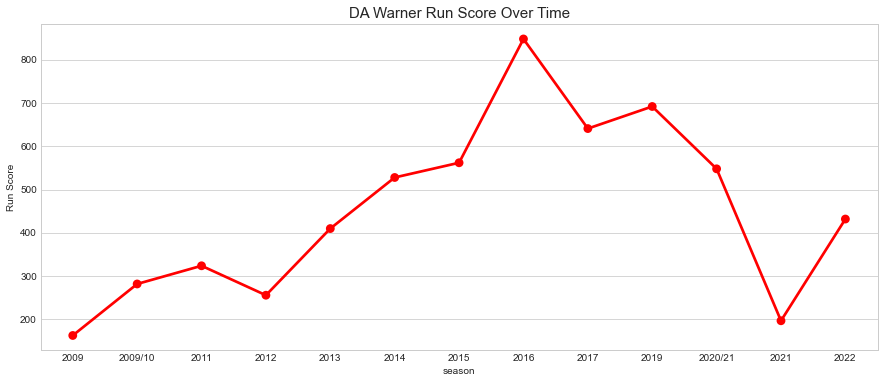

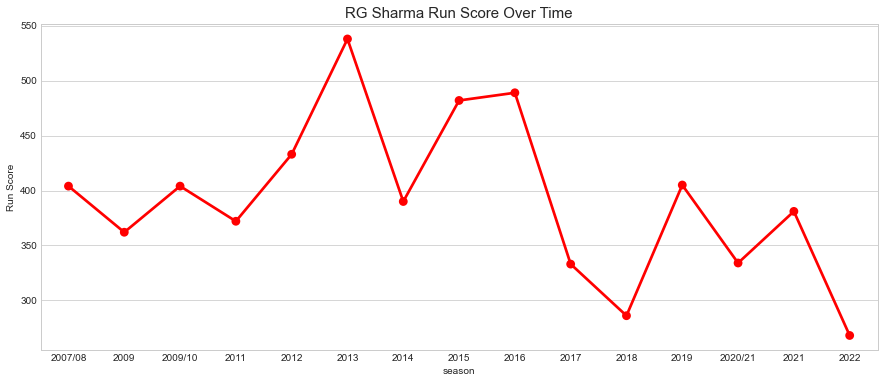

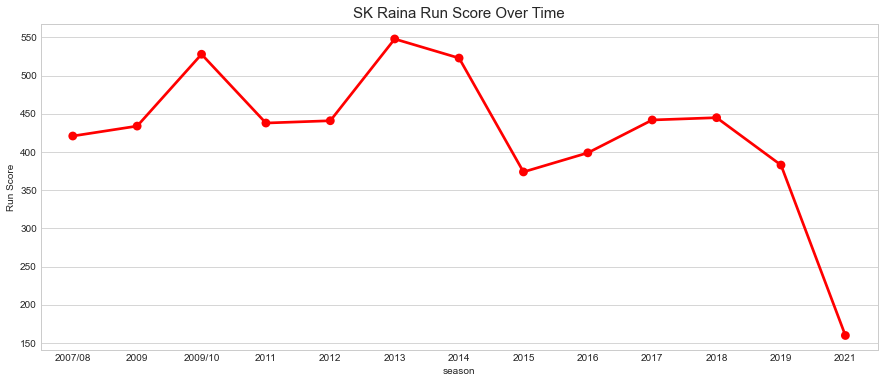

In [292]:
for player in top5_batsman:
    plt.figure(figsize=(15,6))
    sns.pointplot(data = top5_batsman_ot[top5_batsman_ot['striker']== player], 
             y = 'totalgame_run', x = 'season', color='red');
    plt.title(player + " Run Score Over Time", fontsize=15)
    plt.ylabel("Run Score")

* V Kohle runs score is steady
* Dhawan S, run score improves overtime
* RG Sharma and SK Raina is deterioting


#### 5. Plot the distribution of all averages for all batsmen. What percentage of batsman score an average of 30 or above, given a minimum of 500 runs?

In [295]:
batsman_avg_run = batsman.groupby('striker')['totalgame_run'].mean().reset_index(name='avg_runs')

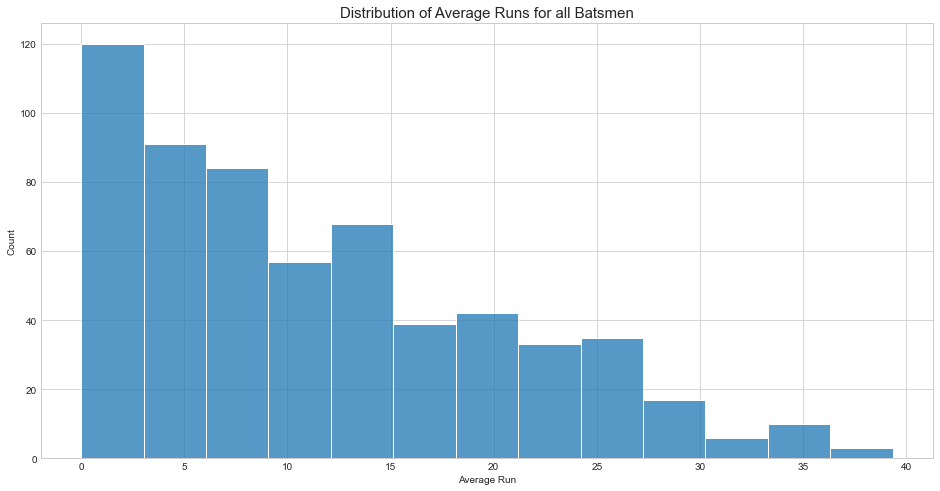

In [296]:
plt.figure(figsize=(16,8))
sns.histplot(batsman_avg_run['avg_runs'], kde=False)
plt.title("Distribution of Average Runs for all Batsmen", fontsize=15)
plt.xlabel("Average Run")
plt.show()

In [297]:
batsman_total_run = batsman_df.groupby('striker')['totalgame_run'].sum().reset_index(name='total_runs')
batsman_run_stat = pd.merge(batsman_total_run, batsman_avg_run)

In [298]:
batsman_run_stat = batsman_run_stat[(batsman_run_stat['total_runs'] >= 500) & (batsman_run_stat['avg_runs'] >= 30)]
batsman_run_stat

striker  total_runs   avg_runs
27   AB de Villiers        5181  30.476471
106         CA Lynn        1329  31.642857
108        CH Gayle        4997  35.439716
130       DA Warner        5883  36.314815
169    F du Plessis        3403  31.220183
192         HM Amla         577  36.062500
219      JC Buttler        2832  34.962963
232     JM Bairstow        1291  33.102564
263        KL Rahul        3895  39.343434
288     LMP Simmons        1079  37.206897
319      MEK Hussey        1977  34.086207
330       ML Hayden        1107  34.593750
404       Q de Kock        2767  30.076087
426      RD Gaikwad        1207  33.527778
462        S Dhawan        6244  30.458537
490        SE Marsh        2489  36.072464
569         V Kohli        6634  30.855814

In [301]:
percent_batsman_runs = round(len(batsman_run_stat)/len(batsman_total_run) * 100,2)
print(str(percent_batsman_runs)+"%","of the of batsman score an average of 30 or above, given a minimum of 500 runs")

2.81% of the of batsman score an average of 30 or above, given a minimum of 500 runs


#### 6. Which players have hit the most sixes? How does this compare against the list of players that have the highest average number of sixes per game.

In [302]:
top10_6s_players = \
batsman.groupby(['striker'])['total_number_of_6s'].sum().reset_index(name='total_number_of_6s').nlargest(10,
                                                                                                      'total_number_of_6s')
top10_6s_players

striker  total_number_of_6s
108        CH Gayle                 359
27   AB de Villiers                 253
430       RG Sharma                 241
339        MS Dhoni                 229
251      KA Pollard                 224
569         V Kohli                 219
130       DA Warner                 216
493        SK Raina                 204
511       SR Watson                 190
452      RV Uthappa                 182

In [303]:
sixes_pg_pp_avg = \
batsman_df.groupby(['striker'])['total_number_of_6s'].mean().reset_index(name='avg_number_of_6s')
sixes_pg_pp_avg.nlargest(10,'avg_number_of_6s')

striker  avg_number_of_6s
108        CH Gayle          2.546099
36       AD Russell          2.160494
436      RM Patidar          1.909091
388  PD Collingwood          1.857143
413        R Powell          1.833333
551        TH David          1.777778
292  LS Livingstone          1.739130
152       DP Conway          1.714286
219      JC Buttler          1.666667
418      R Shepherd          1.666667

* Only GH Gayle shows some consistency
*as for other playes do not have highest avgs

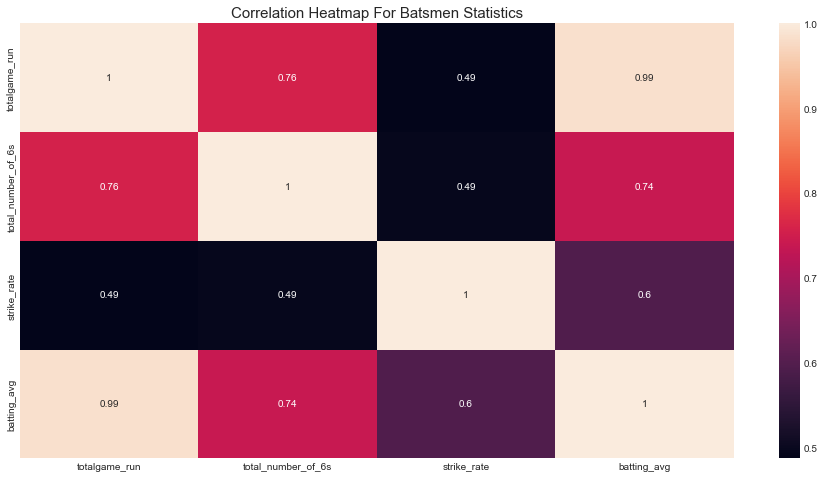

In [306]:
plt.figure(figsize=(16,8))
batsman_corr_matrix = batsman[['totalgame_run', 'total_number_of_6s', 'strike_rate', 'batting_avg']].corr()
sns.heatmap(batsman_corr_matrix, annot=True)
plt.title("Correlation Heatmap For Batsmen Statistics", fontsize=15)
plt.show()

* we have postive correlation between runs scored and batting average
* strike is higly correlated to batting avg
* total numbers of sixes higly correlated to scored runs and batting avg

### 3.9 Bowlers

#### 1.  For each player, calculate the following for each match where they bowled (ie, aggregate over the match level):
* total number of wickets in the game
* total number of deliveries bowled
* total number of runs scored off their bowling

In [322]:
bowler = ipl.copy()
bowler = bowler[bowler['how_out'].notnull()]

In [323]:
bowler['how_out'].unique()

array(['bowled', 'lbw', 'stumped', 'caught', 'run out',
       'caught and bowled', 'retired hurt', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [324]:
dismissal_wicket = ['bowled', 'lbw', 'stumped', 'caught', 'caught and bowled', 'hit wicket']
bowler = bowler.loc[bowler['how_out'].isin(dismissal_wicket)]

In [325]:
bowler['how_out'].unique()

array(['bowled', 'lbw', 'stumped', 'caught', 'caught and bowled',
       'hit wicket'], dtype=object)

#### total number of wickets in the game

In [326]:
total_game_wickets = \
bowler.groupby(['bowler'])['how_out'].count().reset_index(name="total_wickets")

In [327]:
total_game_wickets

bowler  total_wickets
0    A Ashish Reddy             18
1          A Badoni              2
2        A Chandila             11
3       A Choudhary              5
4        A Flintoff              2
..              ...            ...
399       YK Pathan             42
400       YS Chahal            166
401      Yash Dayal             11
402    Yuvraj Singh             36
403          Z Khan            102

[404 rows x 2 columns]

#### total numbers of deliveries bowled

In [329]:
total_bowl_delivers = \
bowler.groupby(['bowler'])['over'].sum().reset_index(name="total_deliveries_bowled")
total_bowl_delivers

bowler  total_deliveries_bowled
0    A Ashish Reddy                      266
1          A Badoni                       22
2        A Chandila                       26
3       A Choudhary                       25
4        A Flintoff                       25
..              ...                      ...
399       YK Pathan                      347
400       YS Chahal                     1803
401      Yash Dayal                       93
402    Yuvraj Singh                      419
403          Z Khan                      904

[404 rows x 2 columns]

#### total number of runs scored off their bowling

In [331]:
bowler = pd.merge(total_game_wickets,total_bowl_delivers)

In [335]:
total_runs_conceded = \
ipl.groupby(['bowler'])['runs_total'].sum().reset_index(name="total_runs_conceded")
total_runs_conceded

bowler  total_runs_conceded
0    A Ashish Reddy                  400
1          A Badoni                   12
2        A Chandila                  245
3       A Choudhary                  144
4       A Dananjaya                   47
..              ...                  ...
467       YK Pathan                 1443
468       YS Chahal                 3699
469      Yash Dayal                  296
470    Yuvraj Singh                 1091
471          Z Khan                 2860

[472 rows x 2 columns]

In [337]:
bowler = pd.merge(bowler,total_runs_conceded)
bowler

bowler  total_wickets  total_deliveries_bowled  \
0    A Ashish Reddy             18                      266   
1          A Badoni              2                       22   
2        A Chandila             11                       26   
3       A Choudhary              5                       25   
4        A Flintoff              2                       25   
..              ...            ...                      ...   
399       YK Pathan             42                      347   
400       YS Chahal            166                     1803   
401      Yash Dayal             11                       93   
402    Yuvraj Singh             36                      419   
403          Z Khan            102                      904   

     total_runs_conceded  
0                    400  
1                     12  
2                    245  
3                    144  
4                    106  
..                   ...  
399                 1443  
400                 3699  
401                  296  
402                 1091  
403                 2860  

[404 rows x 4 columns]

### 2. From this, create a dataset which contains the following for each player (ie aggregate over all matches):
* total wickets
* total deliveries bowled
* total runs scored off their bowling
* bowling economy rate
* bowling average


bowling economy rate formula
* the average number of runs conceded per over bowled.

        = For example, a bowler conceding 31 runs from 10.2 overs (i.e. 10 overs and 2 balls), has an economy rate of 31/10.33333 = 3.0 runs per over.
        
 [click here](https://www.google.com/search?q=bowling+economy+rate+formula&rlz=1C1CHBF_enZA1011ZA1011&ei=ebjFYuq2O8GBkwWEwYf4CQ&ved=0ahUKEwiq14zR1-T4AhXBwKQKHYTgAZ8Q4dUDCA4&uact=5&oq=bowling+economy+rate+formula&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BwgAELADEEM6BggAEB4QBzoICAAQHhAIEAc6CAgAEB4QBxAFOgcILhCxAxBDOgcIABCxAxBDOggIABCxAxCRAjoECAAQQzoFCAAQgAQ6BggAEB4QBUoECEEYAEoECEYYAFC4CFiQYmCDZ2gBcAF4AIAB4AKIAb80kgEGMi0xNy44mAEAoAEByAEKwAEB&sclient=gws-wiz)
   
   
   
   (sum up all runs scored off a bowler/divide this by the number of deliveries that the bowler delivered) * 6

In [340]:
bowler['economy_rate'] = (bowler['total_runs_conceded']/bowler['total_deliveries_bowled'])*6

#### bowling average

In [341]:
bowler['bowl_avg'] = (bowler['total_runs_conceded']/bowler['total_wickets'])

In [342]:
bowler

bowler  total_wickets  total_deliveries_bowled  \
0    A Ashish Reddy             18                      266   
1          A Badoni              2                       22   
2        A Chandila             11                       26   
3       A Choudhary              5                       25   
4        A Flintoff              2                       25   
..              ...            ...                      ...   
399       YK Pathan             42                      347   
400       YS Chahal            166                     1803   
401      Yash Dayal             11                       93   
402    Yuvraj Singh             36                      419   
403          Z Khan            102                      904   

     total_runs_conceded  economy_rate   bowl_avg  
0                    400      9.022556  22.222222  
1                     12      3.272727   6.000000  
2                    245     56.538462  22.272727  
3                    144     34.560000  28.800000  
4                    106     25.440000  53.000000  
..                   ...           ...        ...  
399                 1443     24.951009  34.357143  
400                 3699     12.309484  22.283133  
401                  296     19.096774  26.909091  
402                 1091     15.622912  30.305556  
403                 2860     18.982301  28.039216  

[404 rows x 6 columns]

### 3. Plot the distribution of wickets per player and then identify the top 5 bowlers with the most wickets

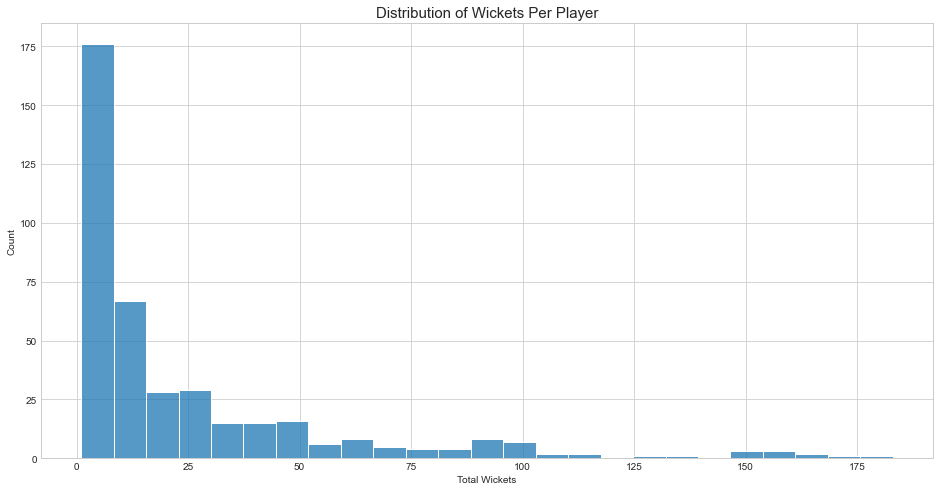

In [344]:
plt.figure(figsize=(16,8))
sns.histplot(bowler['total_wickets'], kde=False)
plt.title("Distribution of Wickets Per Player", fontsize=15)
plt.xlabel("Total Wickets")
plt.show()

In [346]:
top5_bowler_wicket = bowler.nlargest(5, 'total_wickets')
top5_bowler_wicket

bowler  total_wickets  total_deliveries_bowled  total_runs_conceded  \
92     DJ Bravo            183                     2632                 4436   
336  SL Malinga            170                     2214                 3486   
6      A Mishra            166                     1832                 4022   
400   YS Chahal            166                     1803                 3699   
267   PP Chawla            157                     1753                 4368   

     economy_rate   bowl_avg  
92      10.112462  24.240437  
336      9.447154  20.505882  
6       13.172489  24.228916  
400     12.309484  22.283133  
267     14.950371  27.821656

### 4. From all players that have bowled at least 20 overs (120 deliveries), identify the top 5 bowlers with the lowest economy rate from this selection.

In [349]:
high_no_delivery = bowler[bowler['total_deliveries_bowled'] >= 120]

In [350]:
# top 5 bowlers
high_no_delivery.nsmallest(5, 'economy_rate')

bowler  total_wickets  total_deliveries_bowled  \
363   Sohail Tanvir             22                      286   
14          A Zampa             21                      281   
379        Umar Gul             12                      141   
252        OC McCoy             11                      171   
0    A Ashish Reddy             18                      266   

     total_runs_conceded  economy_rate   bowl_avg  
363                  275      5.769231  12.500000  
14                   373      7.964413  17.761905  
379                  198      8.425532  16.500000  
252                  242      8.491228  22.000000  
0                    400      9.022556  22.222222

### 5. From all players that have bowled at least 20 overs (120 deliveries), identify the top 5 bowlers with the lowest average from this selection.

In [351]:
top5_bowler_avg = high_no_delivery.nsmallest(5, 'bowl_avg')
top5_bowler_avg

bowler  total_wickets  total_deliveries_bowled  \
363  Sohail Tanvir             22                      286   
240    Mohsin Khan             14                      120   
379       Umar Gul             12                      141   
14         A Zampa             21                      281   
80    CRD Fernando             17                      164   

     total_runs_conceded  economy_rate   bowl_avg  
363                  275      5.769231  12.500000  
240                  202     10.100000  14.428571  
379                  198      8.425532  16.500000  
14                   373      7.964413  17.761905  
80                   306     11.195122  18.000000

### 6.  Look at the correlations between wickets taken, bowling average, and economy rate. Are there any obvious correlations?

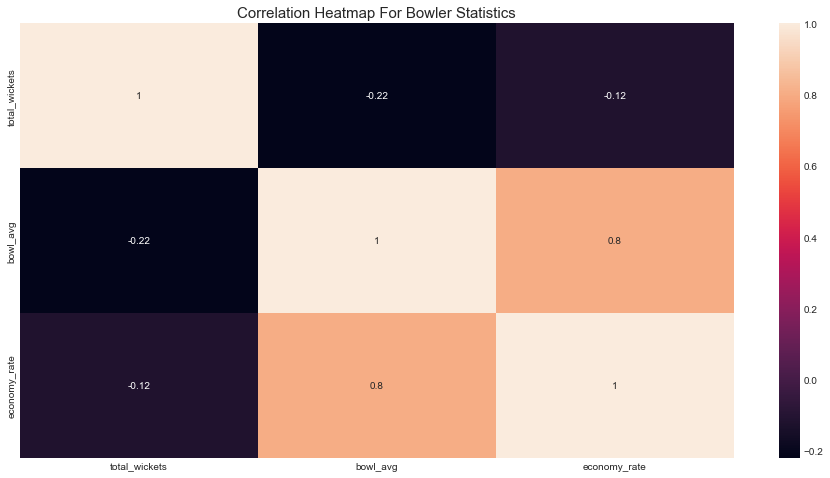

In [352]:
plt.figure(figsize=(16,8))
bowler_corr_matrix = high_no_delivery[['total_wickets', 'bowl_avg', 'economy_rate']].corr()
sns.heatmap(bowler_corr_matrix, annot=True)
plt.title("Correlation Heatmap For Bowler Statistics", fontsize=15)
plt.show()

* economy rate and bowlinh average are higly correlated

### 7. For the top bowler, identify if there are particular batsman that they dismiss more frequently than others.

In [355]:
top_bowler = top5_bowler_wicket['bowler'].values[0]
batsman_dismissed = ipl[ipl['bowler']==top_bowler]['player_dismissed']
batsman_dismissed = batsman_dismissed.value_counts().rename_axis('batsman').reset_index(name='number_of_dismissals')

In [357]:
print("Top 10 Batsman dismissed by:", top_bowler)
batsman_dismissed.nlargest(10,'number_of_dismissals')

Top 10 Batsman dismissed by: DJ Bravo


batsman  number_of_dismissals
0        RG Sharma                     5
1         SK Raina                     4
2       KD Karthik                     4
3         S Dhawan                     4
4  Harbhajan Singh                     4
5         AR Patel                     4
6         PA Patel                     3
7        SR Watson                     3
8        JH Kallis                     3
9        YK Pathan                     3

#### 8. Identify the amount of runs scored against this bowler by any batsman. Show the top 5 results.

In [358]:
top_bowler_df = ipl[ipl['bowler']==top_bowler]

In [359]:
top_bowler_df.groupby(['striker'])['runs_total'].sum().reset_index(name="total_runs_conceded")

striker  total_runs_conceded
0    A Ashish Reddy                   24
1          A Badoni                    6
2        A Flintoff                   14
3          A Kumble                    5
4          A Mishra                    9
..              ...                  ...
261       YK Pathan                   77
262       YS Chahal                    2
263   Yashpal Singh                    2
264    Yuvraj Singh                   22
265          Z Khan                    2

[266 rows x 2 columns]

### 9. Do a count of how frequently each player has received a player of the match award. Do these match what you would expect for the top 5 batsmen or bowlers? (Top 5 based on any of the metrics)

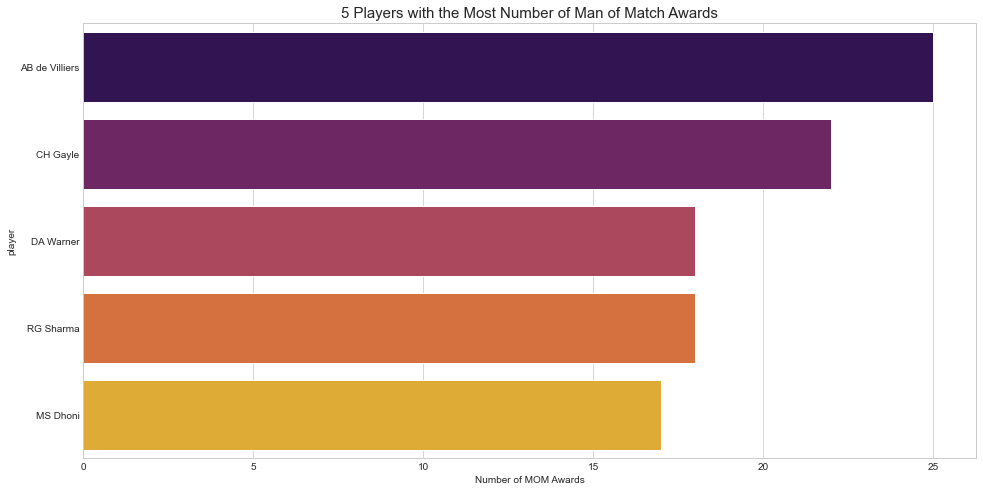

In [364]:
plt.figure(figsize=(16,8))
sns.barplot(data=top5_mom, y = 'player', x = 'mom_awards', orient='h', palette='inferno')
plt.xlabel("Number of MOM Awards")
plt.title("5 Players with the Most Number of Man of Match Awards",fontsize=15)
plt.xticks(rotation=0);
plt.show()

In [360]:
mom_award = match['mom'].value_counts().rename_axis('player').reset_index(name='mom_awards')
top5_mom = mom_award.nlargest(5,'mom_awards')
print("Top 5 Man of Match Awardees")
top5_mom

Top 5 Man of Match Awardees


player  mom_awards
0  AB de Villiers          25
1        CH Gayle          22
2       DA Warner          18
3       RG Sharma          18
4        MS Dhoni          17

#### Do these match what you would expect for the top 5 batsmen or bowlers?


**Yes, for most players that won man of the match**



### Other EDA ideas for this dataset

#### Number of matches played in each season

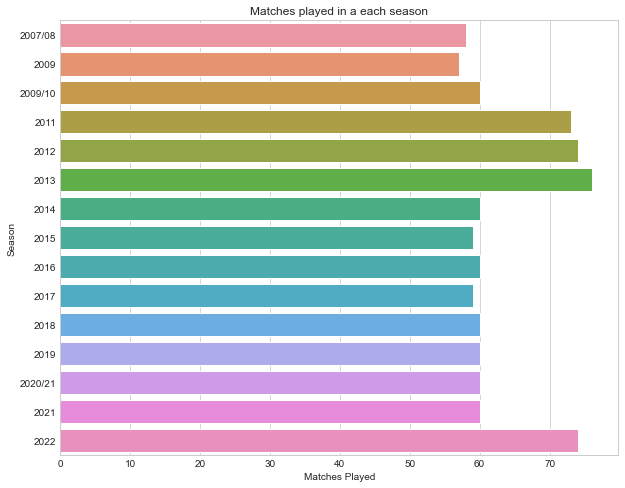

In [367]:
plt.figure(figsize=(10,8))
data = match.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.title('Matches played in a each season')
plt.ylabel('Season')
plt.show()

* from the plot above,  2022, is the season most matches played

#### Most IPL matches played in a venue

In [370]:
ipl.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                              

### How many matches were played each season?

In [379]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 225953
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          225954 non-null  int64         
 1   city              213557 non-null  object        
 2   match_date        225954 non-null  datetime64[ns]
 3   umpire1           225954 non-null  object        
 4   umpire2           225954 non-null  object        
 5   season            225954 non-null  object        
 6   team1             225954 non-null  object        
 7   team2             225954 non-null  object        
 8   toss_winner       225954 non-null  object        
 9   toss_decision     225954 non-null  object        
 10  venue             225954 non-null  object        
 11  winner            225954 non-null  object        
 12  mom               225582 non-null  object        
 13  inning1_bat       225954 non-null  object        
 14  inni

In [381]:
ipl['season'].value_counts()

2013       18177
2022       17912
2012       17767
2011       17013
2020/21    14559
2009/10    14498
2021       14425
2019       14312
2014       14300
2018       14286
2016       14096
2017       13862
2015       13652
2009       13606
2007/08    13489
Name: season, dtype: int64

In [383]:
match['season'].value_counts()

2013       76
2012       74
2022       74
2011       73
2021       60
2019       60
2016       60
2014       60
2020/21    60
2018       60
2009/10    60
2015       59
2017       59
2007/08    58
2009       57
Name: season, dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

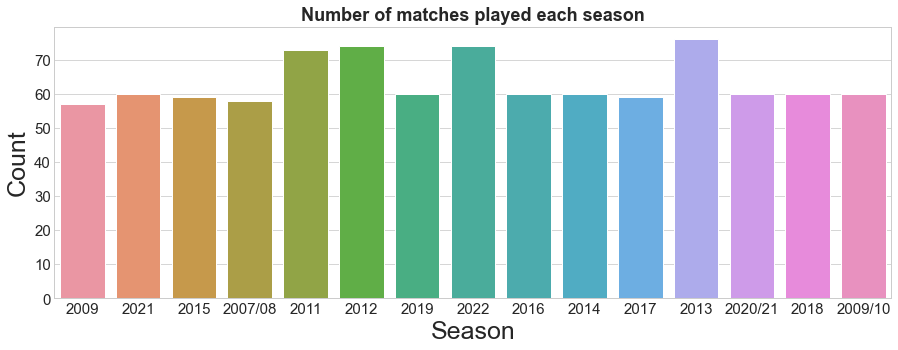

In [384]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = match)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

* 2011-2013, have more matches being played than other seasons

### How many teams played in each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

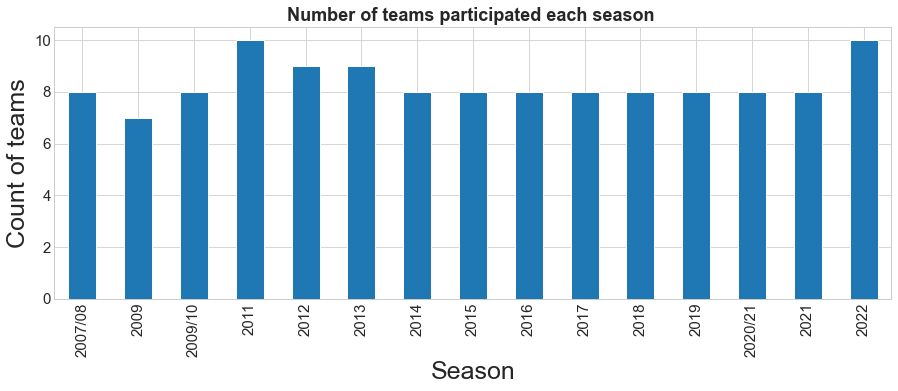

In [385]:
match.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### which team dominated ipl so far

In [386]:
#creating a dataframe with season and winner columns
winning_teams = match[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(0, 1, 'Delhi Capitals'),
  Text(0, 2, 'Royal Challengers Bangalore'),
  Text(0, 3, 'Mumbai Indians'),
  Text(0, 4, 'Punjab Kings'),
  Text(0, 5, 'Sunrisers Hyderabad'),
  Text(0, 6, 'Kolkata Knight Riders'),
  Text(0, 7, 'Gujarat Titans')])

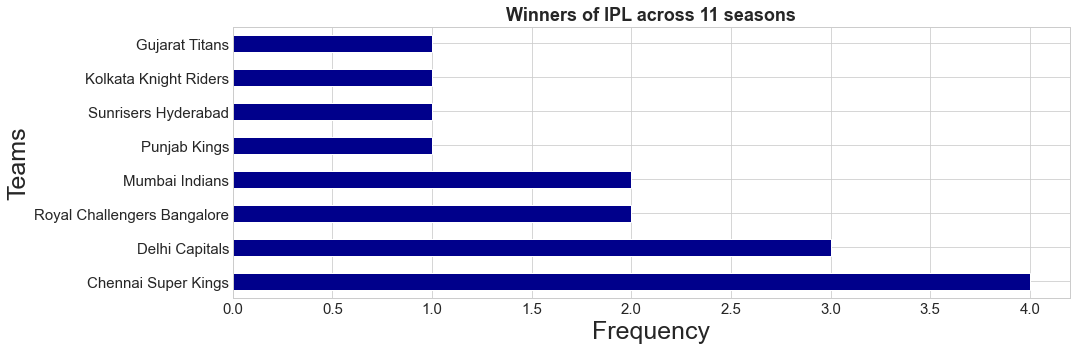

In [387]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Venue which has hosted most number of IPL matches?

In [388]:
match.venue.value_counts().sort_values(ascending = False)

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                              

### umpires who have appeared in most number of matches

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S Ravi'),
  Text(0, 1, 'AK Chaudhary'),
  Text(0, 2, 'HDPK Dharmasena'),
  Text(0, 3, 'C Shamshuddin'),
  Text(0, 4, 'Nitin Menon'),
  Text(0, 5, 'CB Gaffaney'),
  Text(0, 6, 'M Erasmus'),
  Text(0, 7, 'CK Nandan'),
  Text(0, 8, 'BNJ Oxenford'),
  Text(0, 9, 'KN Ananthapadmanabhan')])

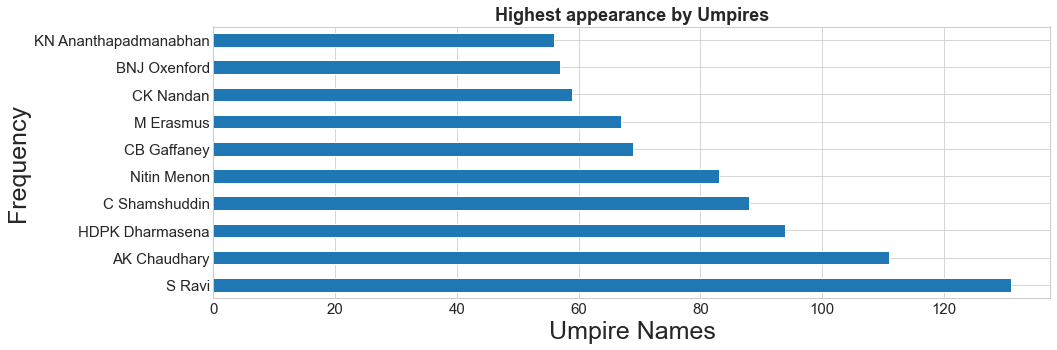

In [391]:
umpire_total = pd.concat([match.umpire1,match.umpire2], ignore_index=True)
umpire_total = pd.DataFrame(umpire_total, columns = ['umpire_name'])

umpire_total['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Highest appearance by Umpires",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Umpire Names", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)


* S.Ravi appeared in most IPL matches (more than 100 times)

### Is there a relationship between umpires and finals?

In [394]:
#umpires who stood most in finals
final_umpires = match[['season','winner','umpire1','umpire2']]
umpire1_dict = {}
for i in sorted(final_umpires.season.unique()):
    umpire1_dict[i] = final_umpires[final_umpires.season == i]['umpire1'].tail(1).values[0]

umpire2_dict = {}
for i in sorted(final_umpires.season.unique()):
    umpire2_dict[i] = final_umpires[final_umpires.season == i]['umpire2'].tail(1).values[0]
    
final_umpire_df1 = pd.DataFrame({'umpire1':umpire1_dict})
final_umpire_df2 = pd.DataFrame({'umpire1':umpire2_dict})

#concatinating both dfs
final_match_umpires = pd.concat([final_umpire_df1,final_umpire_df2], ignore_index=True)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

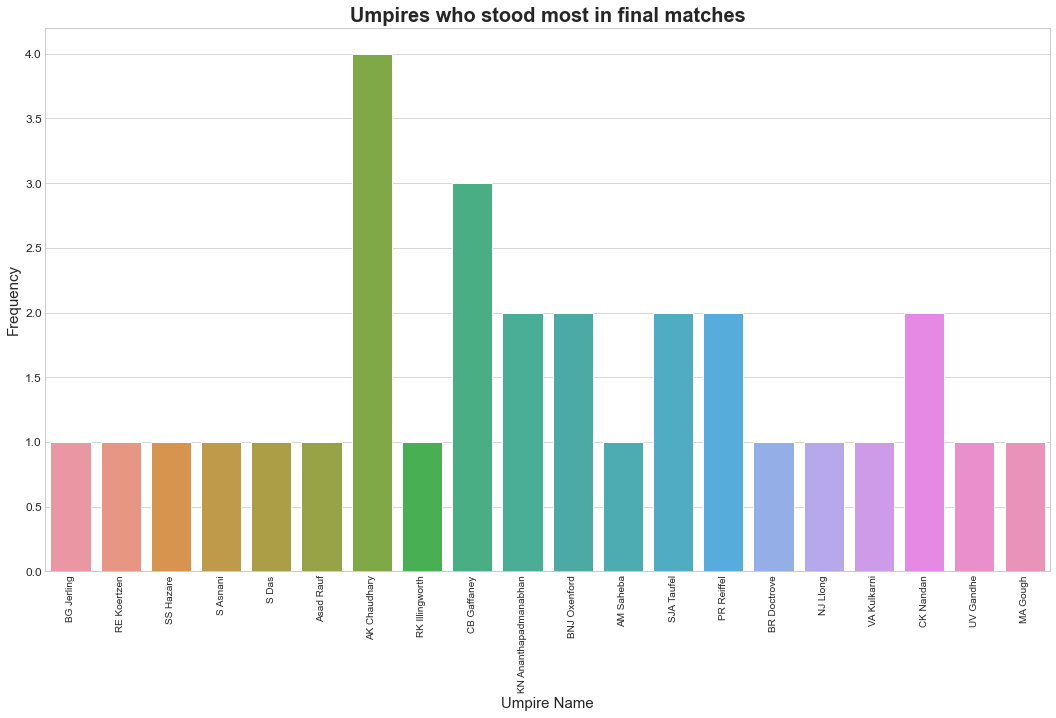

In [396]:
plt.figure(figsize = (18,10))
sns.countplot('umpire1', data = final_match_umpires)
plt.title("Umpires who stood most in final matches", fontsize = 20, fontweight = 'bold')
plt.xlabel("Umpire Name", size= 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(rotation = 'vertical')
plt.yticks(size = 12)

* AK Chaudhary  stood in 4 finals most by any umpire